In [15]:
import os
import numpy as np
import urllib.request
import tweepy as tw
import pandas as pd
from pandas import *
from sklearn.feature_extraction.text import CountVectorizer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt。
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk import bigrams
from nltk.corpus import stopwords
import re
import networkx as nx
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [16]:
consumer_key = 'DAgn9RUA95XG8JnF2ydmVfJTk'
consumer_secret = 'EnUToGTGDeqi9phcHRCMprKBheS0iQsYFzsKmratEzJNDX1ktq'
access_token = '3181144003-c0PSiV7uD717G0fNvPugiGBAYtICr5NNLKdk49Z'
access_token_secret = '0J63Vi6UNrI4wTBs1N1M5l5WUOEeZXfms8U3jwQEPkfQ5'


auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [17]:
tweets1 = open("/Users/yanghong/Documents/Class/socialMediaMining/tweetFinal.txt", "r")

In [18]:
tweets = tweets1.readlines()

In [19]:
all_tweets = [tweet for tweet in tweets]

In [20]:
all_tweets[0:10]

['When roddy rich said “gave her 10 bands just to blow at Sephora” I couldn’t relate. :(\n',
 '"Guys, there’s a Game of Thrones collection at Sephora https://t.co/0RNZHhCM6e"\n',
 'should i spend $175 on 13 products at sephora rn?\n',
 'just wanna take a day and shop in Sephora 😌\n',
 '@tartecosmetics @Sephora Love #tarte wanting to try all the cosmetics\n',
 'Sis @eLLaRie I need yo help. I need a good foundation that’s golden with yellow undertones usually I can color matc… https://t.co/j481FGNutF\n',
 'Gave her 10 racks just to blow in Sephora\n',
 'Made a too big Sephora VIB Sale order and thought it was going to credit but it went to debit instead and WHOO IF T… https://t.co/s1Jela8u9X\n',
 'oh hi\n',
 '\n']

In [21]:
import csv

In [24]:
# search_term = "sephora -filter:retweets"

# tweets = tw.Cursor(api.search,
#                    q=search_term,
#                    lang="en",
#                    since='2019-04-21',
#                    until = '2019-04-25').items(1000)

# all_tweets = [tweet.text for tweet in tweets]

#os.chdir("/Users/yanghong/Documents/Class/socialMediaMining/")

tweets1 = open("/Users/yanghong/Documents/Class/socialMediaMining/tweetFinal.txt", "r")

tweets = tweets1.readlines()
all_tweets = [tweet for tweet in tweets]
def process_data(all_tweets):
    def remove_url(txt):
        """Replace URLs found in a text string with nothing
        (i.e. it will remove the URL from the string).

        Parameters
        ----------
        txt : string
            A text string that you want to parse and remove urls.

        Returns
        -------
        The same txt string with url's removed.
        """

        return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())


    tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]

    # Create a sublist of lower case words for each tweet
    words_in_tweet = [tweet.lower().split() for tweet in tweets_no_urls]

    # Download stopwords
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))

    # Remove stop words from each tweet list of words
    tweets_nsw = [[word for word in tweet_words if not word in stop_words]
                  for tweet_words in words_in_tweet]

    # Remove collection words
    collection_words = ['sephora']

    tweets_nsw_nc = ["".join(w + " " for w in word if not w in collection_words)
                     for word in tweets_nsw]

    return tweets_nsw_nc
    
    #stemming
   
    ps = PorterStemmer() 
   
    sentence = tweets_nsw_nc
    words = word_tokenize(sentence) 
    for w in words: 
        print(w, " : ", ps.stem(w))
    return words
corpus = process_data(all_tweets)
print(corpus)
print(len(corpus))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yanghong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
#print(all_tweets)
vectorizer = CountVectorizer()
 
X = vectorizer.fit_transform(corpus) 
#print(X)
  
word = vectorizer.get_feature_names()  

#word2 = ['sephora', 'im', 'makeup', 'get', 'like', 'norvina1', 'sale', 'check', 'good', 'ive', 'beauty', 'new', 'go', 'please', 'need', '5', 'moschino', 'one', 'amp', 'items', 'got', 'jobs', 'share', 'poshmarkapp', 'love', 'dont', 'loving', 'poshmark', 'know', 'us', 'time', 'make', 'fashion', 'ulta', 'want', 'store', 'ultabeauty', 'vib', 'really', 'products', 'foundation', 'card', 'going', 'skin', 'sephoras', 'fentybeauty', 'work', 'today', 'dm', 'style', 'points', 'brand', 'gift', 'fbbindia', 'rouge', 'buy', 'cant', '2', 'thecrayoncase', 'see', 'yall', 'abhcosmetics', 'shades', 'try', 'shopmycloset', '2019', 'colorstv', 'send', 'email', 'always', 'went', 'use', 'think', 'order', 'would', 'look', 'shade', 'people', 'lol', 'girl', 'spring', 'black', '50', 'online', 'day', 'skincare', 'help', 'using', '1', '20', 'first', 'back', 'thank', 'something', 'product', 'never', 'win', 'right', 'best', 'free', 'available', 'address', 'well', 'thanks', 'kit', 'shop', 'face', '3', 'find', 'tried', 'could', 'samples', 'insider', 'things', 'recommendations', 'thats', 'miss', 'coming', 'artist', 'much', 'u', 'money', 'getting', 'excited', 'take', 'thing', 'someone', 'via', 'year', 'every', 'color', 'list', 'sorry', 'sun', 'also', 'ill', 'ready', 'oh', 'line', 'shopping', 'sample', 'give', 'cart', 'youre', 'registered', 'spent', 'full', 'stores', 'mac', 'yes', 'collection', 'even', 'feminamissindia', 'cosmetics', 'palette', '4', 'come', 'literally', 'wanna', 'shit', 'buying', 'brands', 'sephoraindia', 'east', 'everything', 'friday', 'macys', 'ever', 'case', 'anything', 'care', 'rihanna', 'better', 'safety', 'play', 'cashier', 'looks', 'big', 'idea', 'stealing', 'retailers', 'set', 'happy', 'may', 'xonecole', 'omg', 'finally', 'didnt', 'bought', 'giveaway', 'amazing', 'inside', 'mall', 'enter', 'femina', 'damn', 'jeremy', 'since', 'guys', 'hope', 'put', 'purchase', 'hello', 'bag', 'walk', 'support', 'hi', 'havent', 'let', 'jcpenney', 'made', 'account', 'wait', 'wuzzamsupa', 'done', 'looking', 'spend', 'say', 'scott', 'stole', 'nordstrom', 'favorites', 'great', 'manager', 'fenty', 'starts', 'x', 'last', 'stuff', 'used', 'socialbflymag', 'regalmovies', 'jambajuice', 'bnbuzz', 'aemtb', 'daveandbusters', 'underarmour', 'working', 'sure', 'india', 'missindiaeast2019', 'trying', 'target', 'event', 'home', 'way', '100', 'came', 'lip', 'birthday', 'harveynichols', 'already', 'lot', 'crayon', 'urbandecay', 'favorite', 'week', 'gonna', 'around', 'another', 'credit', '60', '200', 'days', 'summer', 'beautiful', 'fuck', 'supa', 'doesnt', 'employee', 'assist', 'taking', 'weekend', 'feel', 'w', 'theyre', 'needs', 'hear', 'cream', 'video', 'whole', 'pay', 'bitch', 'egift', 'amazon', 'sales', 'real', 'gave', 'tomorrow', 'package', 'woman', 'theres', 'rewards', 'youtube', 'job', 'mask', 'many', 'toofaced', 'definitely', 'center']

print (word)  

#print (X.toarray()) 

['003', '005', '007', '01', '03272019', '042319', '0425', '0re0co0kie', '10', '100', '1000', '10000', '100ml', '100points', '100th', '101', '1015', '1020', '105', '109', '10month', '10musicbox', '10th', '10x', '11', '110', '1100', '114', '11am', '11thgorgeous', '12', '120', '1200', '1245pm', '1249', '125', '126', '127', '129', '12am', '12hr', '12k', '12piece', '13', '130', '1300', '131313131313', '132', '134', '135', '137', '1390', '14', '140', '1400', '1409', '148', '15', '150', '1500', '151', '1520', '15th', '16', '160', '1600', '1600points', '162', '1690', '16h', '17', '170', '170419', '175', '17m', '18', '1800', '1800flowers', '1825', '1873', '18777374672', '1877sephora', '19', '190', '190424', '194', '1962', '1969', '19927', '1993', '1administrative', '1am', '1click', '1k', '1st', '1st5th', '1urbanearring', '20', '200', '2000', '2006wtf', '2008', '201', '2012', '2015', '2016', '2017', '2018', '2019', '2020', '2022', '2025', '205', '20prill', '20s', '21', '2150', '2152', '217', '21

In [10]:
#stemming
# import these modules 
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 

ps = PorterStemmer() 

# choose some words to be stemmed 
wordFinal = word

for w in wordFinal: 
    print(w, " : ", ps.stem(w)) 
    print(ps.stem(w))
    
wordFinalStem=ps.stem(w)
print(wordFinalStem)
    

#print(wordFinal)


003  :  003
003
005  :  005
005
007  :  007
007
01  :  01
01
03272019  :  03272019
03272019
042319  :  042319
042319
0425  :  0425
0425
0re0co0kie  :  0re0co0ki
0re0co0ki
10  :  10
10
100  :  100
100
1000  :  1000
1000
10000  :  10000
10000
100ml  :  100ml
100ml
100points  :  100point
100point
100th  :  100th
100th
101  :  101
101
1015  :  1015
1015
1020  :  1020
1020
105  :  105
105
109  :  109
109
10month  :  10month
10month
10musicbox  :  10musicbox
10musicbox
10th  :  10th
10th
10x  :  10x
10x
11  :  11
11
110  :  110
110
1100  :  1100
1100
114  :  114
114
11am  :  11am
11am
11thgorgeous  :  11thgorgeou
11thgorgeou
12  :  12
12
120  :  120
120
1200  :  1200
1200
1245pm  :  1245pm
1245pm
1249  :  1249
1249
125  :  125
125
126  :  126
126
127  :  127
127
129  :  129
129
12am  :  12am
12am
12hr  :  12hr
12hr
12k  :  12k
12k
12piece  :  12piec
12piec
13  :  13
13
130  :  130
130
1300  :  1300
1300
131313131313  :  131313131313
131313131313
132  :  132
132
134  :  134
134
135  :  135
13

ahah  :  ahah
ahah
ahbinishman  :  ahbinishman
ahbinishman
ahead  :  ahead
ahead
ahem  :  ahem
ahem
ahh  :  ahh
ahh
ahhh  :  ahhh
ahhh
ahhhh  :  ahhhh
ahhhh
ahhhhhhhhhhh  :  ahhhhhhhhhhh
ahhhhhhhhhhh
ai  :  ai
ai
aid  :  aid
aid
aide  :  aid
aid
aight  :  aight
aight
aimeepac  :  aimeepac
aimeepac
ainafetsss  :  ainafetsss
ainafetsss
aint  :  aint
aint
aipowered  :  aipow
aipow
air  :  air
air
airbagmoments  :  airbagmo
airbagmo
airin  :  airin
airin
airplane  :  airplan
airplan
airpods  :  airpod
airpod
airport  :  airport
airport
airports  :  airport
airport
airwrap  :  airwrap
airwrap
airwreckamtz  :  airwreckamtz
airwreckamtz
airy  :  airi
airi
aisle  :  aisl
aisl
aisles  :  aisl
aisl
aissalanis  :  aissalani
aissalani
ajaqueen  :  ajaqueen
ajaqueen
ajeeb  :  ajeeb
ajeeb
aka  :  aka
aka
akariachuu  :  akariachuu
akariachuu
akashsh1988  :  akashsh1988
akashsh1988
akin  :  akin
akin
akjadamua  :  akjadamua
akjadamua
al  :  al
al
aladdin  :  aladdin
aladdin
alamarcosmetics  :  alamarc

atlgreekpicn
atm  :  atm
atm
atmedogs  :  atmedog
atmedog
atoomaty  :  atoomati
atoomati
atrendyboutique  :  atrendyboutiqu
atrendyboutiqu
atruds  :  atrud
atrud
attach  :  attach
attach
attack  :  attack
attack
attacked  :  attack
attack
attempt  :  attempt
attempt
attempting  :  attempt
attempt
attend  :  attend
attend
attendant  :  attend
attend
attended  :  attend
attend
attending  :  attend
attend
attention  :  attent
attent
attitude  :  attitud
attitud
attitudes  :  attitud
attitud
attorneys  :  attorney
attorney
attractive  :  attract
attract
attykate  :  attyk
attyk
aubreerene  :  aubreeren
aubreeren
aubsishsishis  :  aubsishsishi
aubsishsishi
auckland  :  auckland
auckland
aud  :  aud
aud
audacity  :  audac
audac
audience  :  audienc
audienc
audphilos  :  audphilo
audphilo
audriinah  :  audriinah
audriinah
augmented  :  augment
augment
aulenti  :  aulenti
aulenti
auntie  :  aunti
aunti
auntieeva7  :  auntieeva7
auntieeva7
auntietweet  :  auntietweet
auntietweet
auntylachi  :  

blantantli
blast  :  blast
blast
blasted  :  blast
blast
blasting  :  blast
blast
blatantly  :  blatantli
blatantli
blemish  :  blemish
blemish
blemishes  :  blemish
blemish
blemishlessness  :  blemishless
blemishless
blend  :  blend
blend
blender  :  blender
blender
blenderellla  :  blenderellla
blenderellla
blends  :  blend
blend
blendy  :  blendi
blendi
bless  :  bless
bless
blessed  :  bless
bless
blessedandgrateful  :  blessedandgr
blessedandgr
blessing  :  bless
bless
blessings  :  bless
bless
blew  :  blew
blew
blind  :  blind
blind
bling  :  bling
bling
blink  :  blink
blink
blinked  :  blink
blink
blkkgvld  :  blkkgvld
blkkgvld
blo  :  blo
blo
block  :  block
block
blockbusterpalette  :  blockbusterpalett
blockbusterpalett
blog  :  blog
blog
blogbabesrt  :  blogbabesrt
blogbabesrt
blogger  :  blogger
blogger
bloggerstribe  :  bloggerstrib
bloggerstrib
blogginggals  :  bloggingg
bloggingg
bloglovin  :  bloglovin
bloglovin
blogpost  :  blogpost
blogpost
blogw  :  blogw
blogw
blo

catenthusiast0  :  catenthusiast0
catenthusiast0
cater  :  cater
cater
catierosesings  :  catieroses
catieroses
cats  :  cat
cat
catsnatalie  :  catsnatali
catsnatali
cattysamlo  :  cattysamlo
cattysamlo
caucasian  :  caucasian
caucasian
caudale  :  caudal
caudal
caudalie  :  caudali
caudali
caught  :  caught
caught
cause  :  caus
caus
caused  :  caus
caus
cave  :  cave
cave
caviar  :  caviar
caviar
cbd  :  cbd
cbd
cbdcosmeticsny  :  cbdcosmeticsni
cbdcosmeticsni
cbdoil  :  cbdoil
cbdoil
cbelanoff  :  cbelanoff
cbelanoff
cc  :  cc
cc
cdf  :  cdf
cdf
cdjoxo  :  cdjoxo
cdjoxo
ceciliariverss  :  ceciliariverss
ceciliariverss
ceeprado  :  ceeprado
ceeprado
celeb  :  celeb
celeb
celebrated  :  celebr
celebr
celebrating  :  celebr
celebr
celebration  :  celebr
celebr
celebrations  :  celebr
celebr
cell  :  cell
cell
cen  :  cen
cen
cent  :  cent
cent
center  :  center
center
centre  :  centr
centr
cents  :  cent
cent
ceo  :  ceo
ceo
cepat  :  cepat
cepat
cereal  :  cereal
cereal
ceremony  : 

coooolll  :  coooolll
coooolll
cooperation  :  cooper
cooper
coordin  :  coordin
coordin
coordinator  :  coordin
coordin
cop  :  cop
cop
copied  :  copi
copi
copowered  :  copow
copow
copped  :  cop
cop
copy  :  copi
copi
copying  :  copi
copi
copyright  :  copyright
copyright
cora  :  cora
cora
coralynette  :  coralynett
coralynett
corbin  :  corbin
corbin
cormac  :  cormac
cormac
corner  :  corner
corner
cornish1969  :  cornish1969
cornish1969
corporate  :  corpor
corpor
corporation  :  corpor
corpor
corpus  :  corpu
corpu
correct  :  correct
correct
correcting  :  correct
correct
correction  :  correct
correct
correctly  :  correctli
correctli
corrector  :  corrector
corrector
correspondence  :  correspond
correspond
corresponding  :  correspond
correspond
correyhope  :  correyhop
correyhop
corrupted  :  corrupt
corrupt
corrynarryana  :  corrynarryana
corrynarryana
cos  :  co
co
cosmetic  :  cosmet
cosmet
cosmeticlovato  :  cosmeticlovato
cosmeticlovato
cosmetics  :  cosmet
cosmet
c

dic  :  dic
dic
dick  :  dick
dick
dickpressed  :  dickpress
dickpress
dicono  :  dicono
dicono
dictate  :  dictat
dictat
diddid  :  diddid
diddid
didnt  :  didnt
didnt
die  :  die
die
diego  :  diego
diego
diem  :  diem
diem
dies  :  die
die
dietcoke  :  dietcok
dietcok
differe  :  differ
differ
differen  :  differen
differen
difference  :  differ
differ
different  :  differ
differ
difficult  :  difficult
difficult
dig  :  dig
dig
digger  :  digger
digger
digipsychosis  :  digipsychosi
digipsychosi
digital  :  digit
digit
digitalmirror  :  digitalmirror
digitalmirror
dillards  :  dillard
dillard
dilly  :  dilli
dilli
dime  :  dime
dime
dimension  :  dimens
dimens
dine  :  dine
dine
dinner  :  dinner
dinner
dinnerouting  :  dinnerout
dinnerout
dint  :  dint
dint
dionne  :  dionn
dionn
dior  :  dior
dior
diorshow  :  diorshow
diorshow
dip  :  dip
dip
dipbrow  :  dipbrow
dipbrow
dipbrowgel  :  dipbrowgel
dipbrowgel
diprow  :  diprow
diprow
direc  :  direc
direc
direct  :  direct
direct
d

esp  :  esp
esp
especially  :  especi
especi
espically  :  espic
espic
espp  :  espp
espp
essay  :  essay
essay
essence  :  essenc
essenc
essencemakeup  :  essencemakeup
essencemakeup
essense  :  essens
essens
essential  :  essenti
essenti
essentials  :  essenti
essenti
essie  :  essi
essi
est  :  est
est
este  :  est
est
esteelauder  :  esteelaud
esteelaud
esteem  :  esteem
esteem
estellaquinonez  :  estellaquinonez
estellaquinonez
estero  :  estero
estero
esther  :  esther
esther
esthet  :  esthet
esthet
esthetician  :  esthetician
esthetician
et  :  et
et
eta  :  eta
eta
etc  :  etc
etc
ethandolan  :  ethandolan
ethandolan
etude  :  etud
etud
eu  :  eu
eu
eugene  :  eugen
eugen
euphoricdouche  :  euphoricdouch
euphoricdouch
euro  :  euro
euro
europe  :  europ
europ
european  :  european
european
ev  :  ev
ev
ev3lynbaker  :  ev3lynbak
ev3lynbak
eva  :  eva
eva
evacuated  :  evacu
evacu
evalamorte  :  evalamort
evalamort
eve  :  eve
eve
evelom  :  evelom
evelom
even  :  even
even
even

fortnitesephora  :  fortnitesephora
fortnitesephora
forum  :  forum
forum
forward  :  forward
forward
forwarding  :  forward
forward
fossil  :  fossil
fossil
fou  :  fou
fou
foul  :  foul
foul
foulest  :  foulest
foulest
found  :  found
found
foundat  :  foundat
foundat
foundati  :  foundati
foundati
foundation  :  foundat
foundat
foundations  :  foundat
foundat
foundcealer  :  foundceal
foundceal
founder  :  founder
founder
fountain  :  fountain
fountain
four  :  four
four
fourth  :  fourth
fourth
fourthraybeauty  :  fourthraybeauti
fourthraybeauti
foxalotwill  :  foxalotwil
foxalotwil
fq2019  :  fq2019
fq2019
fr  :  fr
fr
fragrance  :  fragranc
fragranc
fragrances  :  fragranc
fragranc
fragrant  :  fragrant
fragrant
frail  :  frail
frail
frame  :  frame
frame
france  :  franc
franc
franchises  :  franchis
franchis
francis  :  franci
franci
francisco  :  francisco
francisco
francoisxxo  :  francoisxxo
francoisxxo
frank  :  frank
frank
frantasticbeauty  :  frantasticbeauti
frantasticbe

hai  :  hai
hai
hail  :  hail
hail
hailey  :  hailey
hailey
hailkingsteph  :  hailkingsteph
hailkingsteph
hair  :  hair
hair
haircare  :  haircar
haircar
haircut  :  haircut
haircut
hairdryer  :  hairdryer
hairdryer
hairspray  :  hairspray
hairspray
hairstylist  :  hairstylist
hairstylist
hakeypham  :  hakeypham
hakeypham
halamch  :  halamch
halamch
half  :  half
half
halfcrazy  :  halfcrazi
halfcrazi
hall  :  hall
hall
halles  :  hall
hall
hallmarkchannel  :  hallmarkchannel
hallmarkchannel
halls  :  hall
hall
halo  :  halo
halo
ham  :  ham
ham
hampm  :  hampm
hampm
hand  :  hand
hand
handcreams  :  handcream
handcream
handed  :  hand
hand
handling  :  handl
handl
hands  :  hand
hand
handsome  :  handsom
handsom
hang  :  hang
hang
hanging  :  hang
hang
hangover  :  hangov
hangov
haojoonxing  :  haojoonx
haojoonx
happen  :  happen
happen
happened  :  happen
happen
happening  :  happen
happen
happens  :  happen
happen
happiest  :  happiest
happiest
happiness  :  happi
happi
happpysmo  :

inspirational  :  inspir
inspir
inspire  :  inspir
inspir
inspired  :  inspir
inspir
insta  :  insta
insta
instablogger  :  instablogg
instablogg
instagram  :  instagram
instagram
instagramvsreality  :  instagramvsr
instagramvsr
install  :  instal
instal
instant  :  instant
instant
instantly  :  instantli
instantli
instantuition  :  instantuit
instantuit
instantuitionsg  :  instantuitionsg
instantuitionsg
instead  :  instead
instead
instore  :  instor
instor
instoreexperience  :  instoreexperi
instoreexperi
instores  :  instor
instor
instructional  :  instruct
instruct
int  :  int
int
intense  :  intens
intens
intensive  :  intens
intens
interaction  :  interact
interact
interactions  :  interact
interact
interes  :  inter
inter
interest  :  interest
interest
interested  :  interest
interest
interiordiyer  :  interiordiy
interiordiy
intern  :  intern
intern
international  :  intern
intern
internationally  :  intern
intern
internet  :  internet
internet
interpunkt  :  interpunkt
interpu

krystalfariasb
ks  :  ks
ks
ksloves  :  kslove
kslove
ktvu  :  ktvu
ktvu
kudos  :  kudo
kudo
kun  :  kun
kun
kurlchang  :  kurlchang
kurlchang
kurlykay  :  kurlykay
kurlykay
kus  :  ku
ku
kush  :  kush
kush
kushlipglaze  :  kushlipglaz
kushlipglaz
kushmascara  :  kushmascara
kushmascara
kuwait  :  kuwait
kuwait
kvd  :  kvd
kvd
kvdbeauty  :  kvdbeauti
kvdbeauti
kvdevils  :  kvdevil
kvdevil
kvtherinneee  :  kvtherinnee
kvtherinnee
kyl127  :  kyl127
kyl127
kyle  :  kyle
kyle
kylie  :  kyli
kyli
kyliecosmetics  :  kyliecosmet
kyliecosmet
kyliejenner  :  kyliejenn
kyliejenn
l0ves3xr1ot  :  l0ves3xr1ot
l0ves3xr1ot
l1ss490  :  l1ss490
l1ss490
l2  :  l2
l2
la  :  la
la
labeautyologist  :  labeautyologist
labeautyologist
label  :  label
label
labeled  :  label
label
labs  :  lab
lab
lacewilliams  :  lacewilliam
lacewilliam
lack  :  lack
lack
lackie  :  lacki
lacki
lacks  :  lack
lack
lacolorscosmetics  :  lacolorscosmet
lacolorscosmet
lacquer  :  lacquer
lacquer
lacquers  :  lacquer
lacquer
lad

lumiere  :  lumier
lumier
luminous  :  lumin
lumin
lumire  :  lumir
lumir
luna  :  luna
luna
lunacbx  :  lunacbx
lunacbx
lunch  :  lunch
lunch
lurve  :  lurv
lurv
lush  :  lush
lush
lushiousmassacr  :  lushiousmassacr
lushiousmassacr
lust  :  lust
lust
luster  :  luster
luster
lustrelux  :  lustrelux
lustrelux
luv  :  luv
luv
luvving  :  luv
luv
luxe  :  lux
lux
luxelifehair  :  luxelifehair
luxelifehair
luxembourg  :  luxembourg
luxembourg
luxiebeauty  :  luxiebeauti
luxiebeauti
luxurious  :  luxuri
luxuri
luxury  :  luxuri
luxuri
luxxeh  :  luxxeh
luxxeh
lvmh  :  lvmh
lvmh
lvmhowned  :  lvmhown
lvmhown
lxvelex  :  lxvelex
lxvelex
lychee  :  lyche
lyche
lyft  :  lyft
lyft
lying  :  lie
lie
lynn  :  lynn
lynn
lynnmercereau  :  lynnmercereau
lynnmercereau
m0rbidmel  :  m0rbidmel
m0rbidmel
m1ni5pears  :  m1ni5pear
m1ni5pear
m3lli3  :  m3lli3
m3lli3
maaathilde  :  maaathild
maaathild
maacefaace  :  maacefaac
maacefaac
maam  :  maam
maam
maasricky  :  maasricki
maasricki
mac  :  mac
mac
ma

mj  :  mj
mj
mk11  :  mk11
mk11
mmm  :  mmm
mmm
mmmmm  :  mmmmm
mmmmm
mnyitlook  :  mnyitlook
mnyitlook
mo  :  mo
mo
mobile  :  mobil
mobil
moda  :  moda
moda
model  :  model
model
modells  :  model
model
modelsgtlacoste  :  modelsgtlacost
modelsgtlacost
mods  :  mod
mod
moe  :  moe
moe
moemesa  :  moemesa
moemesa
moffre  :  moffr
moffr
moi  :  moi
moi
moistu  :  moistu
moistu
moisture  :  moistur
moistur
moisturerich  :  moisturerich
moisturerich
moisturiser  :  moisturis
moisturis
moisturising  :  moisturis
moisturis
moisturiz  :  moisturiz
moisturiz
moisturizer  :  moistur
moistur
moisturizers  :  moistur
moistur
moisturizes  :  moistur
moistur
moisturizing  :  moistur
moistur
mold  :  mold
mold
molecular  :  molecular
molecular
molinos  :  molino
molino
mollyringle  :  mollyringl
mollyringl
mom  :  mom
mom
moment  :  moment
moment
moments  :  moment
moment
mommabirdd  :  mommabirdd
mommabirdd
mommatoh  :  mommatoh
mommatoh
mommy  :  mommi
mommi
mommybrianna  :  mommybrianna
mommybr

originally  :  origin
origin
originalwaka  :  originalwaka
originalwaka
origins  :  origin
origin
orignal  :  orign
orign
orinary  :  orinari
orinari
orland  :  orland
orland
orngmgngngn  :  orngmgngngn
orngmgngngn
orphanedannie  :  orphanedanni
orphanedanni
oscar  :  oscar
oscar
oshawacentre  :  oshawacentr
oshawacentr
osito0717  :  osito0717
osito0717
ossataccc  :  ossataccc
ossataccc
ot  :  ot
ot
otakucosmetics  :  otakucosmet
otakucosmet
others  :  other
other
otherwise  :  otherwis
otherwis
otl  :  otl
otl
otlurn  :  otlurn
otlurn
ottawa  :  ottawa
ottawa
ottbnoodle  :  ottbnoodl
ottbnoodl
ou  :  ou
ou
ought  :  ought
ought
ounce  :  ounc
ounc
ourgirlfriday2  :  ourgirlfriday2
ourgirlfriday2
ourqueen  :  ourqueen
ourqueen
ourreview  :  ourreview
ourreview
outburst  :  outburst
outburst
outfit  :  outfit
outfit
outfits  :  outfit
outfit
outfitters  :  outfitt
outfitt
outlawhistorian  :  outlawhistorian
outlawhistorian
outlet  :  outlet
outlet
outlets  :  outlet
outlet
outlook  :  o

pots  :  pot
pot
pour  :  pour
pour
pourelles  :  pourel
pourel
pouring  :  pour
pour
pout  :  pout
pout
pow  :  pow
pow
powder  :  powder
powder
powders  :  powder
powder
power  :  power
power
powered  :  power
power
powerful  :  power
power
ppl  :  ppl
ppl
ppwny  :  ppwni
ppwni
pr  :  pr
pr
practice  :  practic
practic
practicing  :  practic
practic
practitioners  :  practition
practition
pray  :  pray
pray
praying  :  pray
pray
pre  :  pre
pre
precious  :  preciou
preciou
precisely  :  precis
precis
precision  :  precis
precis
prefer  :  prefer
prefer
preform  :  preform
preform
pregnancy  :  pregnanc
pregnanc
prek  :  prek
prek
preloved  :  prelov
prelov
preorder  :  preorder
preorder
prep  :  prep
prep
prepaid  :  prepaid
prepaid
preparation  :  prepar
prepar
prepare  :  prepar
prepar
prepared  :  prepar
prepar
preparing  :  prepar
prepar
prepped  :  prep
prep
prepping  :  prep
prep
preps  :  prep
prep
present  :  present
present
presentation  :  present
present
presenting  :  pre

richards1996  :  richards1996
richards1996
richiiexo  :  richiiexo
richiiexo
richlux713  :  richlux713
richlux713
rid  :  rid
rid
ride  :  ride
ride
rides  :  ride
ride
ridiculous  :  ridicul
ridicul
riding  :  ride
ride
righ  :  righ
righ
right  :  right
right
rightfully  :  right
right
rih  :  rih
rih
rihanna  :  rihanna
rihanna
rihannas  :  rihanna
rihanna
rihannasta  :  rihannasta
rihannasta
riley  :  riley
riley
rimmellllll  :  rimmelllll
rimmelllll
ring  :  ring
ring
rings  :  ring
ring
rinse  :  rins
rins
rinsenpai  :  rinsenpai
rinsenpai
rio  :  rio
rio
riot  :  riot
riot
riovn  :  riovn
riovn
rip  :  rip
rip
ripoff  :  ripoff
ripoff
ripped  :  rip
rip
ripping  :  rip
rip
rips  :  rip
rip
riri  :  riri
riri
risadel  :  risadel
risadel
rise  :  rise
rise
rising  :  rise
rise
risk  :  risk
risk
risotto  :  risotto
risotto
ritas  :  rita
rita
rituparnaspeaks  :  rituparnaspeak
rituparnaspeak
river  :  river
river
riveria  :  riveria
riveria
riviera  :  riviera
riviera
rjglam1  :  

shade  :  shade
shade
shades  :  shade
shade
shadow  :  shadow
shadow
shadows  :  shadow
shadow
shady  :  shadi
shadi
shakenot  :  shakenot
shakenot
shall  :  shall
shall
shallyfinn  :  shallyfinn
shallyfinn
shame  :  shame
shame
shameful  :  shame
shame
shamesmh  :  shamesmh
shamesmh
shamingdevalera  :  shamingdevalera
shamingdevalera
shampoo  :  shampoo
shampoo
shampoos  :  shampoo
shampoo
shanghai  :  shanghai
shanghai
shanghaid  :  shanghaid
shanghaid
shanmaureen  :  shanmaureen
shanmaureen
shannon  :  shannon
shannon
shannonagins  :  shannonagin
shannonagin
shantokumer  :  shantokum
shantokum
shape  :  shape
shape
shaqeysheaa  :  shaqeysheaa
shaqeysheaa
share  :  share
share
shared  :  share
share
shares  :  share
share
shariknowsbest  :  shariknowsbest
shariknowsbest
sharing  :  share
share
shark  :  shark
shark
sharon  :  sharon
sharon
shat  :  shat
shat
shauna  :  shauna
shauna
shawnajbutler  :  shawnajbutl
shawnajbutl
shawnmendes  :  shawnmend
shawnmend
shawns  :  shawn
shawn


spooki
spoolie  :  spooli
spooli
sport  :  sport
sport
sporting  :  sport
sport
sports  :  sport
sport
sporty  :  sporti
sporti
spot  :  spot
spot
spotify  :  spotifi
spotifi
spots  :  spot
spot
spotted  :  spot
spot
spra  :  spra
spra
sprain  :  sprain
sprain
spray  :  spray
spray
sprayed  :  spray
spray
spraysunscreen  :  spraysunscreen
spraysunscreen
spread  :  spread
spread
spreading  :  spread
spread
spree  :  spree
spree
sprees  :  spree
spree
spreewhoops  :  spreewhoop
spreewhoop
spri  :  spri
spri
spring  :  spring
spring
spring2019  :  spring2019
spring2019
springbonus  :  springbonu
springbonu
springbonussale  :  springbonussal
springbonussal
springfield  :  springfield
springfield
springs  :  spring
spring
springsale  :  springsal
springsal
sprint  :  sprint
sprint
sprirt  :  sprirt
sprirt
spruce  :  spruce
spruce
spts  :  spt
spt
spwan  :  spwan
spwan
squad  :  squad
squad
square  :  squar
squar
squatsandspurs  :  squatsandspur
squatsandspur
squeaky  :  squeaki
squeaki
squi

tear
tears  :  tear
tear
tease  :  teas
teas
teatatcha  :  teatatcha
teatatcha
tech  :  tech
tech
technician  :  technician
technician
techniques  :  techniqu
techniqu
technologies  :  technolog
technolog
techrepublic  :  techrepubl
techrepubl
teddy  :  teddi
teddi
tee  :  tee
tee
teejatheboss  :  teejatheboss
teejatheboss
teen  :  teen
teen
teenage  :  teenag
teenag
teenager  :  teenag
teenag
teensy  :  teensi
teensi
teeth  :  teeth
teeth
teethecreator  :  teethecr
teethecr
teh  :  teh
teh
telecommunications  :  telecommun
telecommun
telephone  :  telephon
telephon
tell  :  tell
tell
telling  :  tell
tell
tells  :  tell
tell
tem  :  tem
tem
temporarily  :  temporarili
temporarili
temporary  :  temporari
temporari
temptalia  :  temptalia
temptalia
tempted  :  tempt
tempt
tempting  :  tempt
tempt
tempts  :  tempt
tempt
ten  :  ten
ten
tencuiture  :  tencuitur
tencuitur
tend  :  tend
tend
tengo  :  tengo
tengo
tensed  :  tens
tens
tenzin  :  tenzin
tenzin
tequila  :  tequila
tequila
tere

uomabeauty  :  uomabeauti
uomabeauti
upcoming  :  upcom
upcom
update  :  updat
updat
updated  :  updat
updat
updatei  :  updatei
updatei
updates  :  updat
updat
updating  :  updat
updat
upgrade  :  upgrad
upgrad
upgrades  :  upgrad
upgrad
upload  :  upload
upload
uploaded  :  upload
upload
upon  :  upon
upon
uppercrustpizza  :  uppercrustpizza
uppercrustpizza
uppermosthouse  :  uppermosthous
uppermosthous
uppiesbeads59  :  uppiesbeads59
uppiesbeads59
uprecognize  :  uprecogn
uprecogn
ups  :  up
up
upscaleish  :  upscaleish
upscaleish
upset  :  upset
upset
upsetting  :  upset
upset
upside  :  upsid
upsid
ur  :  ur
ur
urban  :  urban
urban
urbandecay  :  urbandecay
urbandecay
urbandecaycosmetics  :  urbandecaycosmet
urbandecaycosmet
urbandecaymy  :  urbandecaymi
urbandecaymi
urbandecayprovidedproduct  :  urbandecayprovidedproduct
urbandecayprovidedproduct
urbansthoughts  :  urbansthought
urbansthought
urge  :  urg
urg
urgency  :  urgenc
urgenc
urgent  :  urgent
urgent
us  :  us
us
usa  :

wndjsm  :  wndjsm
wndjsm
wo  :  wo
wo
wobblybumkid  :  wobblybumkid
wobblybumkid
woc  :  woc
woc
wojooh  :  wojooh
wojooh
woke  :  woke
woke
wolf  :  wolf
wolf
woma  :  woma
woma
woman  :  woman
woman
womanowned  :  womanown
womanown
womans  :  woman
woman
women  :  women
women
womeninmusic  :  womeninmus
womeninmus
womenlink  :  womenlink
womenlink
womens  :  women
women
womenunraveled  :  womenunravel
womenunravel
womenwednesday  :  womenwednesday
womenwednesday
wonder  :  wonder
wonder
wondered  :  wonder
wonder
wonderful  :  wonder
wonder
wonderfuly  :  wonderfuli
wonderfuli
wondering  :  wonder
wonder
wonders  :  wonder
wonder
wonnnddddeerrrrsss  :  wonnnddddeerrrrsss
wonnnddddeerrrrsss
wont  :  wont
wont
woo  :  woo
woo
woodbridge  :  woodbridg
woodbridg
woodland  :  woodland
woodland
woods  :  wood
wood
woojins  :  woojin
woojin
woooo  :  woooo
woooo
wooooo  :  wooooo
wooooo
wooooow  :  wooooow
wooooow
woot  :  woot
woot
word  :  word
word
words  :  word
word
wore  :  wore
wore


In [12]:
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer()  
print (transformer)  
 
tfidf = transformer.fit_transform(X) 
data = pd.DataFrame(tfidf.toarray(),columns=wordFinal)
#print (len(tfidf.toarray()[0]))
#print (len(word))
#print (data)
#filtered_data = data[['im', 'makeup', 'get', 'like', 'norvina1', 'sale', 'check', 'good', 'beauty', 'new', 'go', 'please', 'need', 'moschino', 'one', 'amp', 'items', 'got', 'jobs', 'share', 'poshmarkapp', 'love', 'dont', 'loving', 'poshmark', 'know', 'us', 'time', 'make', 'fashion', 'ulta', 'want', 'store', 'ultabeauty', 'vib', 'really', 'products', 'foundation', 'card', 'going', 'skin', 'sephoras', 'fentybeauty', 'work', 'today', 'dm', 'style', 'points', 'brand', 'gift', 'fbbindia', 'rouge', 'buy', 'cant', 'thecrayoncase', 'see', 'yall', 'abhcosmetics', 'shades', 'try', 'shopmycloset', '2019', 'colorstv', 'send', 'email', 'always', 'went', 'use', 'think', 'order', 'would', 'look', 'shade', 'people', 'lol', 'girl', 'spring', 'black', '50', 'online', 'day', 'skincare', 'help', 'using', '20', 'first', 'back', 'thank', 'something', 'product', 'never', 'win', 'right', 'best', 'free', 'available', 'address', 'well', 'thanks', 'kit', 'shop', 'face', 'find', 'tried', 'could', 'samples', 'insider', 'things', 'recommendations', 'thats', 'miss', 'coming', 'artist', 'much', 'money', 'getting', 'excited', 'take', 'thing', 'someone', 'via', 'year', 'every', 'color', 'list', 'sorry', 'sun', 'also', 'ill', 'ready', 'oh', 'line', 'shopping', 'sample', 'give', 'cart', 'youre', 'registered', 'spent', 'full', 'stores', 'mac', 'yes', 'collection', 'even', 'feminamissindia', 'cosmetics', 'palette', 'come', 'literally', 'wanna', 'shit', 'buying', 'brands', 'sephoraindia', 'east', 'everything', 'friday', 'macys', 'ever', 'case', 'anything', 'care', 'rihanna', 'better', 'safety', 'play', 'cashier', 'looks', 'big', 'idea', 'stealing', 'retailers', 'set', 'happy', 'may', 'xonecole', 'omg', 'finally', 'didnt', 'bought', 'giveaway', 'amazing', 'inside', 'mall', 'enter', 'femina', 'damn', 'jeremy', 'since', 'guys', 'hope', 'put', 'purchase', 'hello', 'bag', 'walk', 'support', 'hi', 'havent', 'let', 'jcpenney', 'made', 'account', 'wait', 'wuzzamsupa', 'done', 'looking', 'spend', 'say', 'scott', 'stole', 'nordstrom', 'favorites', 'great', 'manager', 'fenty', 'starts', 'last', 'stuff', 'used', 'socialbflymag', 'regalmovies', 'jambajuice', 'bnbuzz', 'aemtb', 'daveandbusters', 'underarmour', 'working', 'sure', 'india', 'missindiaeast2019', 'trying', 'target', 'event', 'home', 'way', '100', 'came', 'lip', 'birthday', 'harveynichols', 'already', 'lot', 'crayon', 'urbandecay', 'favorite', 'week', 'gonna', 'around', 'another', 'credit', '60', '200', 'days', 'summer', 'beautiful', 'fuck', 'supa', 'doesnt', 'employee', 'assist', 'taking', 'weekend', 'feel', 'theyre', 'needs', 'hear', 'cream', 'video', 'whole', 'pay', 'bitch', 'egift', 'amazon', 'sales', 'real', 'gave', 'tomorrow', 'package', 'woman', 'theres', 'rewards', 'youtube', 'job', 'mask', 'many', 'toofaced', 'definitely', 'center']]
#filtered_data = data[['005', '042319', '0425', '0re0co0kie', '10', '100', '1000', '100th', '1015', '11', '114', '12', '1249', '125', '129', '12hr', '12piece', '13', '1300', '135', '14', '148', '15', '150', '1500', '16', '160', '1600points', '1690', '170419', '175', '17m', '18', '1800flowers', '190424', '194', '1993', '1am', '1click', '1k', '1st', '20', '200', '2000', '2006wtf', '201', '2015', '2016', '2018', '2019', '205', '21', '219', '22', '23', '234', '24', '2442019zhuyilong', '247', '25', '250', '26', '26th', '2day', '2european', '2much', '2subscribe', '30', '300', '3000', '30219', '3040', '32', '320', '34', '35', '35o', '39', '3babysitting', '3g', '3kg', '40', '400', '4192', '420', '426', '429', '4442', '48', '4sephora', '4th', '50', '500', '50s', '50shades', '510', '55', '555', '56', '5900', '5jobsihad', '5minute', '60', '611', '64', '65', '6509918119', '659', '68', '725', '730', '74', '750', '7500', '76th', '77', '7k', '80', '800', '82', '85', '8777374672', '89', '90', '900', '95', '970', '9ff0yhlglkfngcf', '9th', 'a8', 'aap', 'abba', 'abbyrartistry', 'abh', 'abhcosmetics', 'abhjunkiess', 'abhnigeria', 'abhobsession', 'able', 'aboubackry', 'absence', 'absolute', 'absolutely', 'abt', 'ac', 'acappella1913', 'accept', 'acceptab', 'accepting', 'access', 'accidentally', 'accom', 'according', 'account', 'accounts', 'accs', 'accurate', 'accusing', 'aches', 'achieve', 'achievement', 'acid', 'acne', 'acquadiparmagiftedme', 'acquire', 'acro', 'across', 'act', 'acting', 'activities', 'actor', 'actual', 'actually', 'ad', 'ada', 'adam', 'adamarilowpez', 'adamdidthat', 'add', 'added', 'addicted', 'addiction', 'adding', 'addition', 'address', 'addressed', 'adidas', 'adjust', 'admin', 'administra', 'administrative', 'administrativeprofessionalsday', 'adore', 'ads', 'adult', 'advance', 'advantage', 'advice', 'advisable', 'adviser', 'advisor', 'adweek', 'aemtb', 'aeroplan', 'af', 'affl', 'afford', 'affordable', 'afraid', 'african', 'afternoon', 'afterpay', 'afterschool', 'afterwork', 'ag', 'againnnnn', 'agarcha14', 'agave', 'age', 'agency', 'agent', 'ages', 'aggieburnett', 'aggravation', 'aging', 'ago', 'agree', 'agreed', 'ah', 'aha', 'ahem', 'ahhh', 'ahhhh', 'ai', 'aid', 'aide', 'aight', 'aint', 'aipowered', 'air', 'airpods', 'airwreckamtz', 'aisle', 'aisles', 'ajeeb', 'aka', 'akjadamua', 'aladdin', 'alamarcosmetics', 'alayenieq', 'alert', 'alex', 'algenist', 'alibaba', 'alisonminotti', 'alita007', 'aliyqhmua', 'allegedly', 'allergetic', 'allie', 'allieb8', 'alll', 'allll', 'allnighter', 'allow', 'allowing', 'allows', 'allthatjaz24', 'allur', 'allure', 'alluremagazine', 'ally', 'ally143redd', 'allyf91', 'allyiahsface', 'almost', 'alone', 'along', 'alpareena', 'already', 'alright', 'also', 'alsocait', 'alsooooo', 'alternative', 'althea', 'although', 'always', 'alyciacampos', 'amanda', 'amandamull', 'amaz', 'amazing', 'amazon', 'amazonowned', 'ambassador', 'amen', 'american', 'americana', 'amethyst', 'amika', 'among', 'amount', 'amp', 'amrezy', 'amts', 'anastasia', 'anastasiabeverlyhills', 'anastasiabrows', 'angeleyes12141', 'angelina', 'angry', 'annazissou', 'announce', 'announced', 'announcements', 'annoying', 'annual', 'another', 'answering', 'antibacterial', 'antiguideantihaul', 'ants', 'anxiety', 'anxiously', 'anybody', 'anymore', 'anymoreill', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'aoastudio', 'ap', 'apartment', 'apocalypse', 'apologize', 'app', 'apparently', 'apple', 'applestore', 'applied', 'applies', 'apply', 'appointment', 'appointments', 'appreciate', 'appreciated', 'approaching', 'appwebsite', 'apr', 'apricot', 'april', 'aprilplaybox', 'aquafierce', 'ar', 'arabia', 'arbitrarily', 'arbys', 'arent', 'argan', 'ari', 'ariana', 'ariataree', 'arielchristia', 'aris', 'arjunkanungo', 'arjunkanungos', 'arkit', 'arm', 'armani', 'arou', 'around', 'arrival', 'arrive', 'arrived', 'arrives', 'art', 'article', 'artist', 'artistcouture', 'artists', 'asap', 'asaphira', 'ashamed', 'ashley', 'asian', 'aside', 'ask', 'asked', 'asking', 'asks', 'asksienna', 'asos', 'ass', 'asshole', 'assist', 'assistance', 'assistant', 'associate', 'associatemua', 'associates', 'assumed', 'astroclea', 'atampt', 'ate', 'atipoaristide', 'atlgreekpicnic', 'atm', 'attacked', 'attend', 'attendant', 'attending', 'attention', 'attitudes', 'attorneys', 'attykate', 'auckland', 'audacity', 'audience', 'auntie', 'australia', 'authentic', 'authorize', 'authorized', 'autochi0', 'automatically', 'av', 'availabl', 'available', 'ave', 'avene', 'avengers', 'avenues', 'avid', 'avocado', 'awaiting', 'awaits', 'awarded', 'away', 'awesome', 'awfully', 'awry', 'awsten', 'aww', 'aye', 'ayejoyjoy', 'ayoolean', 'ba', 'babe', 'babes', 'baby', 'babysitter', 'babyyy', 'back', 'backend', 'background', 'backing', 'backtoschoolinspired', 'backup', 'bacteria', 'bad', 'badassbowden', 'badescu', 'badgalttee', 'badkokonut', 'badly', 'bag', 'bagel', 'bags', 'bahru', 'baht', 'baichungbhutia', 'baileekathleen', 'bakar', 'baked', 'bakerie', 'bakery', 'balance', 'baldwin', 'balm', 'bampb', 'ban', 'banana', 'bangelciaga', 'bank', 'bar', 'barbeejoirish', 'barcelona', 'bare', 'barely', 'barf', 'bargain', 'barista', 'barneysny', 'barrel', 'barrier', 'bars', 'bartender', 'base', 'baseball', 'basic', 'basically', 'basics', 'basket', 'bath', 'bathroom', 'batu', 'bauty', 'bay', 'bazzar', 'bb', 'bbmastopsocial', 'bc', 'bdavvis', 'bday', 'beachplease', 'bear', 'beat', 'beauiful', 'beaut', 'beauties', 'beautiful', 'beauty', 'beautybakerie', 'beautybay', 'beautyblender', 'beautyblogger', 'beautyboxfashion', 'beautybytamib', 'beautychickee', 'beautycommunity', 'beautyinsider', 'beautyjunkies', 'beautylish', 'beautymakeup', 'beautys', 'beautyskin', 'beautysplurgevssteal', 'beautyworks', 'became', 'becca', 'beccacosmetics', 'beccaskinlove', 'bed', 'bedroom', 'beechat', 'beepic', 'beeswax', 'beex103', 'befo', 'begin', 'beginners', 'begun', 'behavioral', 'behaviour', 'behind', 'behindthescenes', 'beijing', 'believe', 'belle', 'belleza', 'belong', 'belovedbaglady', 'beneath', 'benefit', 'benefitbeauty', 'benefitcosmetics', 'benefits', 'benparr', 'berenvm', 'berlin', 'bernardino', 'berries', 'best', 'bestbuy', 'bestie', 'bestiesboutiq', 'bestselling', 'bet', 'betmyheart', 'betta', 'better', 'betting', 'beverly', 'beyond', 'bflooo12', 'bha', 'bhabiedelu19', 'bhaichung15', 'bhcosmetics', 'biancabujan', 'biancarellidea', 'bicth', 'bieber', 'big', 'bigger', 'biggest', 'bigpapiabe', 'bill', 'billion', 'bills', 'binge', 'bio', 'biothermworld', 'birchbox', 'birth', 'birthday', 'biscuit', 'bish', 'bishieboi', 'bit', 'bitch', 'bitched', 'bitches', 'bitchhhh', 'bite', 'bitebeauty', 'bittyemerald923', 'bizness', 'bla', 'black', 'blackenterprise', 'blackgirlgonekb', 'blackgurltech', 'blackowned', 'blatantly', 'blemishes', 'blender', 'bless', 'blessed', 'blind', 'blink', 'blog', 'blogbabesrt', 'blogger', 'bloggerstribe', 'blogginggals', 'bloglovin', 'blogw', 'blogweb', 'blogwebs', 'blond', 'blondasian', 'bloom', 'bloomingdales', 'blow', 'blue', 'bluewater', 'blur', 'blush', 'blusher', 'blushhhhhh', 'bnbuzz', 'bo', 'boat', 'boba', 'body', 'bodyguard', 'bodylava', 'bodyskin', 'bogbeauty', 'bold', 'bomb', 'bonedry', 'bonita', 'bonus', 'boo', 'booboo', 'book', 'booked', 'boon', 'boost', 'boosters', 'bootlegsenshi', 'bootybytacobell', 'boring', 'boringexpensive', 'born', 'bornthisway', 'borrow', 'bosciaskincare', 'boston', 'botanicals', 'bother', 'bottle', 'bottles', 'bottom', 'bought', 'bounce', 'bound', 'bourjois', 'bout', 'bouta', 'boutique', 'bowser', 'box', 'boxycharm', 'boy', 'boycotting', 'boycottsephora', 'boyfriend', 'boyfriends', 'boys', 'br401', 'bradfo', 'brag', 'brakes', 'bramalea', 'bramtyjuliette', 'bran', 'branch', 'branches', 'brand', 'branded', 'brandonnbutt', 'brands', 'brandshad', 'brandt', 'brazilian', 'break', 'breaking', 'brenebrown', 'brg', 'briannaterese', 'brickell', 'bridal', 'bright', 'brighten', 'brighter', 'brightly50', 'brilliant', 'bring', 'bringing', 'brings', 'britishborn', 'britneychanelx0', 'brnuh', 'bro', 'broke', 'broken', 'brokeness', 'bron', 'bronxmua', 'bronze', 'bronzer', 'bronzers', 'bronzing', 'brookesnr', 'broooooooo', 'brought', 'brow', 'brown', 'brownthomas', 'brownxloud', 'brows', 'browsed', 'browser', 'browsing', 'bruh', 'brunch', 'brush', 'brushes', 'bts', 'btsarmymochi1', 'btstwt', 'btw', 'bu', 'bubuyoga', 'budget', 'build', 'buildings', 'built', 'bukit', 'bullshit', 'bumbleandbumble', 'bumbum', 'bummed', 'bunc', 'bunch', 'bunny', 'burger', 'burn', 'burned', 'bus', 'bushes', 'bushybrow', 'business', 'businesswoman', 'buuuuut', 'bux', 'buxom', 'buxomcosmetics', 'buy', 'buyblack', 'buyi', 'buying', 'buys', 'buzz', 'buzzceleb', 'buzzfeed', 'bwhahahahah', 'bye', 'bzotix', 'ca', 'cafe', 'caffeine', 'caiden', 'cait', 'caitisab', 'caityyxoxox', 'cake', 'caleb', 'calendula', 'call', 'called', 'calling', 'calm', 'cam', 'came', 'camera', 'cameras', 'camp', 'canada', 'canadian', 'canc', 'cancel', 'cancelled', 'cancer', 'cancercenter', 'candles', 'candy', 'canister', 'cannabis', 'cannot', 'cant', 'canyasmelll', 'cap', 'capital', 'capitalism', 'car', 'carbon', 'carbondale', 'card', 'cardboard', 'cards', 'care', 'career', 'carlaalicia26', 'carls', 'carolinedebenh1', 'carpet', 'carriecnh12', 'carrier', 'carry', 'carrying', 'cars', 'cart', 'cartierkth', 'carts', 'case', 'cases', 'cash', 'cashapp', 'cashback', 'cashier', 'cashiercolor', 'cashierphoto', 'cashwrap', 'casillasikers', 'cassl', 'cast', 'castmember', 'catch', 'catchar', 'catching', 'catchthisvibe', 'catierosesings', 'caudalie', 'caught', 'cause', 'caused', 'cave', 'cbelanoff', 'cc', 'ceeprado', 'celebrating', 'celebration', 'cell', 'cen', 'cent', 'center', 'centre', 'cents', 'cereal', 'certain', 'cestlavie504', 'cetaphil', 'cfirma', 'ch', 'cha', 'chains', 'chair', 'challenge', 'chance', 'chanel', 'change', 'changed', 'changer', 'changing', 'channel', 'chapstick', 'character', 'charcoali', 'charessa12', 'charge', 'charges', 'charlotte', 'chat', 'chatelet', 'chatted', 'chatting', 'chattypattysplc', 'che', 'cheap', 'cheaper', 'check', 'checked', 'checking', 'checkout', 'checks', 'cheers', 'cheery', 'chefresha', 'chemistry', 'chestnut', 'cheysc0', 'chiao', 'chic', 'chicago', 'chick', 'chief', 'child', 'childhood', 'childrens', 'chile', 'chilis', 'china', 'ching', 'chipmnk', 'chlodashian', 'chloecondon', 'chloemorello', 'chocolate', 'choose', 'chop', 'chopt', 'chose', 'chou', 'christ', 'christianthrif2', 'christmas', 'chrome', 'chunhtlong', 'chybug97', 'cinemas', 'circle', 'citizen', 'city', 'ckngratulations', 'cl', 'claim', 'claimin', 'clairessamack', 'clarify', 'clarifying', 'clarins', 'clarinsofficial', 'class', 'classes', 'claudinha', 'clean', 'cleaner', 'cleanser', 'cleansers', 'cleansing', 'clear', 'clearly', 'clerk', 'click', 'clicked', 'clicking', 'client', 'clients', 'clock', 'close', 'closest', 'closet', 'closing', 'clothing', 'club', 'clubsephora', 'clue', 'cmon', 'co', 'coach', 'cocoa', 'coconut', 'code', 'codes', 'coffee', 'coins', 'col', 'coll', 'collab', 'collaborated', 'collaborating', 'collecting', 'collectio', 'collection', 'collections', 'college', 'cologne', 'color', 'colors', 'colorstv', 'colou', 'colour', 'colouriq', 'colourpop', 'colourpopco', 'colours', 'columbus', 'com', 'combine', 'combo', 'come', 'comes', 'comfort', 'comin', 'coming', 'comingamp', 'comment', 'commercial', 'commissions', 'commit', 'comms', 'communications', 'community', 'compact', 'companies', 'company', 'comparable', 'compare', 'compares', 'comparisons', 'complaining', 'complaint', 'completely', 'complexion', 'complicit', 'components', 'compra', 'computer', 'con', 'conc', 'conceal', 'concealer', 'conceler', 'concept', 'concepts', 'concerned', 'concerning', 'concert', 'concession', 'concierge', 'conclusion', 'condition', 'conditioner', 'conditions', 'conference', 'confidence', 'confirm', 'confused', 'confusion', 'conglomerate', 'congrats', 'congratulate', 'congratulations', 'connection', 'cons', 'conscious', 'consider', 'considered', 'considering', 'consist', 'constant', 'consultant', 'consumption', 'contact', 'contacted', 'contacting', 'contains', 'contamination', 'contest', 'continents', 'continue', 'continued', 'continues', 'continuing', 'controversy', 'convenience', 'conventional', 'conversion', 'convince', 'coo', 'cook', 'cookserver', 'cool', 'coolest', 'cooling', 'coolwarmneutral', 'cooperation', 'coordin', 'coordinator', 'copied', 'copowered', 'copy', 'copying', 'cora', 'coralynette', 'cormac', 'corner', 'corporation', 'corrector', 'corresponding', 'corrupted', 'corrynarryana', 'cos', 'cosmetic', 'cosmetics', 'cosmetologist', 'cosrx', 'cost', 'costco', 'costs', 'costumed', 'costumers', 'cough', 'coul', 'could', 'couldnt', 'couldve', 'counselor', 'count', 'counter', 'counting', 'countmystars', 'countries', 'country', 'county', 'couple', 'coupon', 'couponcommunity', 'coupons', 'courier', 'cours', 'course', 'courtblackburn', 'courtesy', 'couture', 'cover', 'coverage', 'covergirl', 'covering', 'covers', 'coveted', 'coworker', 'coworkers', 'cpb09412690', 'crack', 'cracked', 'cracker', 'craft', 'crafting', 'crap', 'crayola', 'crayolas', 'crayon', 'crayoncase', 'crayons', 'crazy', 'cream', 'creamlike', 'creams', 'creaseless', 'create', 'created', 'creating', 'creative', 'creatives', 'creativity', 'credit', 'crem', 'crime', 'criminal', 'cristina9985', 'criteo', 'crmc2019', 'crossed', 'crossiron', 'crossposting', 'crowd', 'crowded', 'crucial', 'cry', 'crying', 'crystal', 'crystalpanics', 'crystalpoppinn', 'crystalwhips', 'csbxefct1013', 'ct', 'ctilburymakeup', 'cult', 'cultbeauty', 'cultural', 'culture', 'cupcake', 'curated', 'curiosity', 'curious', 'curl', 'curls', 'curly', 'current', 'currently', 'cushion', 'custom', 'custome', 'customer', 'customers', 'customs', 'cut', 'cute', 'cutting', 'cuz', 'cvs', 'cvspharmacy', 'cvsthe', 'cyancrusader', 'cynitsyours', 'cypherlords', 'daaaamn', 'dad', 'dadezeero', 'daggums', 'daily', 'dairy', 'dairyfree', 'daisy', 'daisygranado02', 'daisymarquez', 'dalybeauty', 'dam', 'damage', 'damaged', 'dameshorrell', 'dammit', 'damn', 'damp', 'dananmuller', 'dance', 'dancing', 'danibeaute', 'danimansuttii', 'danish', 'dapper', 'dar', 'dare', 'dark', 'darkcircles', 'darker', 'darkest', 'darn', 'dashlane', 'data', 'database', 'date', 'dates', 'dating', 'daughter', 'daughters', 'daveandbusters', 'davelackie', 'day', 'dayre', 'days', 'daysnext', 'dayuuuuuum', 'dayyofbeingwild', 'dcwhite215', 'de', 'deal', 'deals', 'dealsplus', 'dear', 'dears', 'death', 'debit', 'debiting', 'debt', 'debut', 'debuted', 'debuts', 'decay', 'deceased', 'decent', 'decide', 'decided', 'decides', 'deciding', 'decorator', 'deduct', 'deducted', 'dee', 'deedoubleu', 'deep', 'deeper', 'deets', 'defined', 'definitely', 'defying', 'degrees', 'dehydrated', 'del', 'delay', 'delayed', 'delete', 'deleting', 'deli', 'delive', 'deliver', 'delivered', 'delivery', 'deluxe', 'demand', 'demanding', 'demo', 'demographic', 'demonologies', 'denise10', 'dennis', 'denona', 'dental', 'denton', 'deny', 'department', 'depending', 'deployments', 'depot', 'dept', 'derived', 'describe', 'description', 'descriptions', 'desert', 'deserve', 'deserves', 'deserving', 'design', 'designconcepts', 'designed', 'designer', 'designermedia', 'designs', 'desireanne', 'desk', 'despite', 'destinations', 'detail', 'detailed', 'details', 'detract', 'devastated', 'devil', 'dewy', 'dezalina', 'di', 'dial', 'diamondjeweler', 'dianachantel', 'didnt', 'die', 'diego', 'differen', 'difference', 'different', 'digital', 'dillards', 'dilly', 'dine', 'dinner', 'dior', 'diorshow', 'dip', 'dipbrow', 'direct', 'directly', 'director', 'dis', 'disappeared', 'disappearing', 'disappointed', 'disappointing', 'discontinued', 'discount', 'discounts', 'discover', 'discovered', 'discuss', 'discusses', 'disease', 'disgusting', 'disney', 'disneyland', 'display', 'displayed', 'disrespected', 'disrespectful', 'disrupt', 'distance', 'distasteful', 'distressing', 'diyar', 'djari328', 'djokovic', 'djuliciouscosme', 'dm', 'dmasterflex000', 'dobby', 'doc', 'doctor', 'doctors', 'dodo', 'doesnt', 'dog', 'dois', 'dolatshahisara', 'dolce', 'dollar', 'dollars', 'dollas', 'dominos', 'domme', 'donate', 'donating', 'done', 'dont', 'donuts', 'door', 'doorstep', 'dope', 'doshapp', 'doshocked', 'double', 'doubt', 'doused', 'douzmanian', 'download', 'downs', 'dp', 'dpmallsemarang', 'dq', 'dr', 'draft', 'drag', 'dragging', 'dragon', 'drawer', 'drawing', 'draws', 'drdennisgross', 'dream', 'dreamed', 'dreams', 'dress', 'drfredricbrandt', 'dries', 'drill', 'drink', 'drinks', 'drive', 'driveway', 'drjengunter', 'drk', 'drop', 'dropped', 'drops', 'drug', 'drugstore', 'drunk', 'drunkelephant', 'drunken', 'dry', 'ds', 'dssilverpearls', 'dsw', 'dtc', 'dubai', 'duct', 'dude', 'due', 'dumb', 'dumbass', 'dunkin', 'dunkindonuts', 'duo', 'duplicate', 'dust', 'dying', 'ea', 'eagle', 'earlier', 'earliest', 'early', 'earn', 'earth', 'eas', 'easier', 'easily', 'east', 'easter', 'easy', 'ebay', 'edge', 'editing', 'edition', 'editors', 'educate', 'educating', 'education', 'educator', 'educators', 'eeeevery', 'effort', 'egg', 'eggsactlythats', 'egi', 'egift', 'egsephora', 'either', 'ejanereed', 'el', 'elderberry', 'elderly', 'electronics', 'elemis', 'elephant', 'elfcosmetics', 'eligibility', 'elise', 'ella', 'elle', 'elliavrram', 'else', 'elsewhere', 'elutajobs', 'elz309', 'em', 'email', 'emailing', 'emails', 'embarrassing', 'emmajocelynn', 'emolga', 'emotional', 'emotions', 'employee', 'employees', 'empressearwig', 'emptiness', 'empty', 'en', 'enabling', 'encourage', 'encouraging', 'end', 'endcap', 'ended', 'endgame', 'endorphynn', 'ends', 'energetic', 'england', 'enjoy', 'enlightened', 'enoug', 'enough', 'ensconced', 'ensing', 'ensure', 'enter', 'entered', 'enterprise', 'entertainer', 'entertainment', 'entire', 'entirely', 'entre', 'entrepreneur', 'entry', 'envelopes', 'envisioning', 'epic', 'epically', 'episode', 'equally', 'equivalent', 'eraser', 'eretailersummit', 'erinkrakow', 'erins626', 'error', 'eshagupta', 'eshagupta2811', 'esp', 'especially', 'essay', 'essence', 'essense', 'essentials', 'est', 'este', 'esteelauder', 'esteem', 'estellaquinonez', 'esthet', 'esthetician', 'eta', 'etc', 'ethandolan', 'etude', 'eugene', 'europe', 'european', 'ev3lynbaker', 'evacuated', 'evalamorte', 'eve', 'evelom', 'even', 'evening', 'event', 'ever', 'eversince', 'every', 'everybody', 'everybodys', 'everyday', 'everyone', 'everyones', 'everyt', 'everything', 'everythings', 'everytime', 'everywhere', 'ewheeelz', 'exact', 'exactly', 'example', 'examples', 'exasperatedexhibit', 'exc', 'except', 'exceptionalahead', 'excessiv', 'excessive', 'exchange', 'exci', 'excited', 'excitement', 'exclusive', 'exclusively', 'exclusiveoffer', 'excuse', 'execute', 'executive', 'exfol', 'exist', 'existence', 'existing', 'exists', 'expand', 'expect', 'expenditures', 'expensive', 'expensiveme', 'experience', 'experiences', 'experiment', 'expert', 'expired', 'explain', 'explanation', 'express', 'expression', 'extension', 'extensions', 'extra', 'extract', 'extras', 'extreme', 'extremely', 'eye', 'eyeballs', 'eyebrow', 'eyebrows', 'eyegel', 'eyelash', 'eyelashees', 'eyelashes', 'eyeliner', 'eyes', 'eyeshadow', 'eyeshadowpalette', 'eyn', 'fa', 'fabletics', 'fabric', 'fabulous', 'face', 'faced', 'faceforwardskin', 'facelip', 'faces', 'facial', 'facials', 'failed', 'faintingmeg', 'fair', 'fairlight', 'fairlyliterary', 'faithful', 'fake', 'fakes', 'falcon111glinda', 'fallforaut', 'falls', 'falsies', 'fam', 'familiar', 'family', 'fan', 'fantastic', 'fantasy', 'far', 'farm', 'farmacy', 'farrahzali', 'fart', 'fashion', 'fashionable', 'fast', 'fat2019', 'fave', 'faves', 'favori', 'favorite', 'favorites', 'favoritesbundle', 'favourite', 'favourites', 'favs', 'fb', 'fbbindia', 'fck', 'fe', 'fear', 'fearlessly', 'feat', 'feature', 'featured', 'featurepoints', 'featuring', 'fee', 'feed', 'feedback', 'feedly', 'feel', 'feelikex', 'feeling', 'feels', 'feeluniquefr', 'fees', 'fellow', 'felt', 'fem', 'femalebloggerrt', 'femina', 'feminamissindia', 'femmes', 'fenty', 'fentybeauty', 'fentybeautyif', 'fentybeautynow', 'fetisheyes', 'fierc', 'fierce', 'fiery', 'fight', 'fighting', 'figure', 'files', 'filled', 'filming', 'filters', 'fin', 'finale', 'finalize', 'finally', 'financially', 'find', 'finder', 'finding', 'finds', 'fine', 'finefragrance', 'finesse', 'fingerprints', 'fingers', 'fingertips', 'finish', 'finna', 'fire', 'fireheartblazey', 'fireplace', 'firm', 'firmly', 'firs', 'first', 'fish', 'fit', 'fitbit', 'fits', 'fitset', 'five', 'fivever', 'fix', 'fixed', 'fixmysocial', 'fkn', 'flags', 'flattered', 'flattery', 'flawless', 'flight', 'flippen', 'floor', 'florida', 'flower', 'flowers', 'flowery', 'fluid', 'flutterlashes1', 'fly', 'flyicarus', 'flying', 'fo', 'focus', 'folk', 'follow', 'followed', 'following', 'food', 'foods', 'foot', 'forbes', 'force', 'forced', 'foreground', 'forever', 'forever21', 'forever35pod', 'forget', 'forgets', 'forgetting', 'forgot', 'form', 'formal', 'formaldehyde', 'forms', 'formula', 'formulation', 'forward', 'fossil', 'fou', 'foul', 'foulest', 'found', 'foundat', 'foundati', 'foundation', 'foundations', 'foundcealer', 'founder', 'fountain', 'four', 'fourth', 'fourthraybeauty', 'fq2019', 'fr', 'fragrance', 'fragrances', 'fragrant', 'france', 'francescas', 'franchises', 'francisco', 'frank', 'fraudswont', 'freakin', 'freaking', 'free', 'freelance', 'freely', 'freeshrugs', 'freeze', 'french', 'fresh', 'freshen', 'frfugthong', 'friday', 'friend', 'friends', 'fro', 'fromkiehls', 'front', 'frozen', 'fruit', 'frustrating', 'ft', 'fu', 'fubu', 'fuck', 'fucked', 'fuckin', 'fucking', 'full', 'fulla', 'fullbody', 'fuller', 'fullswing', 'fully', 'fuming', 'fun', 'function', 'fund', 'funny', 'funserendipity', 'furt', 'furth', 'future', 'futuredurham', 'fx', 'fxck', 'fyi', 'g17rv', 'gabbana', 'gabbyt90', 'gah', 'gallery', 'game', 'gamechanger', 'gameofthrones', 'gamergalproblem', 'gap', 'gaps', 'garbage', 'garbagexhuman', 'garden', 'gaskells', 'gasp', 'gathering', 'gave', 'gc', 'ge', 'geefrodo', 'geez', 'gel', 'gemmabarrettmua', 'gender', 'genius', 'gentrify', 'genuine', 'genworth', 'gerardcosmetics', 'get', 'geteven', 'getget', 'gets', 'getting', 'ghetto', 'giants', 'gift', 'giftcards', 'gifted', 'gifts', 'gimme', 'gingerbelle74', 'ginzing', 'giraffes', 'girl', 'girlfriend', 'girls', 'girrrrllllll', 'girrrrrl', 'give', 'giveaway', 'given', 'gives', 'giving', 'glaci', 'glad', 'gladly', 'glam', 'glamazon1026', 'glambymykaila', 'glamor', 'glamorous', 'glamourbyneela', 'glassskin', 'gleimmatthew', 'glendale', 'glishaxnadine', 'glit', 'glitch', 'glitching', 'glitter', 'gloss', 'glosses', 'glossier', 'glow', 'glowinducing', 'glowing', 'glowkit', 'glowrecipe', 'glue', 'gnlaine', 'gntm', 'go', 'god', 'goddammit', 'goddess', 'godivachocolat', 'gods', 'godsgift', 'goes', 'goin', 'going', 'gold', 'golde', 'golf', 'gon', 'gondola', 'gone', 'gonna', 'good', 'goodbye', 'gooddyeyoung', 'goodies', 'google', 'goooood', 'gorgeous', 'gorgoeus', 'got', 'gotta', 'gotten', 'grab', 'grabbed', 'grabs', 'grad', 'graduate', 'graduated', 'grail', 'gram', 'grammar', 'grand', 'granddaughter', 'grandelash', 'graphic', 'grateful', 'gratitude', 'graysondolan', 'greasy', 'great', 'greatest', 'green', 'greet', 'greetercashier', 'greets', 'gretchenrubin', 'grip', 'grlpwr', 'grocery', 'grossnoely', 'groun', 'group', 'grouphome', 'grow', 'grwm', 'gt', 'guarded', 'guess', 'guide', 'guilty', 'gurl', 'gurry', 'guru', 'gutted', 'guy', 'guys', 'gym', 'gymnastic', 'gynos', 'ha', 'haaa', 'haaaaalp', 'haaaate', 'habit', 'habits', 'hacks', 'hadhave', 'haha', 'hahaha', 'hahahah', 'hailey', 'hair', 'haircare', 'haircut', 'hairspray', 'half', 'halfcrazy', 'halles', 'hallmarkchannel', 'halloween', 'hampm', 'hand', 'handling', 'hands', 'hang', 'hanging', 'haojoonxing', 'happen', 'happened', 'happening', 'happens', 'happiness', 'happy', 'happygirl', 'harassment', 'hard', 'harder', 'hardly', 'hardto', 'harveynichols', 'hasnt', 'hate', 'hates', 'haul', 'hauls', 'havent', 'haves', 'havi', 'hay', 'hayley', 'hazel', 'head', 'headquarters', 'heal', 'health', 'healthy', 'hear', 'heard', 'heart', 'hearthpgh', 'heartslyt', 'heaven', 'heavenly', 'heavier', 'heck', 'hectic', 'hehe', 'held', 'helenmccarthy', 'hell', 'helle', 'hellll', 'hello', 'hellsite', 'help', 'helped', 'helpful', 'helping', 'helps', 'henricksen', 'henriquegg', 'heralding', 'herbivore', 'herbivores', 'heregtgt', 'heres', 'heroingredient', 'hes', 'hey', 'heylee1423', 'heyrouge', 'hhhhhhhhhhh', 'hi', 'hide', 'high', 'highadherence', 'highend', 'highlight', 'highlighter', 'highlighters', 'highlights', 'highlyrecognised', 'hilarious', 'hills', 'hire', 'hiring', 'historically', 'hit', 'hittin', 'hmmmm', 'ho', 'hoarder', 'hoe', 'hoes', 'hold', 'holiday', 'hologramswift', 'holy', 'holyyyy', 'home', 'homecoming', 'homegirl', 'homeless', 'honestly', 'honey', 'honeymoon', 'hong', 'hoodrat', 'hookah', 'hooters', 'hop', 'hope', 'hopefully', 'hopes', 'hoping', 'horia', 'horrible', 'horse', 'horseback', 'hortons', 'host', 'hostess', 'hostesswaitress', 'hosting', 'hot', 'hotel', 'hottest', 'hour', 'hours', 'house', 'housecalls', 'housekeeper', 'hover', 'howbradly', 'howd', 'however', 'howwww', 'hpsvanessa', 'hr', 'hstrong', 'hsu', 'hub', 'huda', 'hudabeauty', 'hudson', 'huge', 'huh', 'hulu', 'hum', 'humid', 'hundreds', 'hunt', 'hunteryharris', 'huntimma', 'huntythat', 'hurry', 'hurt', 'hurts', 'husband', 'huttonpascale', 'hybrid', 'hydramist', 'hydrate', 'hydrates', 'hydrating', 'hydro', 'hype', 'hypedupmakeup', 'hyper', 'hyperrelevant', 'hyvee', 'iam', 'iamjeremyscott', 'iamkatori', 'iamshawnieee', 'icanfixxthat', 'ice', 'iced', 'icon', 'iconic', 'id', 'idea', 'ideas', 'identical', 'identify', 'idk', 'idoheartfailure', 'ifc', 'ig', 'ignited', 'ignored', 'ihop', 'ii', 'ikea', 'ill', 'illinois', 'illusion', 'illwayne', 'ilveyou', 'ily', 'im', 'imag', 'imagine', 'imitation', 'imma', 'immediately', 'impact', 'impatient', 'impending', 'important', 'impossible', 'impress', 'impressed', 'impressions', 'imsephora', 'ina', 'inapp', 'inc', 'inch', 'include', 'includes', 'including', 'inclusive', 'inclusivity', 'income', 'inconvenience', 'increased', 'incredible', 'incubating', 'indemand', 'indep', 'india', 'indicate', 'indonesia', 'indulge', 'industry', 'ineffective', 'inefficient', 'infection', 'infectious', 'influen', 'influencer', 'influencers', 'info', 'informat', 'information', 'informationadmissions', 'infront', 'ingredient', 'ingredientfocused', 'ingredients', 'initial', 'ink', 'inkey', 'inky', 'innisfree', 'innovative', 'input', 'inr', 'inside', 'insider', 'insist', 'inspiration', 'inspirational', 'inspired', 'insta', 'instagram', 'instagramvsreality', 'instant', 'instantuition', 'instantuitionsg', 'instead', 'instore', 'instructional', 'instructor', 'insurance', 'intense', 'intensive', 'interaction', 'interactions', 'interested', 'intern', 'internationally', 'intimidating', 'intrigued', 'invest', 'invested', 'investing', 'invite', 'invited', 'ipfs', 'ipsy', 'ipy', 'iq', 'ireland', 'irl', 'irmafletcher77', 'ironwoman0318', 'irritated', 'irskullbeard', 'iseeyou', 'islandglow', 'isnt', 'issue', 'issued', 'italian', 'italy', 'itcosmetics', 'item', 'items', 'itll', 'itsbl0ndie', 'itsjeremyscott', 'itsnicksnider', 'itssephora', 'itsslang', 'itstrishyyy', 'itunes', 'iturban', 'ive', 'ivykungu', 'izzyzzyzzy', 'jacked', 'jackie', 'jackieaina', 'jacking', 'jaclynhill', 'jacobs', 'jaiden', 'jaimiegradus', 'jalan', 'jalexandermoore', 'jam', 'jamaica', 'jamba', 'jambajuice', 'jamescharles', 'jamiepbeauty', 'jamievolved', 'jampr', 'janetsjargon', 'jar', 'jas', 'jaschumac', 'jasminemarie8', 'javonchanel', 'jay20counting', 'jayrose96', 'jbhifi', 'jc', 'jcp', 'jcpenney', 'jcpenny', 'jcrichman', 'jd', 'jdunc923', 'jealous', 'jefflikefeff', 'jeffree', 'jeffreestar', 'jeffreestarcosmetics', 'jelly', 'jelz127', 'jennytfhp', 'jeremy', 'jeremyscott', 'jerks', 'jersey', 'jessicabxts', 'jessicacalvello', 'jessicagoldstei', 'jessiflygirl', 'jessoncrack', 'jesus', 'jewel', 'jeweler', 'jeweller', 'jim', 'jimmietheripper', 'jlfelicity', 'jo', 'joanns', 'job', 'jobs', 'jodiwilliams', 'joes', 'johnbattelle', 'johnson', 'johor', 'join', 'joini', 'joining', 'joint', 'joke', 'jokes', 'jom', 'jon', 'jones', 'jonnaayyy', 'jordan', 'jordanpage', 'josie', 'josiemaran', 'josieskocik', 'journals', 'journeys', 'joy', 'jplantfairy', 'jpomaikalani', 'jr', 'juan', 'judge', 'judges', 'juice', 'juicebeauty', 'julie', 'juliemadeleine', 'juliepot', 'july', 'jumped', 'junepurrr', 'jung', 'jungkooks', 'junkie', 'junkies', 'jus', 'justeenantonio', 'justforthem3', 'juviasplace', 'kaittkatt', 'kaleighfaz', 'kalinanojutsu', 'kammytaughtyou', 'kanaya', 'kane', 'karah', 'karalyn', 'karalynnxxx', 'kat', 'kate', 'katelynmcmanus', 'kathleenlights1', 'kathyrivas1024', 'kattiekatte', 'katvond', 'katvondbeauty', 'kay', 'kc2sjm', 'keeblerorganelf', 'keep', 'keepingupwcutty', 'keeps', 'kelley08perry', 'kelliallen1d', 'kelly', 'kelseycook', 'kendallm346gmail', 'kendo', 'kept', 'kese', 'kettering', 'key', 'keysknohow', 'khandelwal', 'khandure', 'khiels', 'kicks', 'kid', 'kids', 'kiehls', 'kiissmydimples', 'kiko', 'kikomilanofr', 'kill', 'kimberpardue', 'kind', 'kinda', 'kindly', 'king', 'kira', 'kirsten2895nz', 'kirstyjbrown', 'kit', 'kitkatpr', 'kitreview', 'kits', 'kitty', 'kiwirc89', 'kiyashaco', 'kiyomi1028', 'kjbennettbeauty', 'kl', 'klstew97', 'kmarie346', 'kmart', 'knew', 'kno', 'knock', 'knockoff', 'know', 'knowing', 'knows', 'knoxville', 'knw', 'ko', 'kong', 'koraorganics', 'koreanbeauty', 'kourtney', 'kristenxleanne', 'kryskhronicles', 'kurlykay', 'kush', 'kuwait', 'kvdbeauty', 'kvdevils', 'kyle', 'kylie', 'kyliecosmetics', 'la', 'label', 'labs', 'lacewilliams', 'lacquer', 'lacquers', 'ladies', 'lady', 'lagirl', 'lagirlusa', 'lahrisa', 'lakarig18', 'lamboxdhcf', 'lamer', 'lanaisaway', 'lancme', 'lancomeusa', 'land', 'lanebryant', 'laneigekr', 'language', 'lanipastrami', 'large', 'largest', 'larp', 'lartiste', 'lasership', 'lash', 'lashes', 'lasplashsg', 'last', 'lasted', 'lasting', 'lasts', 'late', 'lately', 'later', 'latest', 'latina', 'lauder', 'launc', 'launch', 'launched', 'launches', 'launching', 'laundry', 'laura', 'lauramercier', 'laurask', 'laurasviews', 'laurent', 'laurentaylor', 'laurizyyy', 'lava', 'lavenderflor', 'lavo', 'law', 'lawless', 'laws', 'lawsuit', 'lax', 'layout', 'lazada', 'laziness', 'lazy', 'lazylazyme', 'lcooney', 'le', 'lead', 'leader', 'leading', 'learn', 'learned', 'learnt', 'leasing', 'least', 'leave', 'leaving', 'led', 'ledge', 'leesha', 'left', 'leg', 'legal', 'legally', 'legend', 'legendofheather', 'legit', 'lego', 'lend', 'les', 'less', 'let', 'lets', 'letter', 'letterbox', 'letting', 'level', 'levels', 'levi', 'lewiscapaldi', 'lexaproluvr', 'lexeianna', 'lexibeck', 'lexxorciist', 'li', 'liar', 'libby', 'liberata', 'licensed', 'lid', 'life', 'lifeguard', 'lifetime', 'light', 'lighter', 'lightest', 'lighting', 'lightweight', 'lik', 'like', 'liked', 'likegoblehobllegonlegoblegobblegonle', 'likely', 'likes', 'likeyou', 'liking', 'lil', 'lilahsturges', 'lilblueboxox', 'lillebaby', 'limecrime', 'limited', 'limitededit', 'limiting', 'line', 'liner', 'lines', 'link', 'linkedin', 'linluv5', 'linzstanley', 'lip', 'lipbalm', 'lipgloss', 'lipglosses', 'lippie', 'lips', 'lipstain', 'lipstains', 'lipstick', 'lipsticks', 'lipstories', 'liqui', 'liquid', 'liquidmattelipsticks', 'liquor', 'lisamei62', 'lisboa', 'list', 'list2019', 'listed', 'listen', 'listeners', 'lists', 'lit', 'lite', 'literal', 'literally', 'little', 'littlereminder', 'live', 'lived', 'lives', 'living', 'livingproofinc', 'livingyourlove', 'ljcc', 'lkilpatrickmpro', 'lmao', 'lmaoooo', 'lmfao', 'lmfaooo', 'lo', 'loaded', 'loan', 'local', 'locate', 'located', 'location', 'locations', 'logge', 'logged', 'login', 'logistics', 'logisticsnerd', 'lol', 'loladesue', 'lolitabot613', 'loll', 'lolol', 'lols', 'lon', 'london', 'long', 'longer', 'longlasting', 'longwear', 'longwearing', 'look', 'looked', 'lookin', 'looking', 'looks', 'loose', 'loral', 'lordmerii', 'lords', 'lorealparis', 'loricidedoom', 'los', 'lose', 'loss', 'lost', 'lot', 'lotion', 'lots', 'loughlinonline', 'lourd', 'love', 'loved', 'lovely', 'lovelyalecia12', 'lovemetender9', 'loveplease', 'lovers', 'loves', 'loving', 'lovisa', 'low', 'lowdown', 'lower', 'lowkey', 'loyal', 'loyalty', 'lt3', 'lty316', 'lu', 'luck', 'luckily', 'lucky', 'luiqapyt', 'lululemon', 'lunch', 'lurve', 'lush', 'lust', 'luster', 'luvving', 'luxe', 'luxiebeauty', 'lvmh', 'lvmhowned', 'lying', 'mac', 'macam', 'macarenaxx', 'macawcaw123', 'maccosmetics', 'macfarlame', 'machine', 'macys', 'mad', 'madamenoire', 'made', 'madiberrrnard', 'madonna', 'madonnas', 'magacovfefe2020', 'magic', 'magical', 'magnifique', 'magnitude', 'maham', 'maiab', 'maid', 'mail', 'mailing', 'main', 'maintenance', 'maison', 'major', 'make', 'makeover', 'makeovers', 'maker', 'makes', 'makeup', 'makeupartist', 'makeupbynadia13', 'makeupdater', 'makeupforeveracademy', 'makeupforeverpro', 'makeupoftheday', 'makeuprevolution', 'makeuprevusa', 'makeupshopping', 'makeuptest', 'makfj9', 'making', 'malariew', 'male', 'malicat82', 'mall', 'malls', 'malone', 'mamaswolley', 'mampg', 'man', 'managed', 'manager', 'managerlanham', 'managermanchester', 'managers', 'managerstylist', 'manger', 'mani', 'manicpanic', 'manimakeup', 'mannymua733', 'mans', 'manufacturer', 'many', 'mapleview', 'mar', 'maran', 'marathon', 'marc', 'marcbeauty', 'march', 'margiela', 'marinalocos', 'marine', 'mario', 'market', 'marketing', 'marta', 'martens', 'marvel', 'masam', 'mascara', 'mask', 'masks', 'massive', 'master', 'mastered', 'match', 'matched', 'matcher', 'matches', 'matching', 'math', 'matte', 'matter', 'mattifying', 'max', 'maximized', 'maxzchua', 'may', 'maybe', 'maybelline', 'mayhaps', 'mayyyylala', 'mb', 'mbtmom2000', 'mcdonald', 'mcdonalds', 'mcgrath', 'mcjwgivinglife', 'mcoe', 'mcoveteur', 'md', 'mean', 'meaning', 'meaningfully', 'means', 'meant', 'meatcouture', 'mecca', 'media', 'medical', 'medium', 'medstateofmind', 'meet', 'mefrom', 'mega', 'megaretailer', 'meiyangchang', 'melaninmakeup', 'melinabunch', 'melissa8313', 'meltcosmetics', 'melted', 'melxdramaa', 'member', 'members', 'memorial', 'men', 'mens', 'mental', 'mentioned', 'mentor', 'merbhanna', 'merch', 'mercier', 'mess', 'message', 'messages', 'messed', 'met', 'methis', 'methods', 'mfletchxo', 'mhbuwu', 'miamaya22', 'micellair', 'micellar', 'michellemont428', 'microbiologist', 'microsmooth', 'mid', 'middle', 'midnight', 'midnightwink', 'might', 'mikeyluvsmua', 'milano', 'milasimon', 'mile', 'milk', 'milkmakeup', 'milkstudios', 'million', 'millions', 'mills', 'mind', 'mindblowing', 'mindysvibes', 'mine', 'mini', 'minimum', 'minis', 'miniso', 'minjoon', 'minks', 'minority', 'mins', 'minut', 'minute', 'minutes', 'miracle', 'mirror', 'miss', 'missashaphilip', 'missdarcei', 'missdjulicious', 'missed', 'missemmalangham', 'missiindiaeast2019', 'missindiaeast2019', 'missing', 'mississauga', 'misslicig', 'misslydia', 'mist', 'mistake', 'mistaken', 'mit', 'mix', 'mixing', 'mk11', 'mmmmm', 'mnyitlook', 'mo', 'mobile', 'moda', 'model', 'modelsgtlacoste', 'mods', 'moisture', 'moisturizer', 'moisturizing', 'mold', 'mom', 'moment', 'moments', 'mommabirdd', 'mommy', 'mommybrianna', 'moms', 'mon', 'monaliisamariie', 'monday', 'monetxchange', 'money', 'mongongo', 'monica', 'monietiana', 'mont', 'month', 'monthlies', 'monthly', 'months', 'moon', 'morals', 'morganuhl6', 'morning', 'morphe', 'morphebrushes', 'morphowings', 'moschino', 'moschinos', 'moschinosephora', 'mostly', 'mostlylisa1', 'mother', 'mothers', 'mothershipv', 'moths', 'moul', 'mousse', 'mouthpieceme', 'move', 'moved', 'movie', 'movies', 'moving', 'moxie', 'mr', 'mrex0tic', 'mrsusison', 'msa', 'msjackiecruz', 'mstaytae', 'mstiffany', 'mt', 'mtv', 'mu', 'mua', 'muas', 'much', 'muchh', 'muestra', 'mughneek', 'mukhabeauty', 'mulans', 'mullen', 'multi', 'multiple', 'mumbai', 'mums', 'mun', 'mural', 'muse', 'mushroom', 'music', 'musingsofamuse', 'must', 'mustread', 'musttry', 'mydrunkelephant', 'mylaine', 'mynameispav', 'myse', 'mysoapbox', 'mystery', 'n3', 'na', 'nadoooyyy', 'nails', 'name', 'named', 'nameless', 'names', 'nanny', 'nanti', 'narcisorodriguez', 'narrow', 'nars', 'narscosmetics', 'narsissist', 'nastiest', 'natasha', 'natashadenona', 'natural', 'naughty', 'naundiic', 'navy', 'naww', 'nc', 'nd', 'ne', 'near', 'nearest', 'nearly', 'necessa', 'neck', 'nedd', 'need', 'needasugardaddy', 'needed', 'needing', 'needs', 'neeeeedddddd', 'nefertiti', 'nehadhupia', 'neighbour', 'neimanmarcus', 'neither', 'nerdy', 'nervous', 'nestfragrances', 'neutral', 'neutrogena', 'never', 'neversaydiebeautys', 'new', 'newborn', 'newest', 'news', 'newscast', 'newsletter', 'newspaper', 'next', 'ngelbot', 'nic', 'niccoleerin', 'nice', 'nicolconcilio', 'niece', 'nieces', 'nigeljayasinghe', 'night', 'nightbarbie', 'nighttime', 'nike', 'nikkicallowayy', 'nikkietutorials', 'nikolnolan', 'ninawmakeup', 'nine', 'ninino', 'ninjawarrior', 'nipsey', 'nisar96', 'niteim', 'nivea', 'nnekafriedel', 'nnouriaa', 'noahahmed00', 'noha', 'nohaha127', 'nomaterra', 'none', 'nonetheless', 'nonexistent', 'nontech', 'nooo', 'noosiekins', 'nope', 'nordstrom', 'normal', 'normally', 'north', 'norvina', 'norvina1', 'note', 'nother', 'nothi', 'nothing', 'notice', 'noticeable', 'noticed', 'notification', 'notifications', 'novak', 'novica', 'novo', 'nowhere', 'nowplaying', 'nowwwww', 'nsdbeauty', 'nts', 'nude', 'nudes', 'nuface', 'number', 'numbershade', 'nurse', 'nursing', 'nusaybah', 'nusaybah21', 'nutmeganginger', 'nvm', 'ny', 'nyc', 'nye', 'nyx', 'nyxcosmetics', 'nyxcosmeticsfr', 'nyxcosmeticsuk', 'nz', 'obsessed', 'obsession', 'obsessions', 'offended', 'offer', 'offerin', 'offering', 'offers', 'office', 'officer', 'official', 'officially', 'officialmue', 'oh', 'ohh', 'ohhh', 'ohhhh', 'ohmymikeya', 'ohwells', 'oil', 'oils', 'oily', 'oilybetch', 'ok', 'okay', 'olaplex', 'olay', 'old', 'older', 'ole', 'olehenriksen', 'olive', 'oliveskincare', 'oliviajadee', 'omfg', 'omfggg', 'omg', 'ommmmggggg', 'omnichannel', 'one', 'oneinamillionjj', 'ones', 'onikason', 'onli', 'onlin', 'online', 'ont', 'onwards', 'ooof', 'oooo', 'ooooh', 'oooohhh', 'oopsin', 'opaleyed', 'open', 'opened', 'opening', 'opportunity', 'oppose', 'option', 'options', 'optometris', 'order', 'ordered', 'ordering', 'orders', 'ordinary', 'oregon', 'organic', 'organized', 'original', 'originally', 'origins', 'orignal', 'orland', 'ot', 'others', 'otherwise', 'otl', 'ou', 'ourgirlfriday2', 'outburst', 'outlet', 'outlook', 'outright', 'outside', 'outta', 'overall', 'overnight', 'overseas', 'owe', 'owned', 'owners', 'owns', 'ownsdior', 'oxidizes', 'oxygenated', 'p100', 'pa', 'pack', 'packa', 'package', 'packages', 'packaging', 'packed', 'packing', 'packs', 'pagans', 'page', 'pagpunta', 'paid', 'pain', 'pair', 'pakistani', 'pale', 'palette', 'palettes', 'pallet', 'pallets', 'panic', 'panjang', 'paper', 'paralysis', 'parents', 'parfum', 'paris', 'parked', 'parkermolloy', 'parking', 'parkzhixing', 'part', 'partial', 'participants', 'participate', 'participation', 'particular', 'partner', 'partnered', 'partnering', 'partners', 'party', 'pass', 'passage', 'password', 'past', 'pat', 'patch', 'patd', 'pathetic', 'patiently', 'patilu58', 'patmcgrath', 'patmcgrathmakeup', 'patmcgrathreal', 'patted', 'pay', 'paycheck', 'paycheque', 'paydonriley', 'paying', 'payment', 'paypalno', 'pays', 'pbs', 'pc', 'peachesmakeup', 'peachy', 'peak', 'pedi', 'pedicure', 'peeing', 'peeling', 'peggy08252356', 'pencil', 'pending', 'pennant', 'penney', 'penny', 'penny4uthots', 'pensacola', 'pensephora', 'peo', 'people', 'peoples', 'pepero', 'peppermintlori', 'peptide', 'per', 'percent', 'percentage', 'perch', 'perfect', 'perfection', 'perform', 'performance', 'performers', 'perfume', 'perfumegiveaway', 'perfumes', 'perhaps', 'periodt', 'perk', 'perks', 'perksss', 'perma', 'permis', 'pero', 'perplexed', 'persian', 'persiaran', 'perso', 'person', 'personalized', 'personalizedrecommendations', 'personally', 'petco', 'peterthomasroth', 'petition', 'pets', 'pettyassbitch', 'pg', 'ph', 'pharmacy', 'phasing', 'phd', 'philbo58', 'philly', 'phone', 'photo', 'photographer', 'photography', 'photooftheday', 'photos', 'physical', 'phytonutrients', 'piano', 'pianovoice', 'pic', 'pick', 'picked', 'picking', 'picks', 'picky', 'pics', 'picture', 'pictures', 'picturing', 'pide', 'piercingadd1ct', 'piersmorgan', 'pimples', 'pink', 'pinned', 'pissed', 'pisses', 'pisysoo', 'pixibeauty', 'pizza', 'pizzahut', 'place', 'placed', 'places', 'plan', 'planet', 'planned', 'planner', 'plans', 'plant', 'plantbasedoils', 'play', 'playbysephorabox', 'played', 'players', 'playin', 'playing', 'plaza', 'plazaground', 'please', 'pleased', 'plenty', 'pls', 'plug', 'plum', 'plus', 'plz', 'pm', 'pocket', 'point', 'points', 'poisonma', 'poland', 'policies', 'policy', 'polish', 'polly', 'pomade', 'pomegranate', 'pool', 'pooping', 'poor', 'pop', 'popeyes', 'poppy', 'popsugar', 'popsugarbeauty', 'popular', 'popup', 'por', 'porn', 'port', 'portia', 'portion', 'pos', 'posed', 'poshmark', 'poshmarkapp', 'poshtotsnteens1', 'positive', 'positivevibes', 'possibl', 'possible', 'possibly', 'post', 'postage', 'posted', 'posts', 'potential', 'pots', 'pouring', 'pout', 'powder', 'powders', 'power', 'powered', 'powerful', 'ppl', 'pr', 'practitioners', 'pray', 'precision', 'prek', 'preloved', 'preorder', 'prep', 'preparing', 'prepped', 'present', 'presenting', 'presents', 'preservatives', 'press', 'pressed', 'pretending', 'pretty', 'prevention', 'previously', 'price', 'priced', 'prices', 'pricey', 'primadonnafit', 'primark', 'prime', 'primer', 'priming', 'princedono', 'princessemoji', 'princessness64', 'print', 'priorities', 'private', 'privilegelog', 'prize', 'pro', 'prob', 'probably', 'problem', 'proceeds', 'process', 'prodj', 'produ', 'produc', 'product', 'products', 'productsmakeup', 'professional', 'professionals', 'program', 'programming', 'projbeautyshare', 'prom', 'prombeauty', 'promo', 'promotion', 'promotional', 'proof', 'props', 'proseccoandpups', 'protect', 'protecting', 'protection', 'protest', 'proud', 'prove', 'proven', 'provide', 'provider', 'providing', 'psa', 'pts', 'public', 'puffery', 'puffy', 'puglytay', 'pull', 'pullampbear', 'pump', 'puppy', 'pupsik', 'pur', 'purch', 'purcha', 'purchase', 'purchased', 'purchases', 'purchasing', 'purcosmetics', 'puremusc', 'puritygrant', 'purpledcake', 'purse', 'push', 'pushback', 'put', 'putang', 'putting', 'qaopiy', 'qty', 'quali', 'quality', 'quarterbeauty', 'queen', 'queenbrivii', 'queennaija', 'queens', 'queer', 'question', 'questionable', 'quick', 'quicker', 'quietly', 'quirky', 'quit', 'quite', 'race', 'rachelandvicto1', 'rachelmutia', 'racks', 'radio', 'rage', 'raibbit', 'raid', 'raided', 'rain', 'raised', 'rajnigandhasilverpearls', 'raleigh', 'ramen', 'ramyonthebeat', 'ran', 'random', 'randomly', 'range', 'ranges', 'rant', 'raspberry', 'rated', 'rather', 'rave', 'ravencroft93', 'raynell', 'rea', 'reach', 'reached', 'reaching', 'reaction', 'read', 'reading', 'ready', 'real', 'realevabourne', 'reality', 'realize', 'realized', 'reallll', 'really', 'realy', 'reason', 'reasonably', 'reasons', 'rebeccakshores', 'recall', 'receipt', 'receive', 'received', 'receiving', 'recent', 'recently', 'receptionist', 'recipe', 'recklessly', 'recognition', 'recognize', 'recommend', 'recommendation', 'recommendations', 'recommendationscurrent', 'recommended', 'recreate', 'recruit', 'recs', 'red', 'redbullbiue', 'redeemed', 'redeeming', 'redesign', 'redesigned', 'redesigning', 'refa', 'refaofficial', 'referring', 'reflective', 'refresh', 'refreshing', 'refund', 'regal', 'regalmovies', 'regarding', 'region', 'regional', 'registered', 'regret', 'regular', 'regulations', 'rehearsals', 'relate', 'related', 'relating', 'relax', 'release', 'releases', 'releasing', 'relevant', 'reliable', 'religious', 'reluctant', 'remaining', 'remarcable', 'remember', 'remercier', 'remind', 'reminded', 'reminding', 'reminds', 'remove', 'renaming', 'renhotel57', 'rep', 'repaid', 'replace', 'replaced', 'replenishment', 'replica', 'replicate', 'report', 'reporting', 'repost', 'reprieve', 'reps', 'repulsed', 'repurchase', 'request', 'required', 'resear', 'research', 'researching', 'resist', 'resolve', 'resolved', 'resorts', 'respelling', 'rest', 'restaurant', 'restock', 'restocked', 'restocks', 'restore', 'restructuring', 'result', 'ret', 'retail', 'retailer', 'retailers', 'retractable', 'return', 'returned', 'returning', 'returns', 'reusable', 'reverse', 'review', 'reviews', 'revitalized', 'revlon', 'revolutionsephoraboby', 'reward', 'rewards', 'ric', 'rich', 'richlux713', 'ride', 'ridiculous', 'riding', 'right', 'rightfully', 'rihanna', 'rinse', 'rio', 'riot', 'rip', 'ripoff', 'ripped', 'ripping', 'rips', 'riri', 'risadel', 'rising', 'ritas', 'rituparnaspeaks', 'riviera', 'rm12', 'rm8', 'rn', 'road', 'rob', 'robbed', 'robinvittoz', 'roc', 'rochesterny', 'rock', 'rode', 'rogue', 'rohit', 'rohitkhandelwal', 'roi', 'roll', 'rollon', 'rome', 'ronni2017', 'room', 'rosamund', 'rose', 'rosenberg', 'roses', 'rossparkmall', 'rosy', 'rouge', 'rouges', 'rougevib', 'round', 'routine', 'rowing', 'roxannabananaaa', 'roya', 'royalty', 'rub', 'ruby', 'rude', 'rue', 'rug', 'rule', 'run', 'runner', 'running', 'rushed', 'rustmagic', 'sachalenglish', 'sad', 'saddened', 'sadly', 'sadness', 'safari', 'safe', 'safety', 'sage', 'said', 'saint', 'sake', 'saks', 'salad', 'sale', 'salelook', 'sales', 'salesedu', 'salesfitting', 'sally', 'sallybeauty', 'sallys', 'salon', 'salt', 'sam', 'samanthadega', 'samanthasteinb8', 'samauty', 'sambung', 'sameee', 'sameeee', 'sammie', 'sample', 'samples', 'samsung', 'san', 'sana', 'sanchez', 'sandiego', 'sandwich', 'sandwiched', 'sanrio', 'santa', 'sapphire', 'sarahgreco4', 'sarahklipson', 'sarathegreat', 'saturday', 'sauce', 'saucy88314051', 'save', 'saved', 'saves', 'saw', 'say', 'saying', 'says', 'saythisnotthat2', 'sb', 'sc', 'scale', 'scam', 'scared', 'scares', 'scarf', 'scarlet', 'scarletthead', 'scars', 'scary', 'scene', 'scent', 'scents', 'schaaptop', 'scheduled', 'school', 'scmpnews', 'scooper', 'scott', 'scottiebeam', 'scotts', 'scraping', 'screen', 'screwed', 'scrub', 'scrublifemd', 'sdswl', 'sea', 'seafood', 'seal', 'sealed', 'seamless', 'searches', 'sears', 'season', 'seasonal', 'seat', 'seats', 'sec', 'second', 'secret', 'secretary', 'section', 'seduction', 'see', 'seed', 'seeding', 'seeing', 'seeker', 'seeking', 'seem', 'seems', 'seen', 'sees', 'seldom', 'select', 'self', 'selfie', 'selfies', 'selfridges', 'sell', 'selling', 'sells', 'semarang', 'semiannual', 'semisephora', 'send', 'sending', 'sends', 'senior', 'sensiti', 'sensitive', 'sent', 'seoul', 'sep', 'separate', 'seph', 'sephiroth', 'sepho', 'sephor', 'sephora101', 'sephoraand', 'sephoraaus', 'sephorabeautypasssale2019', 'sephoracanada', 'sephoracbx', 'sephoracollection', 'sephorafavorites', 'sephorafrance', 'sephorai', 'sephoraindia', 'sephoraiscanceled', 'sephoraits', 'sephorajanuary', 'sephorajc', 'sephorajeremy', 'sephoralovestarte', 'sephoramac', 'sephoramaybe', 'sephoramsia', 'sephoramy', 'sephoranz', 'sephoraplay', 'sephorarams', 'sephoras', 'sephoraset', 'sephorasmnz', 'sephoraspain', 'sephorasquad', 'sephoraulta', 'sephoravibsale', 'septemberroseco', 'ser', 'serbia', 'seriously', 'serum', 'serums', 'serumstreatments', 'serve', 'server', 'serverwaitress', 'service', 'services', 'set', 'sets', 'setting', 'seven', 'seventeen', 'several', 'sex', 'sexy', 'sg', 'sh', 'sha', 'shack', 'shad', 'shade', 'shades', 'shadow', 'shadows', 'shady', 'shall', 'shame', 'shamesmh', 'shampoo', 'shanghai', 'shape', 'shaqeysheaa', 'share', 'shares', 'sharing', 'shat', 'shauna', 'shawnajbutler', 'shawns', 'shaydamessiah', 'shayla', 'shaylas', 'shea', 'sheaintjanae', 'shed', 'sheesh', 'sheet', 'sheetal', 'sheeva', 'shejanedecided', 'shelbymorgz', 'shelf', 'shellyayers82', 'shelter', 'shes', 'shi', 'shift', 'shiiit', 'shine', 'ship', 'shipment', 'shipments', 'shipped', 'shipping', 'shirt', 'shit', 'sho', 'shocked', 'shoe', 'shoe0nhead', 'shook', 'shop', 'shopback', 'shopee', 'shopmissa', 'shopmycloset', 'shopnorthstar', 'shopped', 'shoppers', 'shopping', 'shoprite', 'shops', 'shopsmontebello', 'short', 'shortlist', 'shou', 'shouldnt', 'shout', 'shoutout', 'show', 'showed', 'shower', 'shows', 'shy', 'shyt', 'sick', 'sickeni', 'sides', 'sigh', 'sign', 'signed', 'signs', 'signtell', 'sijcp', 'siknova91', 'silicone', 'silkines', 'silly10870', 'silver', 'similar', 'simply', 'simplyeseeris', 'since', 'sincerest', 'sindivanzyl', 'singapore', 'singer', 'singin', 'single', 'sinnerszn', 'sinus', 'sis', 'sister', 'sisters', 'sisughwe', 'sit', 'site', 'sitting', 'six', 'siz', 'size', 'sized', 'sizes', 'sket', 'sketchy', 'skii', 'skin', 'skincare', 'skinnyandco', 'skinsmoothing', 'skipping', 'slave2beauty', 'sleep', 'sleeping', 'slew', 'slewickytda', 'slick', 'slightly', 'slipped', 'slipthenooses', 'sloan', 'slubeaner', 'small', 'smart', 'smarts', 'smashbox', 'smashing', 'smell', 'smelled', 'smelling', 'smells', 'smh', 'smith', 'smolgrimbeam', 'smooth', 'smoothie', 'snatching', 'sneak', 'sneers', 'sniffed', 'snody', 'so0yeol', 'soap', 'soaps', 'sobluntimsmokin', 'social', 'socialbflymag', 'socially', 'socialmedia', 'sociamediaorg', 'socks', 'soda', 'softness', 'sogoodluck', 'sold', 'soldout', 'solid', 'solidify', 'solution', 'som', 'somehow', 'someone', 'someones', 'somerville', 'something', 'sometimes', 'somewhere', 'somse', 'son', 'soon', 'sooo', 'soooo', 'sooooo', 'soooooooooooo', 'soothe', 'soothes', 'sophchang', 'sophiaaovo', 'sorayaidalis', 'sorbet', 'sorry', 'sorrymomdotgov', 'sorrynotsorry', 'sorted', 'sosodoesmakeup', 'soul', 'soulljahhh', 'sound', 'soundersfcfan', 'sounds', 'south', 'southern', 'southernrootss2', 'southkey', 'sp', 'space', 'spaghetti', 'spambree', 'spao', 'spazzed', 'speak', 'speaker', 'speaking', 'special', 'specialty', 'specific', 'specifically', 'sped', 'spelling', 'spencers', 'spend', 'spendi', 'spending', 'spends', 'spent', 'spf', 'spfi', 'spilled', 'spirited', 'spite', 'splurges', 'splurgevssteal', 'spoil', 'spoilers', 'spoils', 'spoken', 'sponge', 'sponser', 'sponsor', 'sport', 'spot', 'spotify', 'spotted', 'spra', 'spray', 'sprayed', 'spraysunscreen', 'spread', 'spring', 'springfield', 'springs', 'spruce', 'spts', 'squad', 'square', 'squeaky', 'squidhop', 'sshanae', 'st', 'sta', 'stadium', 'staff', 'stage', 'stagecoach', 'stain', 'stains', 'stalkr', 'stamps', 'stand', 'standing', 'stank', 'staples', 'star', 'starbucks', 'staring', 'starkidkelsey', 'starryeyed', 'stars', 'start', 'started', 'starter', 'starting', 'starts', 'startup', 'starve', 'state', 'statement', 'states', 'status', 'stay', 'staygold802', 'staying', 'stc', 'steal', 'stealin', 'stealing', 'steals', 'steez', 'step', 'stephaniesays', 'stephcervantes', 'stephtownrow', 'stephyxmonster', 'steps', 'stevenpdennis', 'steviiemariie', 'stewart', 'stick', 'stickers', 'sticking', 'sticky', 'still', 'stillwater', 'sto', 'stock', 'stocked', 'stocking', 'stoco', 'stole', 'stolen', 'stongsmarket', 'stood', 'stop', 'stopped', 'store', 'storebranded', 'stores', 'stories', 'story', 'straight', 'strangely', 'stressed', 'strike', 'striking', 'strong', 'struck', 'struggle', 'student', 'studio', 'stuff', 'stumbled', 'stunning', 'stuntinonem83', 'stupid', 'style', 'stylist', 'sub', 'subscribed', 'subscribers', 'subscription', 'subscriptionbox', 'subsidize', 'substitute', 'subtly', 'subway', 'success', 'suck', 'sucks', 'sue', 'suenyathi', 'sues', 'suffer', 'suggest', 'suggestion', 'suggestions', 'sulwhasoo', 'summ', 'summer', 'sun', 'suncare', 'sunglass', 'sunglasses', 'sunsafety', 'sunsafetykit', 'sunscreen', 'sunset', 'sunshine', 'sunshineskintint', 'sup', 'supa', 'supacent', 'supacents', 'supas', 'super', 'supercharged', 'superfoods', 'superfruit', 'supergoop', 'superstay', 'supplier', 'supplies', 'supply', 'support', 'supporters', 'supporting', 'supposed', 'supprt', 'supreme', 'sure', 'surprise', 'surprised', 'surprisingly', 'suzannealbin', 'swag', 'swat', 'swatch', 'swatched', 'swatches', 'swatching', 'swear', 'sweating', 'sweatpants', 'sweep', 'sweeps', 'sweepsfanatics', 'sweepstake', 'sweet', 'sweetanael', 'sweetcak3slo', 'sweetie', 'sweetlysouther2', 'sweetpeajennieb', 'swimming', 'swipe', 'swiping', 'swiss', 'swit', 'swoon', 'sword', 'sydney', 'sydneyskim', 'symbols', 'synthetic', 'system', 'systems', 'ta', 'ta3gi', 'tacky', 'taco', 'tacos', 'tad', 'tag', 'tagging', 'taiwan', 'tak', 'take', 'taken', 'takeover', 'takes', 'taking', 'talented', 'talk', 'talkin', 'talking', 'talks', 'tamara', 'tamarafuentes', 'tan', 'tank', 'tanning', 'tantinekimberly', 'tape', 'taraceptus', 'target', 'tarte', 'tartecosmetics', 'tashahuntx', 'tashawashaaa', 'tatcha', 'tatchav', 'tateonews9', 'tattoo', 'taurus', 'tax', 'taxes', 'taylo', 'taylor', 'taysimm', 'tbh', 'tea', 'teabells', 'teach', 'teacher', 'teaching', 'team', 'teaming', 'tech', 'technician', 'technologies', 'techrepublic', 'teddy', 'teejatheboss', 'teenager', 'telecommunications', 'telemarketer', 'telephone', 'tell', 'telling', 'tells', 'temporarily', 'temptalia', 'tempted', 'tempting', 'ten', 'tend', 'tengo', 'terencehere', 'terenceheres', 'teresaxo', 'terri', 'terrible', 'terrified', 'test', 'tested', 'testers', 'testing', 'tests', 'tf', 'th', 'tha', 'thank', 'thankful', 'thanks', 'thanksi', 'thataylaa', 'thatciara1', 'thatgirlshaexo', 'thatgurl', 'thatll', 'thatmancizzle', 'thats', 'thayers', 'the1337beauty', 'theblondemd', 'thecrayoncase', 'thecrayoncases', 'thecupcaketent', 'thecurlwind', 'theeblackbella', 'theessenceof', 'thegenesisbobo', 'theinkeylist', 'thejakechoi', 'thejenlife', 'thejusmekamil', 'thelovelyshirle', 'themed', 'themodernmd', 'theorlacle', 'thepunkwithin', 'ther', 'therandomone18', 'therapy', 'theres', 'thereviewwire', 'thermal', 'thesill', 'theyhatetoseeuswin', 'theyll', 'theyre', 'thickening', 'thief', 'thieves', 'thin', 'thing', 'things', 'thingtill', 'thingy', 'think', 'thinking', 'thisisally', 'tho', 'thomasbeautyy', 'thotlinebling', 'thou', 'though', 'thought', 'thoughts', 'thr', 'thread', 'three', 'thrift', 'thrill', 'thrilling', 'thrive', 'thrives', 'thrones', 'throughout', 'throw', 'thru', 'thursday', 'thx', 'ti', 'tier', 'tiermaker', 'tifanyviolet', 'tiffanynicole88', 'tigers', 'tightening', 'tikaasmsddn', 'til', 'tilbury', 'tim', 'time', 'times', 'timesofindia', 'timing', 'tinkerbell', 'tint', 'tiny', 'tip', 'tippin', 'tips', 'tiptuesday', 'tired', 'title', 'tix', 'tjmaxx', 'tmrw', 'toaad702', 'tobi01', 'tobuy', 'today', 'todays', 'together', 'told', 'tomford', 'tomorrow', 'ton', 'tone', 'tone30', 'toner', 'tones', 'tongue', 'tonight', 'tonights', 'tons', 'tonyastylz', 'toofaced', 'took', 'tool', 'toooo', 'top', 'topaz', 'topic', 'topshop', 'tordyy1', 'toronto', 'toshamackent', 'tossed', 'total', 'totally', 'totals', 'touched', 'touchpoints', 'tour', 'toward', 'towards', 'town', 'townofajax', 'towson', 'toxic', 'toy', 'toyota', 'traaaash', 'track', 'tracking', 'tracks', 'tracyannaa', 'trade', 'trademark', 'trader', 'tragic', 'trail', 'trailer', 'train', 'training', 'traininggratisfree', 'trait', 'transfer', 'transferred', 'transform', 'trapmoneylydi', 'trash', 'travel', 'traveling', 'treat', 'treated', 'treatment', 'tree', 'trend', 'trending', 'trendmood', 'trexs', 'trial', 'trialsize', 'tricks', 'tricky', 'tried', 'tries', 'trilingual', 'trimsbdr', 'trio', 'trip', 'trippin', 'trips', 'trishas', 'trooper', 'trop', 'trots', 'trouble', 'true', 'truly', 'trust', 'try', 'try0', 'trying', 'trylolli', 'tryna', 'tshirt', 'tub', 'tube', 'tuesday', 'tuesdaymorning', 'tuesdaythought', 'tumbler', 'tumblr', 'tune', 'tuned', 'turkey', 'turns', 'tutor', 'tutorials', 'tweet', 'twerking', 'twerkiscracy', 'twice', 'twins', 'two', 'twtkecantikann', 'tx', 'tylachelleco', 'type', 'types', 'typical', 'typicalmany', 'typicalmellennial', 'uber', 'uboxing', 'uggh', 'ugh', 'ughhhhh', 'ugly', 'uhuh', 'uk', 'ukblogrt', 'ulta', 'ultabeauty', 'ultabeautys', 'ultas', 'ultasephora', 'ultimate', 'ultra', 'um', 'umm', 'una', 'unboxing', 'uncommongoods', 'unction', 'under15', 'underarmour', 'understand', 'understanding', 'understood', 'undertone', 'undertones', 'unfair', 'unfiltered', 'unflagging', 'unfortunately', 'unhealthy', 'unhelp', 'uni', 'unibloo', 'uniform', 'uninstall', 'unique', 'universal', 'universe', 'unless', 'unlimiteduse', 'unmanned', 'unnecessary', 'uno', 'unsubscribed', 'unsure', 'unveils', 'upcoming', 'update', 'updated', 'updates', 'uploaded', 'upon', 'uppercrustpizza', 'upscaleish', 'upset', 'ur', 'urban', 'urbandecay', 'urbandecaycosmetics', 'urbandecaymy', 'urbandecayprovidedproduct', 'urge', 'urgency', 'us', 'usa', 'use', 'used', 'users', 'uses', 'usin', 'using', 'usual', 'usually', 'utilize', 'utk', 'va', 'vacation', 'vaccine', 'valley', 'valuable', 'value', 'vancouver', 'vancouverbts', 'vancouverlets', 'vanessas', 'vanilka', 'vantura', 'variety', 'vast', 'vault', 'vbanksdesigns', 'vdout', 'veeery', 'vegan', 'vegas', 'venture', 'venus', 'verb', 'versace', 'verse', 'version', 'versus', 'verxia', 'via', 'vib', 'vibe', 'vibes', 'vibrancy', 'vibrouge', 'vibsale', 'vic', 'vicariously', 'viccathh', 'victor', 'victoria', 'victorias', 'video', 'videos', 'vido', 'vie', 'view', 'vifheathen', 'villagiosm', 'villanmagic', 'vincci', 'vine', 'violet', 'vip', 'viseart', 'visi', 'visionary', 'visit', 'visited', 'visiting', 'visits', 'visual', 'vita', 'vital', 'vitamin', 'vitamins', 'vivaldi1206', 'vkxmaimai', 'vocab', 'vodka', 'vogueandcode', 'voicebotai', 'voicefirst', 'voicify', 'voleusedenuit', 'volleyball', 'volume', 'volunteer', 'volupte', 'von', 'voss', 'vote', 'voting', 'vs', 'vulture', 'wack', 'wafflehouse', 'waffles', 'wage', 'wages', 'waikiki', 'wait', 'waiter', 'waitin', 'waiting', 'waitress', 'waitresshostess', 'wala', 'walgreens', 'walk', 'walked', 'walking', 'wall', 'wallet', 'wallets', 'walls', 'walmart', 'wanna', 'want', 'wanta', 'wanted', 'wanting', 'wants', 'waqs', 'wardrobe', 'warehouse', 'warm', 'warmth', 'wash', 'wasnt', 'waste', 'watch', 'watched', 'watching', 'water', 'waterclay', 'watermelon', 'waterproof', 'waterproofmicroblading', 'wax', 'waxahachie', 'waxed', 'way', 'wayne', 'weak', 'weakness', 'weapon', 'wear', 'wearebrows', 'wearing', 'wears', 'weather', 'website', 'wed', 'wedding', 'wednesday', 'wednesdays', 'wednesdaywisdom', 'week', 'weekend', 'weekendmaxmara', 'weekends', 'weeks', 'weenlissa1', 'wegmans', 'weibo', 'weird', 'welco', 'welcome', 'welcomed', 'well', 'wellhope', 'wellness', 'welpno', 'wench', 'wendy', 'wendys', 'went', 'werent', 'wesh', 'westfield', 'westg', 'westinkolkata', 'wet', 'wetnwildbeauty', 'weve', 'wewantkandy', 'wh', 'whatever', 'whats', 'whe', 'whenever', 'whered', 'whereisnoemi', 'wheremymoneygoes', 'wheres', 'whether', 'whew', 'whi', 'whirlpool', 'white', 'whoever', 'whole', 'wholefoods', 'wholelottatata', 'whomst', 'whoooole', 'whos', 'whose', 'whyamilikethis', 'whyyyyy', 'wi', 'wig', 'wild', 'wildpoppy', 'willing', 'willworkforskincare', 'win', 'wine', 'wing', 'wings', 'winners', 'winterangel10', 'winterluungs', 'winterrae82', 'wipes', 'wise', 'wish', 'wishful', 'wishing', 'wishlist', 'wit', 'witch', 'within', 'without', 'witness', 'wo', 'woc', 'woke', 'woman', 'womanowned', 'womans', 'women', 'womeninmusic', 'womens', 'womenunraveled', 'womenwednesday', 'wonder', 'wondered', 'wonderful', 'wonnnddddeerrrrsss', 'wont', 'woods', 'wooooo', 'wooooow', 'word', 'words', 'wore', 'work', 'worked', 'worker', 'workers', 'worki', 'workin', 'working', 'workout', 'works', 'world', 'worried', 'worse', 'worth', 'worthless', 'worthy', 'wou', 'would', 'wouldnt', 'wow', 'wowww', 'wpurchase', 'wr', 'wrap', 'wrecked', 'wrinkle', 'writergrrrl29', 'writerlyraevans', 'written', 'wrong', 'wronged', 'wtf', 'wth', 'wuzzam', 'wuzzamsupa', 'wyd', 'x3marium', 'xai', 'xaviermua', 'xcarling', 'xiolmara', 'xmas', 'xonecole', 'xoshaaan', 'xostylistickiss', 'xoxo', 'xrizztina', 'xxxx', 'ya', 'yal', 'yall', 'yalls', 'yard', 'yards', 'yashar', 'yay', 'yazzeruk', 'ye', 'yea', 'yeah', 'year', 'years', 'yeeitskrysten', 'yeet', 'yell', 'yellow', 'yelp', 'yes', 'yeseniaox', 'yesssssss', 'yesstyle', 'yesterday', 'yesterdaytoday', 'yet', 'yg', 'yi', 'yikes', 'ymca', 'yo', 'yogurt', 'yoongi', 'yoonminshooked', 'yoooooo', 'york', 'yoself', 'youcam', 'youd', 'youll', 'young', 'youngest', 'yourboodee', 'youre', 'youreventarabia', 'youth', 'youthtotheppl', 'youtube', 'youuuuu', 'youve', 'youyou', 'yrfatfriend', 'yrs', 'ysl', 'yuhbissh', 'yup', 'yuppppp', 'yves', 'zalora', 'zara', 'zealand', 'zero', 'zhu', 'zhuyilong', 'zits', 'zoeamira1', 'zoeyy227', 'zoeyyyyy', 'zone']]
filtered_data = data [['003', '005', '007', '01', '03272019', '042319', '0425', '0re0co0kie', '10', '100', '1000', '10000', '100ml', '100points', '100th', '101', '1015', '1020', '105', '109', '10month', '10musicbox', '10th', '10x', '11', '110', '1100', '114', '11am', '11thgorgeous', '12', '120', '1200', '1245pm', '1249', '125', '126', '127', '129', '12am', '12hr', '12k', '12piece', '13', '130', '1300', '131313131313', '132', '134', '135', '137', '1390', '14', '140', '1400', '1409', '148', '15', '150', '1500', '151', '1520', '15th', '16', '160', '1600', '1600points', '162', '1690', '16h', '17', '170', '170419', '175', '17m', '18', '1800', '1800flowers', '1825', '1873', '18777374672', '1877sephora', '19', '190', '190424', '194', '1962', '1969', '19927', '1993', '1administrative', '1am', '1click', '1k', '1st', '1st5th', '1urbanearring', '20', '200', '2000', '2006wtf', '2008', '201', '2012', '2015', '2016', '2017', '2018', '2019', '2020', '2022', '2025', '205', '20prill', '20s', '21', '2150', '2152', '217', '218', '219', '22', '22064809308', '23', '230', '234', '23andme', '24', '2442019zhuyilong', '2450', '247', '24hour', '25', '250', '2500', '250500', '25200', '25th', '26', '260', '26may', '26th', '27', '270', '275', '27th', '28', '280', '29', '29may', '29th', '2bought', '2cts', '2day', '2european', '2gthaavoice4all', '2hrsand7mins', '2k', '2k19', '2much', '2nd', '2s', '2subscribe', '2x', '30', '300', '3000', '30000', '300am', '300pm', '30219', '3040', '30th', '31st', '32', '320', '3223', '33', '330', '34', '340', '345pm', '34th', '35', '350', '350000000', '35o', '36', '37', '371', '3740', '38', '380', '39', '3am', '3babysitting', '3c', '3d', '3day', '3fold', '3g', '3kg', '3pack', '3pm', '3rd', '3x', '40', '400', '400500', '402am', '41', '410', '4192', '420', '426', '429', '43', '44', '4442', '45', '450', '4600', '4650', '48', '49', '495', '497', '4am', '4ish', '4sephora', '4shleym4rie', '4th', '50', '500', '5000', '502eire', '50ml', '50s', '50shades', '51', '510', '513', '52', '53', '54', '55', '550', '555', '56', '560', '58', '5900', '5jobsihad', '5minute', '5pm', '5th', '5uckyou', '60', '600', '6020', '607', '611', '63', '632', '6398amanda', '64', '65', '6509918119', '659', '68', '6am', '6th', '6x', '70', '700', '710', '725', '72hr', '73', '730', '74', '75', '750', '7500', '76th', '77', '790kfgo', '799', '7am', '7k', '80', '800', '80s', '814', '82', '85', '8777374672', '87tacos', '89', '8am', '90', '900', '91', '95', '952', '970', '99', '999', '9ff0yhlglkfngcf', '9th', 'a1agarr', 'a8', 'aa', 'aaaaaaand', 'aaahhh', 'aap', 'ab', 'abba', 'abbacchioagainover', 'abbyrartistry', 'abh', 'abhcosmetics', 'abhjunkiess', 'abhnigeria', 'abhobsession', 'abhprsearch', 'ability', 'able', 'abled', 'aboi', 'aboubackry', 'abroad', 'absence', 'absolu', 'absolute', 'absolutely', 'absorbing', 'abt', 'abysmal', 'ac', 'academic', 'academy', 'acappella1913', 'acc', 'accept', 'acceptab', 'accepted', 'accepting', 'access', 'accessory', 'accident', 'accidental', 'accidentally', 'accom', 'accomplice', 'accompliceconcealer', 'accomplished', 'accomplishing', 'according', 'accosted', 'accou', 'account', 'accounts', 'accs', 'acct', 'accurate', 'accusing', 'aches', 'achieve', 'achievement', 'aching', 'acid', 'acne', 'acquadiparmagiftedme', 'acquire', 'acro', 'across', 'act', 'acting', 'action', 'activities', 'actresswhowhatwear', 'actual', 'actually', 'ad', 'ada', 'adam', 'adamarilowpez', 'adamdidthat', 'add', 'addction', 'added', 'addict', 'addicted', 'addiction', 'adding', 'additio', 'addition', 'additionally', 'addone', 'address', 'addressed', 'addresses', 'adds', 'adeleawright', 'adewalepresh', 'adidas', 'adjust', 'adjustmentupdate', 'admin', 'administra', 'administrative', 'administrativeprofessionalsday', 'admirable', 'admission', 'admissions', 'admiti', 'admob', 'adorbs', 'adore', 'adoremorrisonx', 'adriana', 'adriennedc', 'ads', 'adult', 'advance', 'advanced', 'advantage', 'adventures', 'advertisement', 'advice', 'advisable', 'advise', 'adviser', 'advisor', 'advisors', 'adweek', 'aeiueaeiue', 'aemtb', 'aer893', 'aeroplan', 'aerosol', 'aesthetic', 'af', 'affect', 'affiliate', 'affl', 'afford', 'affordable', 'aforementioned', 'afraid', 'africa', 'african', 'africangamora', 'aft', 'afternoon', 'afterpay', 'afterschool', 'afterwork', 'aftual', 'ag', 'againnnnn', 'agarcha14', 'agave', 'agayguyplays', 'age', 'agen', 'agency', 'agent', 'agentkittyfeets', 'ages', 'aggieburnett', 'aggravation', 'agh', 'aging', 'agirlhasnomakeup', 'ago', 'agoldbi', 'agree', 'agreed', 'ah', 'aha', 'ahah', 'ahbinishman', 'ahead', 'ahem', 'ahh', 'ahhh', 'ahhhh', 'ahhhhhhhhhhh', 'ai', 'aid', 'aide', 'aight', 'aimeepac', 'ainafetsss', 'aint', 'aipowered', 'air', 'airbagmoments', 'airin', 'airplane', 'airpods', 'airport', 'airports', 'airwrap', 'airwreckamtz', 'airy', 'aisle', 'aisles', 'aissalanis', 'ajaqueen', 'ajeeb', 'aka', 'akariachuu', 'akashsh1988', 'akin', 'akjadamua', 'al', 'aladdin', 'alamarcosmetics', 'alarm', 'alas', 'alaska', 'alatorretweets', 'alayenieq', 'aldo', 'aleeyunnvaazun', 'alert', 'alerted', 'alerts', 'alex', 'alexam1203', 'alexandersonmd', 'alexandrasmm', 'alexelise', 'alexhouseof308', 'alexmariephotoco', 'alexxmercury', 'algenist', 'alibaba', 'alibisia', 'aliciaaa408', 'aliciarowley', 'alien', 'aliexpress', 'alikodangote', 'alipay', 'alisonmah', 'alisonminotti', 'alissa', 'alissaashleyy', 'alita007', 'alive', 'aliyqhmua', 'allanaramaa', 'allday', 'allegedly', 'allenjan74', 'allergetic', 'allergic', 'alley', 'allfenty', 'alliadahm', 'allie', 'allieb8', 'allieglines', 'alligatoryou', 'alll', 'allll', 'alllllll', 'allnighter', 'allow', 'allowed', 'allowing', 'allows', 'allthatjaz24', 'alltswift13', 'allur', 'allure', 'alluremagazine', 'ally', 'ally143redd', 'allyf91', 'allyiahsface', 'almannwasalwah', 'almo', 'almond', 'almos', 'almost', 'aloe', 'alone', 'along', 'alot', 'alotta', 'alpareena', 'alrdy', 'already', 'alright', 'also', 'alsocait', 'alsoknownasmaj', 'alsooooo', 'alternageek', 'alternative', 'althea', 'altho', 'although', 'altovise', 'altovisef', 'alum', 'aluminum', 'always', 'alwaysamazing', 'alwayyysss', 'alyciacampos', 'alyssumliving', 'ama', 'amaaaazin', 'amanda', 'amandablakley', 'amandamull', 'amandasephora', 'amaz', 'amazi', 'amazing', 'amazinggggg', 'amazon', 'amazonian', 'amazonowned', 'ambassador', 'ambassadors', 'amber', 'ambermivshek', 'ambertodd1921', 'ambient', 'ambrosiaomg', 'ameetaks', 'amelia78236609', 'ameliacarhart', 'amen', 'america', 'americag', 'american', 'americana', 'americans', 'americas', 'amethyst', 'amex', 'amexcanada', 'amika', 'amillertime20', 'amino', 'amirite', 'amo', 'among', 'amount', 'amp', 'ampmore', 'ampthen', 'ampwishlist', 'amrezy', 'amts', 'amussy', 'amylendian', 'amzboogie', 'anakinleias', 'analysis', 'analyzed', 'anaramzm', 'anastasia', 'anastasiabeverlyhills', 'anastasiabrows', 'anastasiamaffei', 'andddd', 'andi', 'andor', 'andreamendes', 'andrewstanneiis', 'andya', 'anecdoche', 'angejim0531', 'angel', 'angelakucinar', 'angeleyes12141', 'angelfacejk', 'angelina', 'angels', 'angelwhip', 'angry', 'animal', 'animating', 'ankle', 'ann', 'anna', 'annako', 'annamilanollo', 'annazissou', 'anni', 'anniversary', 'annnndddd', 'annnnnd', 'announce', 'announced', 'announcement', 'announcements', 'annoyed', 'annoying', 'annual', 'another', 'ans', 'answer', 'answering', 'antaniashanae', 'anthropologie', 'anti', 'antibacterial', 'anticipation', 'anticonsumerist', 'antiguideantihaul', 'antiperspirant', 'ants', 'anxiety', 'anxious', 'anxiously', 'anybody', 'anylaurie16', 'anymore', 'anymoreill', 'anyone', 'anyones', 'anyt', 'anythi', 'anything', 'anytime', 'anyway', 'anywaymy', 'anyways', 'anywhere', 'aoastudio', 'ap', 'apartment', 'aplenty', 'apocalypse', 'apolog', 'apologetic', 'apologize', 'app', 'appa', 'apparently', 'appeal', 'appear', 'apple', 'applestore', 'application', 'applications', 'applied', 'applies', 'apply', 'applying', 'appointment', 'appointmentlets', 'appointments', 'appreciate', 'appreciated', 'appreciation', 'approach', 'approaching', 'appropriate', 'approve', 'approved', 'approximately', 'apps', 'appwebsite', 'apr', 'apricot', 'apriisald', 'april', 'aprilmay', 'aprilplaybox', 'aprils', 'aprilss', 'apsxzzz', 'apt', 'aqua', 'aquafierce', 'aqualiminous', 'aquaticmafia', 'ar', 'araba', 'arabia', 'aramamanda', 'aramex', 'arbitrarily', 'arbys', 'archejoiyo', 'ardell', 'area', 'areas', 'arellanover', 'arent', 'argan', 'arguments', 'ari', 'arialrichardson', 'ariana', 'arianagrande', 'arianaparke', 'ariataree', 'aribraverman', 'aricooo', 'arielchristia', 'arigold88', 'ariisnotsorry', 'aris', 'arittz0', 'arjunkanungo', 'arjunkanungos', 'arkit', 'arm', 'armani', 'armtw', 'arnellarmon', 'arom', 'aroseagirl', 'arou', 'around', 'arrival', 'arrive', 'arrived', 'arrives', 'arriving', 'art', 'article', 'artist', 'artistcouture', 'artisti', 'artists', 'artwo27', 'aryas', 'asada', 'asap', 'asaphira', 'asf', 'asgard', 'ashamed', 'ashcheek', 'ashley', 'ashleyforgeur', 'ashleypaezz', 'ashlyncrunk', 'asia', 'asian', 'asians', 'aside', 'ask', 'aske', 'asked', 'asking', 'asks', 'asksienna', 'asl', 'asleep', 'asos', 'ass', 'asshole', 'assholes', 'assignment', 'assist', 'assistance', 'assistant', 'assisted', 'assisting', 'asso', 'associate', 'associatemua', 'associates', 'association', 'asss', 'assss', 'assumed', 'assuming', 'asthma', 'astoldbymika', 'astroclea', 'astrodomina', 'atampt', 'ate', 'athenaarcane', 'athenaarchetype', 'athletes', 'athome', 'atipoaristide', 'atlantictcs', 'atleast', 'atlgreekpicnic', 'atm', 'atmedogs', 'atoomaty', 'atrendyboutique', 'atruds', 'attach', 'attack', 'attacked', 'attempt', 'attempting', 'attend', 'attendant', 'attended', 'attending', 'attention', 'attitude', 'attitudes', 'attorneys', 'attractive', 'attykate', 'aubreerene', 'aubsishsishis', 'auckland', 'aud', 'audacity', 'audience', 'audphilos', 'audriinah', 'augmented', 'aulenti', 'auntie', 'auntieeva7', 'auntietweet', 'auntylachi', 'aussie', 'austin', 'australia', 'australiai', 'authentic', 'authorize', 'authorized', 'autistic', 'auto', 'autochi0', 'automated', 'automatic', 'automatically', 'av', 'ava', 'avail', 'availability', 'availabl', 'available', 'avais', 'ave', 'aveda', 'avene', 'avengers', 'avengersendgame', 'avenues', 'avery', 'avhersong', 'avid', 'avocado', 'avoid', 'avoiding', 'avon', 'aw', 'awaited', 'awaiting', 'awaits', 'awake', 'award', 'awarded', 'aware', 'awareness', 'away', 'awes', 'awesome', 'awful', 'awfully', 'awh', 'awhile', 'awry', 'awsten', 'awtfland', 'aww', 'awwww', 'awwwwe', 'awwwwfffffff', 'ayao1a', 'aye', 'ayejoyjoy', 'ayeshabhlm', 'ayoolean', 'ayyee', 'az', 'azirbaya', 'b3', 'ba', 'babbymd', 'babe', 'babei', 'babes', 'babies', 'baby', 'babygirlbruja', 'babylips', 'babysitter', 'babytarantula', 'babyyy', 'bac', 'bachelor', 'back', 'backed', 'backend', 'background', 'backing', 'backinstock', 'backkk', 'backstage', 'backstreetboys', 'backtoschoolinspired', 'backup', 'backups', 'bacteria', 'bad', 'badass', 'badassbowden', 'badddd', 'badescu', 'badgalriri', 'badgalttee', 'badgerlovewi', 'badkokonut', 'badly', 'bae', 'baffled', 'bag', 'bagel', 'baggies', 'bagmy', 'bags', 'bahru', 'baht', 'baichungbhutia', 'baileekathleen', 'baileysarian', 'bailsss94', 'bakar', 'baked', 'bakerie', 'bakerstghost', 'bakery', 'balance', 'bald', 'baldwin', 'ball', 'balled', 'ballin', 'balloons', 'balm', 'balmmy', 'balms', 'bampb', 'ban', 'banana', 'bananasplit', 'bands', 'banefultouch', 'bangchans', 'bangelciaga', 'bangs', 'bank', 'bankrupt', 'baotramvuong', 'bar', 'barang', 'barbeejoirish', 'barcelona', 'barcelonas', 'barcode', 'bardiclady', 'bare', 'barefaced', 'barely', 'bareminerals', 'barf', 'bargain', 'barista', 'barnes', 'barnesandnoble', 'barneysny', 'barrel', 'barrier', 'bars', 'bartender', 'baru', 'base', 'baseball', 'based', 'baseour', 'bases', 'basic', 'basically', 'basics', 'basicsintroducing', 'basket', 'basspro', 'bath', 'bathbodyworks', 'bathe', 'bathroom', 'batichilly', 'batiste', 'battle', 'batu', 'bauty', 'bay', 'bayjan', 'bayshore', 'bazaar', 'bazzar', 'bb', 'bbeauty1974', 'bbeautybits', 'bblogger', 'bbloggers', 'bblogrt', 'bbmastopsocial', 'bbus307week4umetsuc', 'bc', 'bcbawnee', 'bchicotel', 'bcs', 'bcus', 'bdavvis', 'bday', 'bea', 'beach', 'beachplease', 'beagle', 'beaming', 'beannnnnx', 'beans', 'bear', 'beard', 'beash0stage', 'beat', 'beating', 'beatlejuicee', 'beauiful', 'beaut', 'beauties', 'beautiful', 'beautifully', 'beauty', 'beautybakerie', 'beautybay', 'beautybest', 'beautyblender', 'beautyblog', 'beautyblogger', 'beautybloggers', 'beautyboxfashion', 'beautybytamib', 'beautychickee', 'beautyclub', 'beautycommunity', 'beautyexpert', 'beautygiftguide', 'beautygifts', 'beautyhaul', 'beautyinsider', 'beautyisnatural', 'beautyjunkies', 'beautylish', 'beautymakeup', 'beautyplus', 'beautyproducts', 'beautyra', 'beautys', 'beautysamples', 'beautyskin', 'beautysplurgevssteal', 'beautystyle', 'beautytasha1', 'beautytips', 'beautywishlist', 'beautywithmika', 'beautyworks', 'became', 'becca', 'beccacosmetics', 'beccalondon', 'beccaskinlove', 'become', 'becomin', 'becoming', 'bed', 'bedbathbeyond', 'bedford', 'bedok', 'bedroom', 'bee', 'beebarrientos', 'beebestest', 'beechat', 'beefing', 'beepic', 'bees', 'beeswax', 'beetlejuice', 'beex103', 'beexpensive', 'bef', 'befo', 'beforehand', 'beg', 'began', 'begged', 'begging', 'begin', 'beginners', 'beginning', 'begins', 'beglammua', 'begun', 'behatilife', 'behavior', 'behavioral', 'behaviour', 'behind', 'behindthescenes', 'beijing', 'beleza', 'beli', 'believe', 'belif', 'belle', 'belleza', 'belong', 'beloved', 'belovedbaglady', 'ben', 'beneath', 'beneficial', 'benefit', 'benefitbeauty', 'benefitcosmetics', 'benefits', 'benmoda', 'bennymugzz', 'benparr', 'bensayang', 'berenvm', 'berlin', 'berries', 'berry', 'bes', 'besides', 'best', 'bestbuy', 'bestellar', 'bestfriend', 'bestie', 'bestiesboutiq', 'bestselling', 'bestshampoos', 'bet', 'bethesda', 'betmyheart', 'betrayed', 'bets', 'betta', 'better', 'betting', 'bettykpix', 'beverage', 'beverly', 'bevy', 'beware', 'beyond', 'beyondvisible', 'beyongcey', 'bf', 'bflooo12', 'bgakes', 'bgnuschke', 'bha', 'bhabiedelu19', 'bhaichung15', 'bhcosmetics', 'bhcosmeticsde', 'bhm', 'bi', 'biancabujan', 'biancarellidea', 'biba', 'biblical', 'bicth', 'bieber', 'big', 'bigger', 'biggest', 'bigmood', 'bigpapiabe', 'bill', 'billed', 'billing', 'billion', 'bills', 'binge', 'binging', 'bio', 'biorepair', 'biossance', 'biotherms', 'biothermworld', 'birchbox', 'bird', 'birdie', 'birth', 'birthday', 'birthdaybash', 'birthdaygtgtgtgtgtgt', 'birthdays', 'birthed', 'biscuit', 'bishella', 'bishhh', 'bishieboi', 'bit', 'bitch', 'bitched', 'bitches', 'bitchhhh', 'bitching', 'bite', 'bitebeauty', 'bitebeautys', 'bitty', 'bittyemerald923', 'biz', 'bizness', 'bl', 'bla', 'blaasian', 'blaccosmetics', 'black', 'blacked', 'blackenterprise', 'blackgirlgonekb', 'blackgurltech', 'blacklight', 'blackopal', 'blackowned', 'blame', 'blamed', 'blanc', 'blantantly', 'blast', 'blasted', 'blasting', 'blatantly', 'blemish', 'blemishes', 'blemishlessness', 'blend', 'blender', 'blenderellla', 'blends', 'blendy', 'bless', 'blessed', 'blessedandgrateful', 'blessing', 'blessings', 'blew', 'blind', 'bling', 'blink', 'blinked', 'blkkgvld', 'blo', 'block', 'blockbusterpalette', 'blog', 'blogbabesrt', 'blogger', 'bloggerstribe', 'blogginggals', 'bloglovin', 'blogpost', 'blogw', 'blogweb', 'blogwebs', 'blond', 'blondasian', 'blood', 'bloodsugar', 'bloom', 'bloomiesluvr007', 'bloomingdales', 'blossoms', 'blow', 'blowing', 'blown', 'blue', 'blueberry', 'bluetoo', 'bluewater', 'blume', 'blur', 'blus', 'blush', 'blusher', 'blushes', 'blushhhhhh', 'bnbuzz', 'bo', 'boat', 'boba', 'bobachine', 'bobbi', 'bobbibrown', 'boca', 'bod', 'body', 'body3149', 'bodyguard', 'bodylava', 'bodyoil', 'bodyskin', 'bodyworks', 'bogbeauty', 'bohemianmuses', 'boi', 'bold', 'boleh', 'bomb', 'bombed', 'bombs', 'bonedry', 'bonita', 'bonnet', 'bonus', 'bonusevent', 'boo', 'booboo', 'boochrockstarr', 'book', 'booked', 'booking', 'books', 'bookseller', 'bookyourlook', 'boolock', 'boon', 'booo', 'booshabear', 'boost', 'booster', 'boosters', 'bootlegsenshi', 'bootsuk', 'bootybytacobell', 'bored', 'boredom', 'boring', 'boringexpensive', 'born', 'bornthisway', 'borrow', 'bosan', 'boscia', 'bosciaskincare', 'boss', 'boston', 'botanicals', 'bother', 'bothered', 'bothering', 'bottl', 'bottle', 'bottles', 'bottom', 'bou', 'bought', 'bougie', 'boujee', 'bounce', 'bound', 'bourjois', 'bout', 'bouta', 'boutique', 'boutiqueydave', 'boutta', 'bow', 'bowls', 'bowser', 'box', 'boxes', 'boxycharm', 'boy', 'boyaaron', 'boybye', 'boycott', 'boycotting', 'boycottsephora', 'boyfriend', 'boyfriends', 'boys', 'br', 'br401', 'bra', 'bradfo', 'brag', 'braids', 'brain', 'brakes', 'bramalea', 'bramtyjuliette', 'bran', 'branch', 'branches', 'brand', 'branded', 'brandonnbutt', 'brands', 'brandshad', 'brandt', 'brandylynnie', 'bras', 'brat', 'brave', 'braved', 'brazil', 'brazilian', 'brb', 'break', 'breaking', 'breakouts', 'breaks', 'breathe', 'breathekhshsjdhsj', 'breathing', 'breewithane', 'brendamzapata00', 'brenebrown', 'brennanromero', 'brensonmaddox', 'brexit', 'brg', 'briannaterese', 'brickell', 'bridal', 'bridgeport', 'bridgetsweeneyc', 'briefing', 'brielarson', 'bright', 'brighten', 'brightening', 'brighter', 'brighterlike', 'brightly50', 'brights', 'brilliant', 'bring', 'bringing', 'brings', 'brinieyrey', 'briogeo', 'briogeohair', 'british', 'britishborn', 'britneychanelx0', 'brittanyysmile', 'brittneyagius', 'brittni808', 'brnuh', 'bro', 'broke', 'brokeasschrist', 'brokeeee', 'broken', 'brokeness', 'bron', 'bronxmua', 'bronze', 'bronzed', 'bronzer', 'bronzers', 'bronzing', 'brookemiccio', 'brookesnr', 'broooooooo', 'brother', 'brought', 'brow', 'brown', 'browneyes0785', 'brownies', 'brownthomas', 'brownxloud', 'brows', 'browsed', 'browser', 'browsing', 'bruh', 'bruises', 'brunch', 'brush', 'brushes', 'brushwieldi', 'brxnwyn', 'bryantspkkrk', 'bs', 'bsbddbbd', 'bspicks', 'bsu', 'btc', 'btches', 'bts', 'btsarmymochi1', 'btstwt', 'btw', 'bu', 'buat', 'bubble', 'bubblegum', 'bubblesxbubbly', 'bubuyoga', 'buckets', 'bucks', 'buddie', 'budget', 'bueno', 'buffet', 'buffy14', 'bugging', 'build', 'buildabear', 'buildable', 'building', 'buildings', 'built', 'bukit', 'bulldogfront', 'bullet', 'bullied', 'bullionli', 'bullshit', 'bum', 'bumbleandbumble', 'bumbum', 'bummed', 'bummer', 'bunc', 'bunch', 'bundle', 'bunny', 'burbank', 'burger', 'burn', 'burned', 'burns', 'burnt', 'burrito', 'burst', 'burt', 'burts', 'bus', 'bushes', 'bushybrow', 'business', 'businesses', 'businesswoman', 'bustle', 'busy', 'butt', 'butter', 'butterfly', 'buttery', 'butthatsalright', 'button', 'butttt', 'buttttttttttt', 'buuuuut', 'bux', 'buxom', 'buxomcosmetics', 'buy', 'buyblack', 'buyi', 'buying', 'buys', 'buzz', 'buzzceleb', 'buzzed', 'buzzer', 'buzzfeed', 'buzzman888', 'bwandy', 'bway', 'bwhahahahah', 'bwhwjsbdn', 'bxomakeup', 'bye', 'byebyemoney', 'byeee', 'bysamanthamarch', 'bytch', 'bzotix', 'ca', 'cabernetcartier', 'cabto', 'cad', 'cadaver', 'cafe', 'caffeine', 'caholcom53', 'caiden', 'cait', 'caitisab', 'caitkat', 'caitlynmackenzy', 'caityyxoxox', 'cake', 'caked', 'cakefacecutie', 'cakes', 'calabasas', 'caleb', 'calendula', 'calidebsdeals', 'california', 'call', 'called', 'calliemt', 'calling', 'calls', 'calm', 'calpaktravel', 'cam', 'came', 'camera', 'cameras', 'camp', 'campaign', 'camping', 'camrondill', 'canada', 'canadia', 'canadian', 'canadiangal', 'canadiangirl', 'canaryhiccup', 'canc', 'cancel', 'canceled', 'canceling', 'cancelled', 'cancer', 'cancercenter', 'cancershe', 'candicebrittne2', 'candidates', 'candleglow', 'candles', 'candy', 'candyland', 'cang', 'canister', 'cannabis', 'cannot', 'canon', 'cant', 'canvas', 'canyasmelll', 'canyon', 'cap', 'capitalism', 'capricciac', 'capsule', 'car', 'carbon', 'carbondale', 'card', 'cardboard', 'cardholder', 'cards', 'cardsinvite', 'care', 'caredfor', 'career', 'careful', 'cares', 'caresome', 'carezzzz', 'carhop', 'cariblalock', 'caring', 'carlaalicia26', 'carlmander', 'carls', 'carne', 'carolers', 'carolinalowe', 'carolinedebenh1', 'carolynbaldwinn', 'carolynwetmore', 'carpe', 'carpet', 'carreon', 'carrie', 'carriecnh12', 'carries', 'carry', 'carrying', 'cars', 'cart', 'carti', 'cartierkth', 'carts', 'cartspring', 'case', 'cases', 'caseylmcgill', 'caseyxnl', 'cash', 'cashack', 'cashapp', 'cashback', 'cashed', 'cashier', 'cashiers', 'cashmoney', 'cashwrap', 'casillasikers', 'casino', 'casinos', 'cassie', 'cassl', 'cassthompson', 'cast', 'castaneda', 'castmember', 'casual', 'casually', 'cat', 'catatatatat', 'catch', 'catchar', 'catching', 'catchtheslay', 'catchthisvibe', 'category', 'catenthusiast0', 'cater', 'catierosesings', 'cats', 'catsnatalie', 'cattysamlo', 'caucasian', 'caudale', 'caudalie', 'caught', 'cause', 'caused', 'cave', 'caviar', 'cbd', 'cbdcosmeticsny', 'cbdoil', 'cbelanoff', 'cc', 'cdf', 'cdjoxo', 'ceciliariverss', 'ceeprado', 'celeb', 'celebrated', 'celebrating', 'celebration', 'celebrations', 'cell', 'cen', 'cent', 'center', 'centre', 'cents', 'ceo', 'cepat', 'cereal', 'ceremony', 'certain', 'certifeye', 'certificate', 'certified', 'cestlavie504', 'cetaphil', 'cf', 'cfirma', 'ch', 'cha', 'chadwickboseman', 'chains', 'chair', 'chairs', 'chalk', 'challenge', 'chamomil', 'chance', 'chances', 'chanel', 'chanelbarbz', 'chang', 'change', 'changed', 'changer', 'changers', 'changes', 'changing', 'channel', 'chans', 'chant', 'chaosdog73', 'chaperone', 'chapstick', 'character', 'charcoal', 'charcoali', 'charessa12', 'charge', 'charged', 'charges', 'charging', 'charitable', 'charities', 'charles', 'charlotte', 'chase', 'chat', 'chatbot', 'chatelet', 'chatted', 'chatting', 'chattypattysplc', 'che', 'cheap', 'cheaper', 'cheapest', 'cheapwith', 'cheating', 'cheats', 'chec', 'check', 'checked', 'checking', 'checkings', 'checkout', 'checks', 'cheekbones', 'cheer', 'cheers', 'cheery', 'cheese', 'cheesecake', 'cheesy', 'cheetos', 'chef', 'chefresha', 'chefs', 'chekhovzgun', 'chelsealouder', 'chemical', 'chemistry', 'cheras', 'cherriesxash', 'cherry', 'chestnut', 'chevy', 'cheyanne', 'cheyrantweets', 'cheysc0', 'chez', 'chiao', 'chibi', 'chic', 'chicago', 'chick', 'chicken', 'chief', 'chiefjide', 'chiffon', 'child', 'childhood', 'children', 'childrens', 'childrenspgh', 'childs', 'chile', 'chiliesjimin', 'chilis', 'chill', 'chilling', 'china', 'chinchillazllla', 'ching', 'chipmnk', 'chipotle', 'chit', 'chizome', 'chlodashian', 'chloe', 'chloecondon', 'chloemorello', 'chlosephine', 'chocolate', 'choice', 'choices', 'cholemoley', 'choo', 'choose', 'chooses', 'choosing', 'chop', 'chopt', 'chose', 'chosen', 'chosing', 'chou', 'chrisbrogan', 'chrisevans', 'chrishemsworth', 'chrissmithm', 'christ', 'christajoannnn', 'christellej', 'christen', 'christianthrif2', 'christmas', 'christmastime', 'christopher', 'chrome', 'chubacca', 'chunhtlong', 'church', 'chybug97', 'ci', 'cinderslays', 'cinemas', 'cinnamonandzoey', 'circle', 'circles', 'citibank', 'citizen', 'citizens', 'citruspiss', 'city', 'cj', 'cjcmua', 'ckngratulations', 'cl', 'claim', 'claimed', 'claimin', 'claireeeas', 'clairehellrod', 'clairessamack', 'clarifies', 'clarify', 'clarifying', 'clarins', 'clarinsofficial', 'clarisonic', 'class', 'classes', 'classic', 'classroom', 'claudinha', 'claws', 'clay', 'clc', 'clean', 'cleaned', 'cleaner', 'cleanerplanet', 'cleanser', 'cleansers', 'cleansing', 'clear', 'cleara', 'clearan', 'clearance', 'cleared', 'clearing', 'clearliqueur', 'clearly', 'cleoneeee', 'cleopatrasays', 'clerk', 'cli', 'click', 'clicked', 'clicking', 'clickyhere', 'client', 'clients', 'climaxmascara', 'clinical', 'clinicals', 'clinique', 'clionadh', 'clippers', 'clock', 'close', 'closed', 'closer', 'closes', 'closest', 'closet', 'closing', 'clothes', 'clothing', 'clothingmakeup', 'cloud', 'clout', 'clown', 'club', 'clubsephora', 'clue', 'clueless', 'clutch', 'cmclymer', 'cmon', 'cnn', 'co', 'coach', 'coachcarey123', 'coachella', 'coast', 'cobiesmulders', 'cocktail', 'cocoa', 'cocomaurice', 'coconut', 'coconutflavored', 'cod', 'code', 'codeblue09', 'codes', 'codilicious', 'coffee', 'coffeeeyes', 'coffinfleet', 'cohenspencer', 'coin', 'coincided', 'coincidentally', 'coincides', 'coinciding', 'coins', 'coke', 'cokenat', 'col', 'colab', 'cold', 'coll', 'collab', 'collaborated', 'collaborating', 'collaboration', 'collagen', 'collar', 'colle', 'colleague', 'collec', 'collect', 'collecting', 'collectio', 'collection', 'collectionlove', 'collections', 'collectively', 'college', 'cologn', 'cologne', 'colognes', 'color', 'colorful', 'colorfulmakeup', 'colors', 'colorstv', 'colou', 'colour', 'colouredraine', 'colouriq', 'colourpop', 'colourpopco', 'colours', 'columb', 'columbia', 'columbus', 'com', 'comatots', 'combine', 'combines', 'combo', 'come', 'comes', 'comfort', 'comin', 'coming', 'comingamp', 'comininhaute', 'commedeseok', 'commencement', 'comment', 'commented', 'comments', 'commercial', 'commissions', 'commit', 'commodity', 'comms', 'communications', 'community', 'communitydriven', 'communitywatch', 'commute', 'comp', 'compact', 'companies', 'company', 'comparable', 'compare', 'compared', 'compares', 'comparisons', 'competitors', 'compiled', 'complain', 'complained', 'complaining', 'complaint', 'complements', 'complete', 'completely', 'complexion', 'complicated', 'complicit', 'compliment', 'complimentary', 'complimented', 'compliments', 'components', 'compra', 'comprehensive', 'computer', 'con', 'conc', 'conceal', 'concealer', 'concealeri', 'concealers', 'concealor', 'conceler', 'concentrates', 'concept', 'concepts', 'concern', 'concerned', 'concerning', 'concert', 'concerts', 'conclusion', 'concurrent', 'condition', 'conditioner', 'conditioners', 'conditions', 'confer', 'conference', 'confession', 'confidence', 'confident', 'confirm', 'confirmation', 'confirmed', 'conflicted', 'confused', 'confusion', 'conglomerate', 'congrats', 'congratulate', 'congratulations', 'connec', 'connect', 'connection', 'cons', 'conscientious', 'conscious', 'consider', 'considered', 'considering', 'consist', 'conspiracy', 'constant', 'constantl', 'constantly', 'consult', 'consultant', 'consumer', 'consumers', 'consumption', 'contact', 'contacted', 'contacting', 'contacts', 'contain', 'contained', 'container', 'containers', 'contains', 'contamination', 'content', 'contest', 'continents', 'continue', 'continued', 'continues', 'continuing', 'contleeslaay04', 'contour', 'contouring', 'contractor', 'contribution', 'control', 'controversy', 'convenience', 'convenient', 'conveniently', 'conventional', 'conversation', 'conversion', 'convince', 'coo', 'cook', 'cookies', 'cookiescache', 'cool', 'coola', 'coolblackgirl', 'coolest', 'cooling', 'coolwarmneutral', 'coooolll', 'cooperation', 'coordin', 'coordinator', 'cop', 'copied', 'copowered', 'copped', 'copy', 'copying', 'copyright', 'cora', 'coralynette', 'corbin', 'cormac', 'corner', 'cornish1969', 'corporate', 'corporation', 'corpus', 'correct', 'correcting', 'correction', 'correctly', 'corrector', 'correspondence', 'corresponding', 'correyhope', 'corrupted', 'corrynarryana', 'cos', 'cosmetic', 'cosmeticlovato', 'cosmetics', 'cosmtics', 'cosplay', 'cosplaygirl', 'cosrx', 'cost', 'costco', 'costs', 'costume', 'costumed', 'costumers', 'cottoncandiie', 'cou', 'cough', 'coul', 'could', 'couldnt', 'couldve', 'counselor', 'count', 'countdown', 'counter', 'counting', 'countmystars', 'countries', 'country', 'counts', 'county', 'coup', 'couple', 'couples', 'coupon', 'couponcommunity', 'coupons', 'courier', 'cours', 'course', 'court', 'courtblackburn', 'courtesy', 'courtneyjacquln', 'courttsizzle', 'courtwatchnyc', 'cous', 'couture', 'covent', 'cover', 'coverage', 'covered', 'coverfx', 'covergirl', 'covering', 'covers', 'coverup', 'coveted', 'coworker', 'coworkers', 'coz', 'cozzettebeauty', 'cpb09412690', 'cpr', 'cr', 'crack', 'cracked', 'cracker', 'crackhead', 'crafting', 'craigproctor18', 'crap', 'crashes', 'crave', 'craving', 'crayo', 'crayola', 'crayolas', 'crayon', 'crayoncase', 'crayons', 'craze', 'crazy', 'crea', 'cream', 'creamlike', 'creammm', 'creams', 'creaseless', 'creat', 'create', 'created', 'creates', 'creating', 'creative', 'creatives', 'creativity', 'credit', 'crem', 'creme', 'cried', 'crime', 'criminal', 'criminellelaw', 'cringe', 'cringed', 'crisp', 'cristina9985', 'criteo', 'critique', 'critter', 'crmc2019', 'crme', 'cropped', 'cross', 'crossed', 'crossiron', 'crossposting', 'crossword', 'crowd', 'crowded', 'crowds', 'crucial', 'cruelty', 'crueltyfree', 'crusty', 'cruz', 'cry', 'cryibg', 'cryiejfbjfjsjs', 'cryin', 'crying', 'crystal', 'crystalpanics', 'crystalpoppinn', 'crystalwhips', 'csbxefct1013', 'ct', 'ctilburymakeup', 'cu', 'cube', 'cucumber', 'cult', 'cultbeauty', 'cultural', 'culture', 'culver', 'cup', 'cupcake', 'cups', 'curated', 'cure', 'curiosity', 'curious', 'curiousity', 'curl', 'curler', 'curls', 'curlsfothegirls', 'curly', 'curlygirlmimi', 'curr', 'curre', 'current', 'currently', 'cus', 'cushion', 'cuss', 'custom', 'custome', 'customer', 'customers', 'customersi', 'customs', 'cut', 'cute', 'cuteee', 'cutestmiss', 'cutie', 'cutprice', 'cutthecheck', 'cutting', 'cuuuuute', 'cuz', 'cvs', 'cvspharmacy', 'cvsthe', 'cwp', 'cxllmedev', 'cya', 'cyancrusader', 'cyber', 'cycle', 'cyclopentasiloxane', 'cyip28', 'cynitsyours', 'cypherlords', 'cystic', 'd0raaaa', 'da', 'daaaamn', 'dad', 'daddy', 'daddysgirlt', 'dadezeero', 'dads', 'daggums', 'dah', 'daily', 'dailybaileyb', 'dailynail', 'dairy', 'dairyfree', 'daisosns', 'daisy', 'daisygranado02', 'daisymarquez', 'dakotagypsy', 'dalybeauty', 'dalycitypd', 'dam', 'damage', 'damaged', 'damaging', 'dameshorrell', 'dammit', 'damn', 'damned', 'damnit', 'damp', 'dan', 'dananmuller', 'danapiccoli', 'dance', 'danced', 'dancing', 'dang', 'dangerous', 'dangerously', 'dangit', 'danibeaute', 'daniel', 'daniellecarolan', 'daniellecarolans', 'danikeenan', 'danimansuttii', 'danish', 'dannng', 'danny', 'dapper', 'dar', 'dare', 'dark', 'darkalien', 'darkcircles', 'darker', 'darkest', 'darkmad', 'darling', 'darlings', 'darn', 'darthlux', 'dashhh', 'dashlane', 'dasljsdljfkalsdjf', 'dat', 'data', 'database', 'date', 'datelocation', 'dates', 'daughter', 'daughters', 'daughterss', 'dave', 'daveandbusters', 'davelackie', 'davidpicard', 'davymunster', 'dawn', 'day', 'daylight', 'dayre', 'days', 'daysnext', 'daysthe', 'daytime', 'dayuuuuuum', 'dayyofbeingwild', 'dazz', 'dc', 'dcwhite215', 'ddd', 'de', 'deaaaaad', 'dead', 'deadass', 'deaf', 'deal', 'dealnew', 'deals', 'dealsplus', 'dear', 'dears', 'death', 'debate', 'debating', 'debenhams', 'debit', 'debiting', 'deborah', 'debt', 'debut', 'debutante', 'debuted', 'debuting', 'debuts', 'decaprom19', 'decay', 'decaygame', 'decays', 'decaytartelancomeclinique', 'deceased', 'december', 'decent', 'decentralized01', 'decide', 'decided', 'decides', 'deciding', 'decipheringit', 'decisions', 'declutter', 'decluttering', 'decompression', 'decorator', 'decreased', 'dedham', 'dedica', 'deduct', 'deducted', 'dee', 'deeandraee', 'deedoubleu', 'deep', 'deeper', 'deespeak', 'deets', 'def', 'defamation', 'defend', 'defense', 'deff', 'defin', 'defined', 'definitely', 'definition', 'defying', 'degrees', 'dehydrated', 'deja13482484', 'delay', 'delayed', 'delete', 'deleted', 'deleting', 'deli', 'delicious', 'delight', 'delive', 'deliver', 'delivered', 'delivering', 'delivery', 'delobelamelia', 'deluxe', 'dem', 'demand', 'demanding', 'demands', 'demi', 'demo', 'demographic', 'demon', 'demonologies', 'demoted', 'den', 'denbron77', 'denise10', 'denisehunns', 'dennis', 'denona', 'denton', 'denver', 'deny', 'deodorant', 'departments', 'depend', 'depending', 'depends', 'depiction', 'deployments', 'deposit', 'deposits', 'depot', 'depp', 'depress', 'depressed', 'depression', 'dept', 'derived', 'derm', 'derma', 'dermalogica', 'dermatologists', 'describe', 'description', 'descriptions', 'desert', 'deserve', 'deserves', 'deserving', 'desi', 'design', 'designconcepts', 'designcult', 'designed', 'designer', 'designermedia', 'designs', 'desiperkins', 'desiraekyann5', 'desireanne', 'desk', 'desperate', 'desperately', 'despise', 'despite', 'desse', 'destinations', 'destinyhadassah', 'destinyrae2441', 'destress', 'destroy', 'deta', 'detail', 'detailed', 'details', 'determined', 'detox', 'detract', 'deusa', 'devastated', 'device', 'devil', 'dewy', 'dewysmooth', 'dezalina', 'dgray47', 'dh', 'dhe', 'dhjsjsn', 'di', 'dia', 'diagnosed', 'dial', 'diamondjeweler', 'dianachantel', 'dianny6', 'diary', 'dic', 'dick', 'dickpressed', 'dicono', 'dictate', 'diddid', 'didnt', 'die', 'diego', 'diem', 'dies', 'dietcoke', 'differe', 'differen', 'difference', 'different', 'difficult', 'dig', 'digger', 'digipsychosis', 'digital', 'digitalmirror', 'dillards', 'dilly', 'dime', 'dimension', 'dine', 'dinner', 'dinnerouting', 'dint', 'dionne', 'dior', 'diorshow', 'dip', 'dipbrow', 'dipbrowgel', 'diprow', 'direc', 'direct', 'directly', 'director', 'directors', 'dirt', 'dis', 'disabil', 'disappeared', 'disappearing', 'disappoint', 'disappointed', 'disappointing', 'disappointments', 'disastrous', 'discontinued', 'discount', 'discounts', 'discover', 'discovered', 'discreet', 'discrim', 'discriminate', 'discrimination', 'discriminatory', 'discuss', 'discusses', 'disease', 'disgusted', 'disgusting', 'dish', 'dislike', 'disney', 'disneyland', 'display', 'displayed', 'disrespected', 'disrespectful', 'disrupt', 'distance', 'distasteful', 'distract', 'distracted', 'distressing', 'disturb', 'diva3482', 'divas7queens', 'diverse', 'diversity', 'division', 'dixo', 'dixon', 'diy', 'diyar', 'djari328', 'djdjsjaja', 'djing', 'djokovic', 'djuliciouscosme', 'dk', 'dm', 'dmarknewman', 'dmasterflex000', 'dmd', 'dms', 'dna', 'dobby', 'doc', 'doctor', 'doctors', 'dodgers', 'dodo', 'doesnt', 'dog', 'dogs', 'doi', 'doin', 'dois', 'dokimingi', 'dolatshahisara', 'dolce', 'doll', 'dolla', 'dollar', 'dollars', 'dollarswhat', 'dollas', 'dolled', 'dolls', 'domeindia', 'domestic', 'dominique', 'dominos', 'domme', 'dommymichelle', 'donate', 'donating', 'donations', 'done', 'dong', 'dont', 'donuts', 'door', 'doorstep', 'dope', 'doppelgngers', 'doreagardner', 'doritos', 'dorothy410berry', 'doseofcolors', 'dosh', 'doshapp', 'doshocked', 'dot', 'dote', 'dou', 'double', 'doubt', 'doughnut', 'dougjamieson5', 'doused', 'douzmanian', 'downgraded', 'downiann13', 'download', 'downs', 'downside', 'downtown', 'doyoungss', 'doyuyong', 'dozen', 'dp', 'dpicard', 'dpmallsemarang', 'dpt', 'dr', 'draft', 'drag', 'dragged', 'dragging', 'dragon', 'drakes', 'drama', 'dramatic', 'drastic', 'draw', 'drawer', 'drawers', 'drawing', 'draws', 'drdennisgross', 'dreaaaaaxo', 'dread', 'dreadnstyn', 'dream', 'dreamed', 'dreaming', 'dreams', 'dreauuhh', 'drench', 'dress', 'dressed', 'dresser', 'drfredricbrandt', 'dries', 'drill', 'drink', 'drinking', 'drinks', 'drive', 'drivers', 'driveway', 'driving', 'drjart', 'drjartus', 'drjengunter', 'drjessicabarker', 'drk', 'drlancerrx', 'drleslea', 'drop', 'dropped', 'droppin', 'dropping', 'drops', 'drove', 'dru', 'drug', 'drugstore', 'drugstores', 'drugstorewildin', 'drunk', 'drunkelephant', 'drunken', 'dry', 'dryer', 'drying', 'ds', 'dssilverpearls', 'dsw', 'dtc', 'duane', 'dubai', 'duck', 'ducked', 'duckiesangel03', 'duct', 'dude', 'due', 'duffle', 'dumb', 'dumbass', 'dumbest', 'dumped', 'dunkin', 'dunkindonuts', 'dunno', 'dunya', 'duo', 'dupatta', 'dupe', 'duplicate', 'dust', 'dutch', 'dwight', 'dye', 'dying', 'dylan', 'dyson', 'dysphoria', 'dyyyying', 'e351', 'ea', 'eachother', 'eagle', 'earlier', 'earliest', 'early', 'earn', 'earned', 'earring', 'ears', 'earth', 'eas', 'easier', 'easily', 'east', 'easter', 'easton', 'easy', 'eat', 'eatdrinkdowear', 'eating', 'eaton', 'eatons', 'eau', 'ebates', 'ebatesshopping', 'ebay', 'ebony', 'eclat', 'ecofriendly', 'economic', 'ecstasy', 'eczema', 'ed', 'edc', 'edge', 'edit', 'editing', 'edition', 'edito', 'editor', 'editors', 'edm', 'edtn', 'educate', 'educating', 'education', 'educator', 'educators', 'edwards', 'ee', 'eeeevery', 'eeek', 'eek', 'effect', 'effective', 'effects', 'efficient', 'effing', 'effort', 'effortlessly', 'eftekhar17', 'eg', 'egg', 'eggsactlythats', 'egi', 'egif', 'egift', 'egsephora', 'egypt', 'ehe', 'ehlieus', 'ehmagawwwdddd', 'eight', 'eit', 'either', 'ejanereed', 'el', 'elasticity', 'elastics', 'elasticsfor', 'elderberry', 'elderly', 'eldtand', 'electronics', 'elemis', 'elephant', 'elf', 'elfbbcream', 'elfcosmetics', 'eligi', 'eligibility', 'eligible', 'elise', 'elite', 'elitist', 'ella', 'ellarie', 'elle', 'elle20878566', 'ellecadyxox', 'elleflorence', 'ellei', 'elliavrram', 'ellistuesday', 'eloiserose817', 'else', 'elses', 'elsewhere', 'elutajobs', 'elwa', 'elwas', 'elz309', 'em', 'em00re161', 'ema', 'email', 'emailed', 'emailing', 'emails', 'emamonier', 'embarrassed', 'embarrassing', 'embarrassment', 'emblazoned', 'emeraldhardy8', 'emergency', 'emerging', 'emgiosia', 'emileighsrose', 'emilyanngemma', 'emilynoel83', 'emilyryanking', 'emma', 'emmajocelynn', 'emmm', 'emmseeeeee', 'emoji', 'emolga', 'emotional', 'emotionally', 'emotions', 'employee', 'employees', 'employers', 'empressearwig', 'empties', 'emptiness', 'empty', 'emyylovesyu', 'emzterrz', 'en', 'enabling', 'enacted', 'encourage', 'encouraging', 'end', 'endcap', 'ended', 'endgame', 'endorphynn', 'endorse', 'endorsement', 'ends', 'enduringdelilah', 'enemy', 'energetic', 'energy', 'engagement', 'england', 'english', 'engraved', 'enhancing', 'enjoy', 'enjoyed', 'enjoying', 'enlighten', 'enlightened', 'ennevam', 'eno', 'enoug', 'enough', 'enriched', 'ensconced', 'ensing', 'ensure', 'enter', 'entered', 'entering', 'enterprise', 'entertainer', 'entertainment', 'enthusiasts', 'entir', 'entire', 'entirely', 'entre', 'entrepreneur', 'entry', 'envelopes', 'envelops', 'environment', 'envisioned', 'envisioning', 'enzyme', 'epic', 'epically', 'episode', 'epitome', 'equal', 'equality', 'equally', 'equation', 'equinox', 'equivalent', 'eraser', 'eretailersummit', 'erica', 'ericjackson', 'erininthemorn', 'erinkrakow', 'erins626', 'ermmmmm', 'ernamh', 'errand', 'error', 'erynnelyse', 'eshagupta', 'eshagupta2811', 'esignatu', 'esj', 'esp', 'especially', 'espically', 'espp', 'essay', 'essence', 'essencemakeup', 'essense', 'essential', 'essentials', 'essie', 'est', 'este', 'esteelauder', 'esteem', 'estellaquinonez', 'estero', 'esther', 'esthet', 'esthetician', 'et', 'eta', 'etc', 'ethandolan', 'etude', 'eu', 'eugene', 'euphoricdouche', 'euro', 'europe', 'european', 'ev', 'ev3lynbaker', 'eva', 'evacuated', 'evalamorte', 'eve', 'evelom', 'even', 'evening', 'evens', 'event', 'eventheres', 'eventrecommendations', 'events', 'eventually', 'ever', 'everlasting', 'everlastingliquidlipstick', 'eversince', 'every', 'everybody', 'everybodys', 'everyday', 'everydaylong', 'everyone', 'everyones', 'everyt', 'everything', 'everythings', 'everytime', 'everywhere', 'evil', 'eviljarjar', 'evolving', 'ew', 'ewheeelz', 'ex', 'exact', 'exactly', 'example', 'examples', 'exasperatedexhibit', 'exc', 'except', 'exceptional', 'exceptionalahead', 'exceptionally', 'excess', 'excessiv', 'excessive', 'exchange', 'exci', 'excited', 'excitement', 'excitey', 'exciting', 'exclusive', 'exclusively', 'exclusiveoffer', 'excuse', 'execute', 'executive', 'exfol', 'exfoliant', 'exfoliat', 'exfoliate', 'exfoliating', 'exfoliator', 'exhausted', 'exhausting', 'exist', 'existed', 'existence', 'existing', 'exists', 'exit', 'exo', 'exp', 'expand', 'expanded', 'expect', 'expected', 'expecting', 'expects', 'expedited', 'expenditures', 'expense', 'expensiv', 'expensive', 'expensiveme', 'experienc', 'experience', 'experienced', 'experiences', 'experiment', 'experimenting', 'expert', 'experts', 'expire', 'expired', 'explain', 'explained', 'explanation', 'explore', 'exploring', 'export', 'exporting', 'exposed', 'express', 'expression', 'extension', 'extensions', 'extra', 'extract', 'extraordinary', 'extras', 'extreme', 'extremely', 'eye', 'eyeballs', 'eyebrow', 'eyebrows', 'eyegel', 'eyeing', 'eyelash', 'eyelashees', 'eyelashes', 'eyeliner', 'eyelure', 'eyeofscottie', 'eyes', 'eyeshadow', 'eyeshadowpalette', 'eyeshadows', 'eyesonmac', 'eyn', 'ezzyxv', 'f21', 'fa', 'fab', 'fabfashi0nista', 'fabledfawn', 'fabletics', 'fabric', 'fabul', 'fabulous', 'face', 'facebook', 'facebooksmh', 'faced', 'faceforwardskin', 'facelip', 'facemask', 'faces', 'facetime', 'facetimed', 'facetune', 'facewash', 'facial', 'facials', 'fact', 'factory', 'facts', 'failed', 'failure', 'faintingmeg', 'fair', 'fairlight', 'fairly', 'fairlyliterary', 'fairy', 'fairygirl1975', 'fait', 'faithful', 'fake', 'fakes', 'falcon111glinda', 'fall', 'fallen', 'fallforaut', 'falls', 'false', 'falsies', 'fam', 'fame', 'famil', 'familiar', 'family', 'famous', 'fan', 'fancy', 'fanno', 'fans', 'fantasies', 'fantastic', 'fantasy', 'far', 'farahshahrien', 'farm', 'farmacy', 'farrahzali', 'farsalicares', 'fart', 'fashi', 'fashion', 'fashionable', 'fashionflash7', 'fashionista', 'fashionnova', 'fast', 'faster', 'fat', 'fat2019', 'father', 'fatima', 'faux', 'fauxnadian', 'fav', 'fave', 'faves', 'favo', 'favor', 'favori', 'favorite', 'favorites', 'favoritesbundle', 'favou', 'favourite', 'favourites', 'favs', 'fb', 'fbb', 'fbbindia', 'fbombbclub', 'fck', 'fcked', 'fdr', 'fe', 'fear', 'fearless', 'fearlessly', 'feat', 'featherweight', 'feature', 'featured', 'featurepoints', 'features', 'featuring', 'fed', 'fee', 'feeble', 'feed', 'feedback', 'feedly', 'feel', 'feelikex', 'feelin', 'feeling', 'feelings', 'feels', 'feeluniquefr', 'fees', 'feet', 'fell', 'felling', 'fellow', 'felt', 'fem', 'femalebloggerrt', 'fembots', 'femina', 'feminamissindia', 'femme', 'femmereh', 'femmes', 'fempute', 'fen', 'fence', 'fenty', 'fentybeauty', 'fentybeautyif', 'fentybeautylipstick', 'fentybeautynow', 'fentybut', 'fentys', 'ferguson', 'fergyfairytale', 'festival', 'fetish', 'fetisheyes', 'fever', 'fgcfairlady', 'fgs', 'fi', 'fidelisx0', 'fierc', 'fierce', 'fiery', 'fig', 'figh', 'fight', 'fighting', 'figure', 'figured', 'file', 'files', 'fill', 'filled', 'filling', 'fills', 'film', 'filming', 'filter', 'filters', 'filtr', 'fin', 'final', 'finale', 'finalize', 'finally', 'finallyhyyy', 'finals', 'finance', 'financial', 'financially', 'find', 'finder', 'finding', 'findom', 'finds', 'fine', 'finefragrance', 'finesse', 'fingerprints', 'fingers', 'fingertips', 'finish', 'finished', 'finishing', 'finna', 'finnaemily', 'fire', 'fireballgay', 'fired', 'firedl', 'fireeeee', 'fireheartblazey', 'fireplace', 'firmly', 'firs', 'first', 'firsts', 'firstworldproblems', 'fish', 'fist', 'fit', 'fitbit', 'fitness', 'fits', 'fitset', 'five', 'fivejobsihavehad', 'fivejobsivehad', 'fives', 'fivever', 'fix', 'fixed', 'fixedherron', 'fixer', 'fixit', 'fixmysocial', 'fkn', 'fl', 'flacos', 'flame', 'flames', 'flash', 'flashbacks', 'flashdo', 'flatlay2slay', 'flattered', 'flattery', 'flawless', 'flawlessbeauty', 'fleeky', 'fleetwood', 'fleursetflammes', 'flex', 'flies', 'flight', 'flights', 'flip', 'flippen', 'flipping', 'fllfrmgrce', 'floating', 'floor', 'floors', 'flopped', 'flora', 'floral', 'florals', 'florida', 'floridamakeupartist', 'floss', 'flower', 'flowers', 'flowery', 'flowing', 'fluid', 'flutterlashes1', 'fly', 'flyicarus', 'flying', 'fml', 'fo', 'foam', 'foaming', 'focus', 'focused', 'foil', 'fol', 'folk', 'folks', 'follow', 'followed', 'followers', 'following', 'followme', 'follows', 'food', 'foods', 'fool', 'foot', 'footage', 'football', 'forbes', 'force', 'forced', 'forcing', 'ford', 'fords', 'fored', 'foreground', 'foreign', 'forein', 'foreo', 'forever', 'forever21', 'forever35pod', 'foreverskinglow', 'forget', 'forgets', 'forgetting', 'forgiven', 'forgot', 'form', 'formal', 'formaldehyde', 'formation', 'former', 'forms', 'formula', 'formulas', 'formulated', 'formulation', 'forreal', 'forrester', 'forthethrone', 'fortnitesephora', 'forum', 'forward', 'forwarding', 'fossil', 'fou', 'foul', 'foulest', 'found', 'foundat', 'foundati', 'foundation', 'foundations', 'foundcealer', 'founder', 'fountain', 'four', 'fourth', 'fourthraybeauty', 'foxalotwill', 'fq2019', 'fr', 'fragrance', 'fragrances', 'fragrant', 'frail', 'frame', 'france', 'franchises', 'francis', 'francisco', 'francoisxxo', 'frank', 'frantasticbeauty', 'frappuccino', 'fraudswont', 'fre', 'freaken', 'freakin', 'freakindelight', 'freaking', 'free', 'freelance', 'freely', 'freeshrugs', 'freespirited', 'freestyle', 'freevegan', 'freeze', 'freight', 'french', 'frenzy', 'fresh', 'freshbeauty', 'freshen', 'freshly', 'freyja1987', 'frfugthong', 'fricking', 'fricklinda', 'friday', 'fridays', 'frien', 'friend', 'friendly', 'friendlyashley', 'friendneighbor', 'friends', 'friendship', 'frig', 'friggin', 'friyay', 'frm', 'fro', 'fromkiehls', 'front', 'frozen', 'fru', 'fruit', 'frustrating', 'ft', 'ftw', 'fu', 'fubu', 'fuchsia', 'fucj', 'fuck', 'fucked', 'fuckin', 'fucking', 'fucks', 'fucktonne', 'full', 'fulla', 'fullacharisma', 'fullbody', 'fuller', 'fullswing', 'fulltime', 'fully', 'fuming', 'fun', 'funbrooksie', 'function', 'fund', 'funding', 'funds', 'fundtheevil', 'funny', 'funserendipity', 'fuq', 'fur', 'furt', 'furth', 'furthe', 'fussy', 'future', 'futuredurham', 'fx', 'fxck', 'fyi', 'g17rv', 'g2luvdance', 'gabbana', 'gabbyt90', 'gae', 'gagged', 'gah', 'gain', 'gal', 'gallery', 'galorebut', 'galorsam', 'gals', 'gambina', 'game', 'gamechanger', 'gameofthones', 'gameofthrones', 'gamergalproblem', 'games', 'gamestop', 'ganda', 'gang', 'gangs', 'ganna', 'gap', 'gaps', 'garbage', 'garbagexhuman', 'garden', 'gardenia', 'gartnerinc', 'gas', 'gaskells', 'gasp', 'gassed', 'gateway', 'gathering', 'gathers', 'gave', 'gavel', 'gayrights', 'gbgbucks', 'gbolahanba', 'gc', 'gd', 'gdpr', 'gdyupdates', 'ge', 'geefrodo', 'geez', 'gel', 'gem', 'gemmabarrettmua', 'gen', 'gender', 'general', 'generally', 'generous', 'genes', 'genifique', 'genius', 'genre', 'gentle', 'gentleman', 'gentlemen', 'gentlethems', 'gentrification', 'gentrify', 'genuin', 'genuine', 'genuinely', 'genworth', 'georgetown', 'georgette', 'georgia', 'gerardcosmetics', 'germany', 'germy', 'get', 'geteven', 'getget', 'getjackblack', 'gets', 'gett', 'getti', 'gettin', 'getting', 'geurts', 'gf', 'gfs', 'ggshakur', 'ghetto', 'ghost', 'ghostly', 'ghostofjacks', 'giant', 'giants', 'gif', 'gift', 'giftcard', 'giftcards', 'gifted', 'gifts', 'giiirrrlllllll', 'gilt', 'gimme', 'ginandgriddle', 'gingerbelle74', 'ginzing', 'giorgio', 'giraffes', 'girl', 'girlfriend', 'girlfriends', 'girlies', 'girling', 'girlll', 'girlmood', 'girls', 'girlsatsephora', 'girlscar1', 'girlsephora', 'girlygirl', 'giroh', 'girrrrllllll', 'girrrrrl', 'give', 'giveaway', 'giveaways', 'givemesomeshinelipset', 'given', 'givenchy', 'gives', 'givin', 'giving', 'gl', 'gla', 'glaci', 'glad', 'gladly', 'glam', 'glamazon1026', 'glambymykaila', 'glamglow', 'glamglowmud', 'glamlifeguru', 'glamming', 'glamologyza', 'glamor', 'glamorous', 'glamour', 'glamourbyneela', 'glamourmag', 'glamourmaguk', 'glass', 'glasses', 'glassskin', 'glaze', 'glee', 'gleimmatthew', 'glendale', 'gli', 'glide', 'glishaxnadine', 'glit', 'glitch', 'glitching', 'glitter', 'glitters', 'glo', 'global', 'globe', 'glorious', 'glory', 'gloss', 'glosses', 'glossier', 'glow', 'glowgetter', 'glowhyuck127', 'glowinducing', 'glowing', 'glowkit', 'glowngintrovert', 'glowrecipe', 'glowsmokey', 'glowstarter', 'glowyy', 'glue', 'gluten', 'glutenfree', 'glycolic', 'gmm', 'gnc', 'gnlaine', 'gntm', 'go', 'goal', 'goaldior', 'goals', 'god', 'goddammit', 'goddamn', 'goddess', 'godivachocolat', 'godnksjdnfskfnjabfjwnk', 'gods', 'godsgift', 'goes', 'gofundme', 'goin', 'going', 'goinia', 'gol', 'gold', 'goldblack', 'golde', 'golden', 'goldfadenmd', 'golf', 'gomezsgrande', 'gon', 'gondola', 'gone', 'gonna', 'gonnadosomedamage', 'gonzalezelisaa', 'goo', 'good', 'goodbye', 'goodbyr', 'goodcute', 'gooddyeyoung', 'goodie', 'goodies', 'goodness', 'goody', 'google', 'googled', 'gooodddd', 'gooooo', 'goooood', 'gorg', 'gorgeous', 'gorgoeus', 'gorillas', 'gorllll', 'gosakto140', 'gosh', 'got', 'gotcha', 'goth', 'goto', 'gots', 'gotta', 'gotten', 'gourgeous', 'gourmand', 'gowenmichelle', 'gra', 'grab', 'grabbed', 'grabbing', 'grabs', 'grace', 'graceatwood', 'gracepae', 'grad', 'graduate', 'graduated', 'graduation', 'grail', 'grailkunsays', 'grails', 'gram', 'grammar', 'grand', 'granddaughter', 'grandebyhoran', 'grandeinflames', 'grandelash', 'grandmother', 'granted', 'grape', 'graphic', 'grass', 'grateful', 'gratitude', 'graysondolan', 'gre', 'greasy', 'great', 'greater', 'greatest', 'greek', 'green', 'greeneyes', 'greet', 'greetercashier', 'greets', 'gregwencel', 'grennsann', 'gretchenrubin', 'grieve', 'grinch', 'grip', 'grips', 'grlpwr', 'grneyedgirl1970', 'groaning', 'grocery', 'grooming', 'gross', 'grossnoely', 'groun', 'ground', 'grounderluna', 'group', 'grouphome', 'grove', 'grow', 'growing', 'growth', 'grrrrlygrrrl', 'gruppi', 'grwm', 'gscroyalty', 'gt', 'gtgt', 'gtgtgtgtgtgtgt', 'gu', 'guarantee', 'guard', 'guarded', 'gucci', 'guccis', 'guerlain', 'guess', 'guest', 'guests', 'guide', 'guilty', 'gummies', 'gunna', 'guns', 'gurl', 'gurry', 'guru', 'gurus', 'gush', 'gutted', 'guy', 'guys', 'gwihanskz', 'gym', 'gynos', 'ha', 'ha1ess', 'haaa', 'haaaaalp', 'haaaate', 'haafi', 'hab4lyf', 'habis', 'habit', 'habits', 'hack', 'hacks', 'hadhave', 'haffi', 'haha', 'hahah', 'hahaha', 'hahahah', 'hahahaha', 'hahahahaha', 'hahahahahahah', 'hahha', 'hai', 'hail', 'hailey', 'hailkingsteph', 'hair', 'haircare', 'haircut', 'hairdryer', 'hairspray', 'hairstylist', 'hakeypham', 'halamch', 'half', 'halfcrazy', 'hall', 'halles', 'hallmarkchannel', 'halls', 'halo', 'ham', 'hampm', 'hand', 'handcreams', 'handed', 'handling', 'hands', 'handsome', 'hang', 'hanging', 'hangover', 'haojoonxing', 'happen', 'happened', 'happening', 'happens', 'happiest', 'happiness', 'happpysmo', 'happy', 'happyfriday', 'happygirl', 'har', 'harassed', 'harassment', 'hard', 'hardcore', 'harder', 'hardly', 'hardto', 'hardworking', 'harleyjennmc', 'harleyzworld', 'harper', 'harperyi', 'harrods', 'harry', 'harveynichols', 'hashtag', 'hasnt', 'hat', 'hate', 'hates', 'hatomugi', 'hatonek', 'hatter', 'hau', 'haul', 'hauls', 'haunted', 'havent', 'haves', 'havi', 'hay', 'hayley', 'hazel', 'hazelnut', 'head', 'headed', 'heading', 'headquarters', 'heads', 'heal', 'healfromwithin', 'health', 'healthy', 'hear', 'heard', 'heart', 'heartache', 'heartedly', 'hearthpgh', 'heartland', 'hearts', 'heartslyt', 'heat', 'heatgrassette', 'heathbar6', 'heatherrrrenae', 'heatttttt', 'heauxpeful', 'heaven', 'heavenleex3', 'heavier', 'heavily', 'heavy', 'heb', 'hebanna', 'heck', 'hectic', 'heeeyy', 'hefty', 'hehe', 'hehehe', 'hehehhe', 'heidicatch', 'held', 'helenmccarthy', 'hell', 'hella', 'helle', 'hellla', 'hellll', 'hello', 'hellogoldes', 'hellojessie', 'hellol', 'hellsite', 'help', 'helped', 'helpful', 'helping', 'helps', 'helptheplanet', 'hen', 'hendawg', 'hendery', 'henderys', 'henny', 'henricksen', 'henriksen', 'henrikson', 'henriquegg', 'henrykleektvu', 'heralding', 'herbivore', 'herbivorebeauty', 'herbivores', 'hereforthetea2', 'heregt', 'heregtgt', 'heres', 'herlexandre', 'herms', 'heroingredient', 'hershey', 'hes', 'hesitat', 'hesitate', 'hesthxsun', 'hex', 'hey', 'heyaprill', 'heyclaire', 'heygoodlooking', 'heylee1423', 'heyrouge', 'heystepha', 'heyyyvmsdtflfjlbhrc', 'hfkdjd', 'hg', 'hhh', 'hhhhhhhhhhh', 'hhsjsrnrh', 'hi', 'hialeah', 'hidden', 'hide', 'high', 'highadherence', 'highend', 'higher', 'highest', 'highlight', 'highlighter', 'highlighterbitch', 'highlighterliquid', 'highlighters', 'highlighting', 'highlights', 'highligting', 'highly', 'highlyrecognised', 'highquality', 'hilarious', 'hildaarchstar', 'hills', 'hinting', 'hipdotshop', 'hire', 'hiring', 'hiss', 'historically', 'history', 'hit', 'hits', 'hittin', 'hitting', 'hkygrl25', 'hm', 'hmkilla', 'hmm', 'hmmm', 'hmmmm', 'hmmmmm', 'ho', 'hoarder', 'hoarding', 'hobby', 'hochyuji', 'hockey', 'hoe', 'hoeing', 'hoes', 'hol', 'hold', 'holding', 'hole', 'holes', 'holicnoiz', 'holiday', 'holidays', 'hollister', 'hollisterco', 'holly', 'hollytatman', 'hollywood', 'hologramswift', 'holographic', 'holy', 'holyyyy', 'holzer', 'home', 'homeat', 'homebrewing', 'homecoming', 'homegirl', 'homegoods', 'homeless', 'hometown', 'homophobic', 'honest', 'honestly', 'honey', 'honeymoon', 'hong', 'honor', 'honour', 'hoodrat', 'hook', 'hookah', 'hooked', 'hookup', 'hoolianya25', 'hooters', 'hop', 'hope', 'hoped', 'hopefully', 'hopekapsner', 'hopes', 'hoping', 'hopping', 'horia', 'hormonal', 'horrible', 'horse', 'horseback', 'hose', 'host', 'hostess', 'hostile', 'hosting', 'hot', 'hotel', 'hotmessmommamd', 'hotsellers', 'hottest', 'hottie', 'hottopic', 'hou', 'hour', 'hourglass', 'hours', 'house', 'housebliterally', 'housecalls', 'househes', 'houseofmaclean', 'hover', 'howard', 'howbradly', 'howd', 'however', 'howwww', 'hpsvanessa', 'hq', 'hr', 'hrrhsn', 'hsouthwellfe', 'hstrong', 'hsu', 'hu', 'hub', 'hubbydontgottaknow', 'hubs', 'huda', 'hudabeauty', 'hudson', 'hudsons', 'hudsonyardsny', 'huff', 'hug', 'hugaauntie', 'huge', 'hugei', 'hugops', 'huh', 'hulu', 'hum', 'humans', 'humble', 'humid', 'humiliated', 'humorless', 'hun', 'hundreds', 'hungry', 'hunt', 'hunterdavis80', 'hunteryharris', 'hunties', 'huntimma', 'huntsville', 'huntythat', 'hurrrr', 'hurry', 'hurt', 'hurts', 'husband', 'husbands', 'hushed', 'huttonpascale', 'hwangside', 'hyaluronic', 'hybrid', 'hydeparkvillage', 'hydra', 'hydramist', 'hydrate', 'hydrates', 'hydrating', 'hydration', 'hydrator', 'hydro', 'hydrogrip', 'hygienist', 'hype', 'hyped', 'hypedupmakeup', 'hyper', 'hyperenthusiastic', 'hypermarch', 'hyperpigmentation', 'hyperrelevant', 'hypes', 'hyping', 'hyunjins', 'iam', 'iambilalhassani', 'iamdjterrell', 'iamjeremyscott', 'iamkatori', 'iamshawnieee', 'iamstarstrucker', 'iamthewatchman3', 'iannicelli', 'ibiza', 'icanfixxthat', 'ice', 'iced', 'iceskateforyou', 'icon', 'iconic', 'icydiamond724', 'id', 'idc', 'idea', 'ideal', 'ideas', 'idek', 'identical', 'identify', 'idiot', 'idk', 'idkshari', 'idoheartfailure', 'idol', 'idols', 'idunnowtfever', 'ieetaevong', 'ifc', 'ig', 'igk', 'igkhaircare', 'ignited', 'ignore', 'ignored', 'ignoring', 'igtv', 'ihaveaproblem', 'ihavenoremorse', 'ihop', 'ihsanamin', 'ihy', 'ii', 'iisuperwomanii', 'ik', 'ikea', 'ikreezy', 'il', 'ill', 'illinois', 'illuminating', 'illuminator', 'illusion', 'illwayne', 'ilovetalib', 'ils', 'ilveyou', 'ily', 'ilyasnagdee', 'ilysm', 'im', 'ima', 'imadoll83', 'imag', 'image', 'imagesome', 'imagine', 'imdbdnfng', 'imessage', 'imho', 'imitation', 'imlisapaige', 'imma', 'immediate', 'immediately', 'immediatelyno', 'imo', 'imp', 'impact', 'impatient', 'impatiently', 'impeccable', 'impending', 'imperfections', 'implied', 'implying', 'importance', 'important', 'importantly', 'impossible', 'impress', 'impressed', 'impressions', 'impressive', 'impulse', 'impulsively', 'imsarahconley', 'imsephora', 'imso', 'imutate', 'ina', 'inapp', 'inbox', 'inc', 'inch', 'include', 'included', 'includes', 'including', 'inclusive', 'inclusivity', 'income', 'inconsiderate', 'inconven', 'inconvenience', 'inconvenient', 'incorporated', 'increased', 'incredible', 'incubating', 'inda', 'indecisive', 'indeed', 'indemand', 'indep', 'independent', 'india', 'indias', 'indicate', 'indisponible', 'individual', 'individuals', 'indonesia', 'indulge', 'indulged', 'industry', 'ineedanewlippie', 'ineffective', 'inefficient', 'inequality', 'inexpensive', 'infallible', 'infection', 'infections', 'infectious', 'infinity', 'infinixnigeria', 'influ', 'influe', 'influen', 'influencer', 'influencers', 'influenster', 'info', 'informat', 'informati', 'information', 'informationadmissions', 'informationgt', 'informed', 'informs', 'infrared', 'infront', 'ingestible', 'inglot', 'ingredient', 'ingredientfocused', 'ingredients', 'inhouse', 'initial', 'injection', 'ink', 'inkey', 'inky', 'inlinkz', 'innafras', 'inner', 'innercircleny', 'innisfree', 'innocentondeathrow', 'innovation', 'innovative', 'input', 'inr', 'ins', 'insane', 'inside', 'insider', 'insiderevent', 'insiders', 'insidersale', 'insights', 'insignificunt', 'insist', 'insists', 'inspiration', 'inspirational', 'inspire', 'inspired', 'insta', 'instablogger', 'instagram', 'instagramvsreality', 'install', 'instant', 'instantly', 'instantuition', 'instantuitionsg', 'instead', 'instore', 'instoreexperience', 'instores', 'instructional', 'int', 'intense', 'intensive', 'interaction', 'interactions', 'interes', 'interest', 'interested', 'interiordiyer', 'intern', 'international', 'internationally', 'internet', 'interpunkt', 'interview', 'interviewed', 'intimidating', 'intrigued', 'introduces', 'invalid', 'invest', 'invested', 'investing', 'invictus', 'invite', 'invited', 'involve', 'involved', 'ion', 'iovebops', 'iphonephotography', 'ipsy', 'ipy', 'iq', 'ireland', 'iridescent', 'irish', 'irl', 'irmafletcher77', 'ironwoman0318', 'irony', 'irritated', 'irskullbeard', 'irvine', 'isback', 'ised', 'iseeyou', 'ishere', 'island', 'islandglow', 'islandluck1914', 'isle', 'isnt', 'issue', 'issued', 'issues', 'istanbul', 'italian', 'italy', 'itcmesnatural1', 'itcosmetics', 'itd', 'item', 'items', 'itexchange', 'itll', 'itsalookbyvrye', 'itsbeadux', 'itsbl0ndie', 'itscherrysue', 'itsedged', 'itsestafiesta', 'itsjeremyscott', 'itsmadiy0', 'itsmandymoo', 'itsmearabrady', 'itsnicksnider', 'itssephora', 'itsslang', 'itstrishyyy', 'itty', 'itunes', 'iturban', 'itzdanzi', 'ive', 'ivykungu', 'izadorablebrit', 'izzkhalifa', 'izzyzzyzzy', 'jac', 'jacicakess', 'jack', 'jacked', 'jackets', 'jackie', 'jackieaina', 'jackienelsonxx', 'jacking', 'jaclynhill', 'jaclynhillpalette', 'jacobs', 'jade', 'jadorececexo', 'jai', 'jaiden', 'jail', 'jaimiegradus', 'jalan', 'jalexandermoore', 'jam', 'jamaica', 'jambajuice', 'jambeauty89', 'james', 'jamescharles', 'jamescharlespalette', 'jamie', 'jamiepbeauty', 'jamierdouglass', 'jamievolved', 'jammmmm', 'jampr', 'jandulce', 'janeadamsgb', 'janeiro', 'janesamerica', 'janetkaitie', 'janetsjargon', 'janiero', 'janky', 'japan', 'jar', 'jarmonsakina', 'jas', 'jaschumac', 'jasminemarie8', 'jasminerosner', 'javonchanel', 'jaw', 'jay', 'jay20counting', 'jaymeejanye', 'jayrockz55z', 'jayrose96', 'jazzmarie', 'jbafaith', 'jbhifi', 'jbrandjeans', 'jc', 'jchiri1', 'jcp', 'jcpenney', 'jcpenny', 'jcpennys', 'jcrichman', 'jd', 'jdotj', 'jdunc923', 'jealous', 'jealousy', 'jeans', 'jeeez', 'jefflikefeff', 'jeffree', 'jeffreestar', 'jeffreestarcosmetics', 'jeffrey', 'jeknee', 'jelly', 'jelz127', 'jemgrl1', 'jen', 'jenessaa', 'jengross11', 'jenis', 'jenluvsreviews', 'jenn', 'jennifer', 'jennkirk', 'jenny', 'jennytfhp', 'jeremy', 'jeremyscott', 'jerk', 'jerks', 'jersey', 'jessagonz', 'jesse', 'jessetyler', 'jessh1848', 'jessicabxts', 'jessicacalvello', 'jessicagoldstei', 'jessicajaimie', 'jessicakes90', 'jessicariskey', 'jessicas', 'jessiesarabyn', 'jessiflygirl', 'jessoncrack', 'jesspalladino', 'jesus', 'jetaimey', 'jewel', 'jeweler', 'jeweller', 'jfbsepsephor', 'jfc', 'jfkdjdks', 'jgbangsalon', 'jiayangfan', 'jihaan', 'jihyuneepark', 'jillianseale', 'jilljubs', 'jilly773', 'jim', 'jimindaddi', 'jimmietheripper', 'jimmy', 'jinairic', 'jjbabbles', 'jk', 'jkissamakeup', 'jkissamakeups', 'jkrowling', 'jlfelicity', 'jmes', 'jo', 'joan', 'joanns', 'job', 'jobless', 'joblike', 'jobs', 'jodiesjumpsuit', 'jodiwilliams', 'joes', 'johnbattelle', 'johndavidcas', 'johnkovalski3', 'johnny', 'johnson', 'johor', 'join', 'joini', 'joining', 'joins', 'joint', 'jojo21', 'joke', 'jokes', 'joking', 'jom', 'jon', 'jones', 'jonetwmakeup', 'jonnaayyy', 'jonocashh', 'joonwya', 'jordan', 'jordanhanz', 'jordanpage', 'joselynalghul', 'joseph', 'joshgatoman', 'joshua', 'josie', 'josielm613', 'josiemaran', 'josieskocik', 'journalin', 'journeys', 'joy', 'jplantfairy', 'jpomaikalani', 'jr', 'js', 'jsc', 'jsjs', 'juan', 'judge', 'judges', 'judging', 'jugg', 'juice', 'juicebeauty', 'juicy', 'julia', 'juliamichaels', 'julie', 'juliedo', 'juliemadeleine', 'juliepot', 'juliettehasagun', 'julissac', 'july', 'jumped', 'june', 'junepurrr', 'jung', 'jungkook', 'jungkooks', 'junkie', 'junkies', 'junmyeon', 'jus', 'justalittlecate', 'justazia', 'justeenantonio', 'justforthem3', 'justgirlythings', 'justified', 'justify', 'justin', 'justinlambchop', 'justinuhh', 'justit', 'justmakeup', 'juts', 'juviasplace', 'jwpefjosjalekgt', 'jxmart2000', 'k4iley', 'k8smallthings', 'kabuki', 'kailynreid', 'kaitlynnneff', 'kaittkatt', 'kaja', 'kajabeauty', 'kajal', 'kaleighfaz', 'kalinanojutsu', 'kaliuchis', 'kamala', 'kamalaharris', 'kammytaughtyou', 'kanaya', 'kane', 'karah', 'karalyn', 'karalynnxxx', 'kardashian', 'karenmjzz', 'karishmavisani', 'karleesteel', 'karmarika', 'karnythia', 'karysanchez', 'karyssamarie19', 'kasi', 'kat', 'kate', 'katelynmcmanus', 'katespadeny', 'kathleen', 'kathleenlights1', 'kathrynsloves', 'kathyrivas1024', 'katkatkaaatx', 'kattiekatte', 'katvond', 'katvondbeauty', 'katvonditaly', 'katy', 'katyharrixo', 'kavosyt', 'kawaii', 'kawan', 'kawzia', 'kay', 'kaylaczaga', 'kazzamore', 'kbeauty', 'kbeautyinspired', 'kc2sjm', 'kconn05', 'kdkskjaja', 'ke', 'keane', 'keeblerorganelf', 'keechainn', 'keep', 'keeping', 'keepingupwcutty', 'keepitrugged', 'keeps', 'keiaragreen', 'keleesi', 'kelley08perry', 'kelliallen1d', 'kelly', 'kellzwweapons', 'kelseycook', 'kelseyoulater', 'kemzilinzi', 'kendallm346gmail', 'kendallraeonyt', 'kendo', 'kendra', 'kendrajbridal', 'kenkenchew', 'kennedyjohnson', 'kensingtonbooks', 'kept', 'kerrienation', 'kese', 'keshiasw', 'kettering', 'key', 'keys', 'keysknohow', 'keyword', 'kf', 'kfc', 'kgbeautyxo', 'kh', 'khandelwal', 'khandure', 'khaya08974763', 'khiels', 'khloe', 'kick', 'kicked', 'kickoff', 'kicks', 'kid', 'kidding', 'kidnapped', 'kids', 'kiehls', 'kiiixfish', 'kiissmydimples', 'kik', 'kikomilanofr', 'kill', 'killawatt', 'killed', 'killing', 'kills', 'kiloadshow', 'kimberpardue', 'kimonos', 'kimrosli22', 'kin', 'kind', 'kinda', 'kindle', 'kindly', 'kindlyplease12', 'kinds', 'king', 'king0148', 'kingbeyoncestan', 'kingdamien21', 'kingkelyse', 'kingofprussiamall', 'kiosks', 'kira', 'kirsten2895nz', 'kirstyjbrown', 'kishaaugustine', 'kiskisskisss', 'kiss', 'kissed', 'kit', 'kitchen', 'kitkatpr', 'kitreview', 'kits', 'kitty', 'kittymando', 'kiwirc89', 'kiyashaco', 'kiyomi1028', 'kjbennettbeauty', 'kl', 'klb904', 'kll', 'klstew97', 'kmacks56', 'kmarie346', 'kmart', 'kmt', 'kn', 'knew', 'knight', 'knit', 'kno', 'knock', 'knocked', 'knockoff', 'know', 'knowing', 'known', 'knows', 'knoxville', 'knw', 'ko', 'koalmin', 'kohls', 'kolkatashopping', 'kondoing', 'kong', 'konichiwakoala2', 'kop', 'kopmall', 'koraorganics', 'korea', 'korean', 'koreanbeauty', 'kors', 'kos', 'kosas', 'kotex', 'kottt', 'kourtney', 'kourtneykardash', 'kp', 'kpixtv', 'kpop', 'kpoptwitter', 'krisp131', 'kristenscacutto', 'kristenxleanne', 'kristiness', 'kristyyybella', 'kryskhronicles', 'krystalfariasb', 'ks', 'ksloves', 'ktvu', 'kudos', 'kun', 'kurlchang', 'kurlykay', 'kus', 'kush', 'kushlipglaze', 'kushmascara', 'kuwait', 'kvd', 'kvdbeauty', 'kvdevils', 'kvtherinneee', 'kyl127', 'kyle', 'kylie', 'kyliecosmetics', 'kyliejenner', 'l0ves3xr1ot', 'l1ss490', 'l2', 'la', 'labeautyologist', 'label', 'labeled', 'labs', 'lacewilliams', 'lack', 'lackie', 'lacks', 'lacolorscosmetics', 'lacquer', 'lacquers', 'ladie', 'ladies', 'lady', 'ladyadena', 'ladyeldarwen22', 'ladypandaa', 'ladysplain', 'lagirl', 'lagirlcosmetics', 'lagirlusa', 'lahrisa', 'laid', 'laishalay', 'lakarig18', 'lake', 'lakes', 'lama', 'lamboxdhcf', 'lame', 'lamer', 'lamps', 'lanaisaway', 'lancer', 'lancerglow', 'lancme', 'lancomeusa', 'land', 'lane', 'lanebryant', 'laneig', 'laneige', 'laneigekr', 'laneigeus', 'language', 'laniatheresa', 'laniegesasy', 'lanipastrami', 'lapt', 'laraewrites', 'larceny', 'large', 'larger', 'largest', 'larp', 'larrayisexxxy', 'lartiste', 'lasagnaa420', 'lasership', 'lash', 'lashcraft', 'lashes', 'lasplashsg', 'last', 'lasted', 'lasting', 'lasts', 'late', 'lately', 'later', 'latest', 'latex', 'latina', 'latinao', 'lattes', 'lauder', 'laugh', 'laughed', 'laughing', 'launc', 'launch', 'launched', 'launches', 'launching', 'laundry', 'laura', 'laura88lee', 'lauragelezunas', 'laurajohnson279', 'lauramartinezyt', 'lauramercier', 'laurantrier', 'laurasanchez', 'laurask', 'laurasviews', 'laurenhopkins96', 'laurent', 'laurentaylor', 'laurizyyy', 'lava', 'lavarihanna', 'lavender', 'lavenderflor', 'lavish', 'lavo', 'lawless', 'lawlessbeauty', 'laws', 'lawsuit', 'lawyer', 'lax', 'lay', 'layers', 'layout', 'lazada', 'laziness', 'lazy', 'lazylazyme', 'lcooney', 'ldaniellenews', 'ldkwhat2nameme', 'le', 'lea', 'lead', 'leader', 'leading', 'league', 'leahcolemann', 'learn', 'learned', 'learnin', 'learnt', 'lease', 'leashcanada', 'leasing', 'least', 'leave', 'leaves', 'leaving', 'leawood', 'lecksieface', 'led', 'ledge', 'leehaller', 'leesha', 'left', 'lefties', 'lefttheprairie', 'leg', 'legal', 'legally', 'legallyshaded', 'legend', 'legendofheather', 'leggings', 'legit', 'legitimately', 'lego', 'legs', 'lelechir', 'lemme', 'lemmeeeee', 'lemon', 'lend', 'leno', 'lenox', 'leonard', 'leopard', 'les', 'less', 'lessen', 'lessentiel', 'lesson', 'let', 'lethal', 'lets', 'letter', 'letterbox', 'letting', 'level', 'levels', 'levi', 'lewiscapaldi', 'lex', 'lexaproluvr', 'lexeianna', 'lexibeck', 'lexig0nzales', 'lexxorciist', 'lgbtjisungie', 'li', 'lialidia', 'liar', 'liberal', 'liberata', 'licensed', 'lid', 'lie', 'liezel', 'life', 'lifeasgini', 'lifeguard', 'lifestyle', 'lifetime', 'lift', 'lifted', 'lifting', 'lifts', 'light', 'lighter', 'lightest', 'lighting', 'lightings', 'lights', 'lightweight', 'lik', 'like', 'liked', 'likee', 'likegoblehobllegonlegoblegobblegonle', 'likely', 'likes', 'likeyes', 'likeyou', 'liking', 'likkle', 'lil', 'lilabussar', 'lilahsturges', 'lilblueboxox', 'lilg540', 'lillebaby', 'lilly', 'lilmissegg', 'lilredtejas', 'lilwrassler', 'limecrime', 'limit', 'limited', 'limitededit', 'limitededition', 'limiting', 'limits', 'lindsayafton13', 'line', 'liner', 'liners', 'lines', 'lingerie', 'lingering', 'lining', 'link', 'linked', 'linkedin', 'linkinbio', 'linking', 'links', 'linkup', 'linluv5', 'linzstanley', 'lip', 'lipbalm', 'lipcream', 'lipdessert', 'lipgloss', 'lipglosses', 'lipglow', 'lippie', 'lippies', 'lippmann', 'lippy', 'lippys', 'lips', 'lipstain', 'lipstains', 'lipstic', 'lipstick', 'lipstickbandit', 'lipsticks', 'lipstories', 'liq', 'liqui', 'liquid', 'liquidmattelipsticks', 'liquor', 'lis', 'lisagareyyyc', 'lisamei62', 'lisboa', 'lissabon', 'lissen', 'list', 'list2019', 'listed', 'listen', 'listeners', 'listening', 'lists', 'lit', 'lite', 'literal', 'literally', 'litterally', 'littl3stitious', 'little', 'littlereminder', 'live', 'lived', 'lives', 'living', 'livingproofinc', 'livingyourlove', 'lizpatanders', 'lizzo', 'lizzos', 'lk', 'lkilpatrickmpro', 'lltlesnshne', 'lmao', 'lmaoo', 'lmaooo', 'lmaoooo', 'lmaooooo', 'lmaoooooo', 'lmfao', 'lmfaoo', 'lmfaooo', 'lmfaoooo', 'lmfaoooooo', 'lmk', 'lnyafeels', 'lo', 'load', 'loaded', 'loading', 'loads', 'loan', 'lobby', 'loca', 'local', 'locate', 'located', 'location', 'locations', 'lock', 'locked', 'locksmith', 'loe', 'loeygnirps', 'log', 'logge', 'logged', 'logic', 'logicnerd', 'login', 'logistics', 'logisticsnerd', 'logo', 'lol', 'lola', 'loladesue', 'lolitabot613', 'loll', 'lollll', 'lollllllll', 'lolol', 'lols', 'lolz', 'lon', 'london', 'lonely', 'long', 'longe', 'longer', 'longge', 'longlasting', 'longtimeuswayv', 'longwear', 'longwearing', 'loo', 'look', 'lookchit0227', 'looked', 'lookin', 'looking', 'looks', 'looooove', 'looove', 'loopy', 'loose', 'loots', 'lopvel', 'loral', 'lord', 'lordcumslut', 'lordmerii', 'lordmy', 'lords', 'loreal', 'lorealcosmetics', 'lorealparis', 'lori', 'loricidedoom', 'los', 'lose', 'losers', 'losing', 'loss', 'lost', 'lostttt', 'lot', 'lotion', 'lotions', 'lots', 'lotta', 'lottelydia', 'lottery', 'louder', 'loudly', 'loudmouthliz', 'loughlin', 'loughlinonline', 'louis', 'lourd', 'lov', 'loval', 'love', 'loveart2cycle2', 'lovecractbeauty', 'loved', 'loveee', 'loveeee', 'loveeeee', 'loveghirardelli', 'lovehate', 'loveliness', 'lovely', 'lovelyalecia12', 'lovelyyukei', 'lovemetender9', 'loveplease', 'loverhymes', 'lovers', 'loves', 'lovetell', 'loving', 'lovisa', 'lovlittlefreaks', 'low', 'lowdown', 'lower', 'lowkey', 'lowprice', 'loyal', 'loyalty', 'lr', 'lsharpdgms', 'lt', 'lt3', 'ltd', 'ltlt', 'lty316', 'lu', 'luck', 'luckily', 'lucknow', 'lucky', 'lucy', 'luggage', 'luiqapyt', 'luke', 'lul', 'lululemon', 'lulus', 'lumiere', 'luminous', 'lumire', 'luna', 'lunacbx', 'lunch', 'lurve', 'lush', 'lushiousmassacr', 'lust', 'luster', 'lustrelux', 'luv', 'luvving', 'luxe', 'luxelifehair', 'luxembourg', 'luxiebeauty', 'luxurious', 'luxury', 'luxxeh', 'lvmh', 'lvmhowned', 'lxvelex', 'lychee', 'lyft', 'lying', 'lynn', 'lynnmercereau', 'm0rbidmel', 'm1ni5pears', 'm3lli3', 'maaathilde', 'maacefaace', 'maam', 'maasricky', 'mac', 'maca', 'macam', 'macarenaxx', 'macariorivera4', 'macarthur', 'macawcaw123', 'maccosmetics', 'macey', 'macfarlame', 'machine', 'macmac', 'macsephora', 'macys', 'mad', 'madam', 'madamenoire', 'maddisonkay2', 'made', 'madebygoogle', 'madiberrrnard', 'madilyngardner', 'madisonlamont9', 'madisonvoschi', 'madonna', 'madonnas', 'madstvwriter', 'maej43', 'mafiamonroe', 'magacovfefe2020', 'magg', 'magic', 'magical', 'magically', 'magicstarconcealer', 'magne', 'magnetic', 'magnifique', 'magnitude', 'magsg', 'mahal', 'maham', 'mahpuchalski', 'maiab', 'maid', 'mail', 'mailbox', 'mailers', 'mailing', 'main', 'mainly', 'mainstream', 'maintenance', 'mais', 'maison', 'major', 'majority', 'majorly', 'mak', 'make', 'makeda', 'makeover', 'makeovers', 'makep', 'maker', 'makers', 'makes', 'makeu', 'makeup', 'makeupaddict', 'makeupaddiction', 'makeupartist', 'makeupbrush', 'makeupbynadia13', 'makeupdater', 'makeupeveryday', 'makeupforever', 'makeupforeveracademy', 'makeupforeverpro', 'makeupforeverus', 'makeupjunkie', 'makeupmuaeyebrowseyeshadowtutorialeyeshadowanastasiabeverlyhillsanastasiabrowsj', 'makeupoftheday', 'makeuprevolution', 'makeuprevusa', 'makeuprvltn', 'makeups', 'makeupshopping', 'makeupskincare', 'makeupsquad', 'makeuptest', 'makeuptutorial', 'makeupwhores', 'makfj9', 'maki', 'makin', 'making', 'makjo5', 'mal', 'malaika8607', 'malariew', 'malaysia', 'male', 'malibudollface', 'malicat82', 'malikaann', 'malikafavre', 'mall', 'malls', 'malone', 'malt', 'mam', 'mama', 'mamas', 'mamaswolley', 'mamitaexplicit', 'mampg', 'man', 'mana', 'manage', 'managed', 'manager', 'managerlanham', 'managermanchester', 'managers', 'managerstylist', 'manang', 'mandabaxter', 'mandela', 'mandi', 'manger', 'manhattan', 'mani', 'manicpanic', 'manimakeup', 'manner', 'manners', 'mannymua733', 'mans', 'mantra', 'manufacturer', 'many', 'maonao', 'mapleview', 'mapofthesoul', 'maquiagem', 'mar', 'maran', 'marathon', 'marbles', 'marc', 'marcbeauty', 'march', 'marcjacobs', 'marcjacobsbeauty', 'margiela', 'margins', 'margs', 'mariah', 'mariahlleonard', 'marie', 'marinalocos', 'marine', 'mario', 'marisaorrisa', 'marissagallantt', 'maritsamoore', 'mark', 'market', 'marketed', 'marketing', 'markle', 'markleesgorl', 'markruffalo', 'marks', 'marlenastell', 'marlenybarrio17', 'marmp18', 'marriahjade', 'marriedbut', 'marrying', 'marshalls', 'marshallssephoratargetmacys', 'mart', 'marta', 'martamace', 'martens', 'martinaf678', 'marvel', 'mary', 'maryinloes', 'maryshew', 'masam', 'mascara', 'masculinit', 'mashpotatoes223', 'mask', 'masks', 'mass', 'massage', 'massive', 'master', 'mastercard', 'mastered', 'masters', 'matc', 'match', 'matcha', 'matched', 'matcher', 'matches', 'matching', 'material', 'math', 'mathilde1469', 'matnmax', 'matt', 'matte', 'mattemoissel', 'matter', 'mattifying', 'mature', 'maturewomen', 'maureenbiology', 'mawiella', 'max', 'maxed', 'maximized', 'maximum', 'maxx', 'maxzchua', 'may', 'mayaa', 'mayacantrell', 'mayalovesjyp', 'maybe', 'maybelline', 'maybirdsara', 'mayhaps', 'mayloncummings', 'mayugh', 'mayyyylala', 'mb', 'mbadmb', 'mber6669', 'mbtmom2000', 'mburbaum', 'mcdonald', 'mcdonalds', 'mcgrath', 'mcjwbeauty', 'mcjwgivinglife', 'mcm', 'mcoe', 'mcoveteur', 'md', 'mdddr', 'meal', 'meals', 'mean', 'meanassonna', 'meangirls', 'meaning', 'meaningfully', 'means', 'meant', 'meantime', 'meanwhile', 'meatcouture', 'mecca', 'medi', 'media', 'meditation', 'medium', 'meds', 'medstateofmind', 'meee', 'meeee', 'meeeee', 'meet', 'meeting', 'mefrom', 'meg5549', 'mega', 'meganj7', 'megaretailer', 'meggiemeg3', 'meghan', 'meh', 'meiyangchang', 'mekiedoll', 'melaninmakeup', 'melbelly98', 'melibloom2', 'melinabunch', 'melissa8313', 'melissanj', 'melissaq007', 'mellywu', 'meltcosmetics', 'melted', 'melting', 'melxdramaa', 'member', 'members', 'membership', 'meme', 'memo', 'memorial', 'men', 'menagerie', 'mende', 'meninmakeup', 'mens', 'mental', 'mentally', 'mention', 'mentioned', 'mentor', 'mentors', 'meoutnow', 'mer', 'merbhanna', 'mercari', 'merch', 'mercier', 'merge', 'merger', 'mermaidmunchies', 'mes', 'mess', 'message', 'messages', 'messed', 'messes', 'met', 'metal', 'metallic', 'metaphysical', 'methis', 'method', 'methods', 'metime', 'mexico', 'mf', 'mfletchxo', 'mfn', 'mfseries', 'mhbuwu', 'mi', 'mia', 'miamaya22', 'micellair', 'micellar', 'michael', 'michaels', 'michalhughes', 'michelle', 'michelleakiyama', 'michellemont428', 'michellephuong', 'mick', 'micro', 'microbiologist', 'microsmooth', 'microsooth', 'mid', 'middle', 'midnight', 'midnightwink', 'midnite', 'midst', 'might', 'mightgetintrouble', 'mightraquel', 'mightve', 'mightybattlecat', 'mightyzo', 'mikey', 'mikeyluvsmua', 'mikosoho', 'milagro', 'milani', 'milanicosmetics', 'milano', 'milasimon', 'mile', 'miles', 'milfinainteazyy', 'milk', 'milkmakeup', 'milkstudios', 'millennial', 'milli', 'million', 'millionaire', 'millions', 'mills', 'milnerwords', 'mimosa', 'min', 'mind', 'mindblowing', 'mindful', 'minding', 'mindysvibes', 'mine', 'mineral', 'minerals', 'mingleigh', 'mini', 'minimal', 'minimizing', 'minimum', 'minis', 'miniso', 'minks', 'minnazhou', 'minnie', 'minor', 'minority', 'mins', 'mint', 'minut', 'minute', 'minutes', 'miracle', 'miracles', 'mirandagang', 'miroh', 'mirror', 'misfit', 'mish', 'misinterpreted', 'mismatching', 'miss', 'missashaphilip', 'missdarcei', 'missdazzlin', 'missdjulicious', 'missed', 'missemmalangham', 'missiindiaeast2019', 'missindiaeast2019', 'missing', 'mississauga', 'misslicig', 'misslizheart', 'misslydia', 'missmovementz', 'misspell', 'misswhoeverur', 'mist', 'mistake', 'mistaken', 'mistreating', 'mists', 'misunderstood', 'mit', 'mitchellscomet', 'mitzi', 'mix', 'mixed', 'mixing', 'mj', 'mk11', 'mmm', 'mmmmm', 'mnyitlook', 'mo', 'mobile', 'moda', 'model', 'modells', 'modelsgtlacoste', 'mods', 'moe', 'moemesa', 'moffre', 'moi', 'moistu', 'moisture', 'moisturerich', 'moisturiser', 'moisturising', 'moisturiz', 'moisturizer', 'moisturizers', 'moisturizes', 'moisturizing', 'mold', 'molecular', 'molinos', 'mollyringle', 'mom', 'moment', 'moments', 'mommabirdd', 'mommatoh', 'mommy', 'mommybrianna', 'moms', 'mon', 'monaliisamariie', 'monday', 'mondaymood', 'mondaymorning', 'mondaymotivation', 'monetxchange', 'money', 'moneyyyyy', 'mongongo', 'mongoose', 'monica', 'monietiana', 'monikadeol', 'monnayy', 'monochromatic', 'monster', 'mont', 'montana', 'month', 'monthlies', 'monthly', 'monthplaybysephora', 'months', 'montreal', 'mood', 'moon', 'moonrisingluna', 'mor', 'morals', 'morganhama', 'morgankay99', 'morganuhl6', 'morning', 'mornings', 'moroccanoil', 'morphe', 'morphebrushes', 'morphowings', 'mos', 'mosc', 'moschimox', 'moschino', 'moschinos', 'moschinosephora', 'moshino', 'mostcove', 'mostly', 'mostlylisa1', 'motd', 'mother', 'motherfuck', 'mothers', 'mothersday', 'mothersdaygiftguide', 'mothership', 'mothershipv', 'moths', 'moul', 'mouse', 'mousse', 'mouthpieceme', 'move', 'moved', 'movie', 'movies', 'moving', 'moxie', 'mpavictoria', 'mr', 'mrex0tic', 'mrmkn', 'mrsjaclynscott', 'mrsusison', 'mrsvaccaro', 'msa', 'msamberrichelle', 'msbluelipstick', 'msjackiecruz', 'mspammajamma', 'mst', 'mstaytae', 'mstiffany', 'msvxn', 'msw', 'msyoudoyou', 'mt', 'mtv', 'mu', 'mua', 'muaartist', 'muaonthecheap', 'muas', 'muc', 'much', 'muchh', 'mud', 'muestra', 'mufe', 'mughneek', 'mugler', 'muglerwoman', 'muji', 'mukhabeauty', 'mulans', 'mullen', 'multi', 'multichannel', 'multiple', 'multiuse', 'mum', 'mumbai', 'mums', 'mun', 'muradskincare', 'mural', 'murder', 'murdered', 'musbenyce', 'muscles', 'muse', 'mushroom', 'music', 'musingsofamuse', 'must', 'musthave', 'musthaves', 'mustread', 'musttry', 'muted', 'mutual', 'muurrss', 'mvarogier', 'mx', 'mydrunkelephant', 'myer', 'mykonos', 'mylaine', 'mynameispav', 'mynuface', 'myriahbaedino', 'myrnskee', 'myse', 'mysoapbox', 'mystery', 'mystical', 'mythicalmommat', 'n1999xo', 'n3', 'n4ryisl4m3', 'n5', 'na', 'nachos', 'nadiazerka', 'nadoooyyy', 'nagged', 'nagging', 'nah', 'nahh', 'nahhh', 'nail', 'nailed', 'nails', 'najerakrisel', 'nak', 'naked', 'naked2palette', 'nakedpalette', 'name', 'named', 'nameless', 'names', 'namjoon', 'nampak', 'nanny', 'nanti', 'narcisorodriguez', 'narcissist', 'narlyyone', 'narratives', 'narrow', 'nars', 'narsclimax', 'narscosmetics', 'narsissist', 'nashuanh', 'nashwakay', 'nastiest', 'natalie', 'natalieejordann', 'natasha', 'natashadenona', 'nati', 'natural', 'naturalbeauty', 'naturalglam', 'naturally', 'naughty', 'naundiic', 'nauseating', 'navy', 'naww', 'nc', 'ncblogger', 'ncbloggernetwork', 'nctzens', 'nd', 'ne', 'near', 'nearby', 'nearest', 'nearly', 'neat', 'nece', 'necessa', 'necessarily', 'necessities', 'neck', 'neckla', 'necklace', 'necklaces', 'necromanclng', 'nedd', 'nee', 'need', 'needa', 'needasugardaddy', 'needed', 'needing', 'needs', 'needycv', 'neeeeedd', 'neeeeedddddd', 'neeeeeeed', 'neeeeeeeeeed', 'neems', 'nefertiti', 'nehadhupia', 'neighbors', 'neighbour', 'neimanmarcus', 'neither', 'nell', 'nephew', 'nerd', 'nerdy', 'nerve', 'nervous', 'nervousi', 'nesi1992', 'nestfragrances', 'net', 'netflix', 'netherlands', 'nets', 'neurotically', 'neutral', 'neutrals', 'neutrogena', 'never', 'neverfakeit', 'neverheardthename', 'neversaydiebeautys', 'new', 'newborn', 'newer', 'newest', 'newly', 'newmakeup', 'newness', 'news', 'newscast', 'newsletter', 'newspaper', 'next', 'nextttt', 'nfldraft', 'ngelbot', 'nguyen', 'nhdyhz', 'ni', 'nic', 'niccoleerin', 'nice', 'nicer', 'nicest', 'nickel', 'nicksaysgo', 'nicolconcilio', 'nicolettemason', 'niece', 'nieces', 'nigeljayasinghe', 'nigga', 'nighatdad', 'night', 'nightbarbie', 'nighter', 'nightmare', 'nights', 'nighttime', 'nike', 'nikitadragun', 'nikkicallowayy', 'nikkietutorials', 'nikkimoney', 'nikolnolan', 'nikrph', 'nilly', 'nimyane', 'ninawmakeup', 'nine', 'nineties', 'ninino', 'ninjawarrior', 'nipples', 'nipsey', 'nisar96', 'niteim', 'nivea', 'nj', 'njmantle', 'nkk3m', 'nnekafriedel', 'nnouriaa', 'noahahmed00', 'nobility', 'noble', 'nobo', 'noha', 'nohaha127', 'nola', 'nolamaven', 'nolita', 'nomaterra', 'nomore', 'non', 'none', 'nonetheless', 'nonexistent', 'nonfruity', 'nonstop', 'nontech', 'noo', 'noodles', 'noon', 'nooo', 'nooooo', 'nooooooo', 'noooooooo', 'noooot', 'noosiekins', 'nope', 'nordstrom', 'norma', 'normal', 'normalize', 'normally', 'normanikordei', 'north', 'northfield', 'norvina', 'norvina1', 'norwayjpg', 'nose', 'nostoredoesmorethanmyheb', 'notch', 'notcool', 'note', 'notes', 'nother', 'nothi', 'nothing', 'notice', 'noticeable', 'noticed', 'notification', 'notifications', 'notified', 'notify', 'notradestoday', 'notsponsored', 'notthattomwebb', 'noturavgsavage', 'nov', 'nova', 'novak', 'novas', 'november', 'novica', 'novo', 'nowadays', 'nowdenser', 'nowhere', 'nowlive', 'nowplaying', 'nowwwww', 'nsdbeauty', 'nts', 'nude', 'nudes', 'nudestix', 'nuface', 'nuh', 'numb', 'number', 'numbers', 'numbershade', 'nurse', 'nursin', 'nursing', 'nusaybah', 'nusaybah21', 'nutella', 'nutmeganginger', 'nuts', 'nvm', 'ny', 'nyahwitch', 'nyc', 'nye', 'nylon', 'nymph', 'nyx', 'nyxcosmetics', 'nyxcosmeticsfr', 'nyxcosmeticsid', 'nyxcosmeticsuk', 'nz', 'oa', 'oaa14', 'oaourf', 'oats', 'oblige', 'oblivion', 'obscene', 'obsessed', 'obsession', 'obsessions', 'obsessive', 'obv', 'obvij', 'obviously', 'obviouslyshe', 'oc', 'occasion', 'occasional', 'occasionally', 'oceans1156', 'oddball', 'oddly', 'odds', 'ofcourse', 'offended', 'offer', 'offered', 'offerin', 'offering', 'offers', 'office', 'officer', 'official', 'officially', 'officialmue', 'ofl0ra', 'ofracosmetics', 'often', 'oh', 'ohemgee', 'ohh', 'ohhh', 'ohhhh', 'ohitsjustliz', 'ohjoy', 'ohmygod', 'ohmygodtara', 'ohmymikeya', 'ohokay', 'ohsweetmelody', 'ohwells', 'oil', 'oils', 'oily', 'oilybetch', 'ok', 'okay', 'okayy', 'okd', 'oksaw', 'olaplex', 'olay', 'olbrookies', 'old', 'older', 'oldest', 'oldnavy', 'ole', 'olehenriksen', 'olgafuckscovia', 'olive', 'oliveskincare', 'olivia', 'oliviajadee', 'omfg', 'omfgbooks', 'omfggg', 'omg', 'omgitschelseaxo', 'omgitsrmc', 'omgwhat', 'omgwtfrina', 'ommmmggggg', 'omnichannel', 'onceamonth', 'one', 'one4thedagger', 'onefor', 'oneinamillionjj', 'ones', 'onetime', 'ongoing', 'onhas', 'onheres', 'onikason', 'onl', 'onli', 'onlin', 'online', 'onstage', 'ont', 'ontheblog', 'onto', 'onwards', 'oo', 'oof', 'ooh', 'oomfie', 'oomfs', 'oomph', 'ooo', 'ooof', 'oooh', 'oooo', 'ooooh', 'oooohhh', 'oooooooi', 'oooooooooh', 'oops', 'oopsin', 'op', 'opaleyed', 'open', 'opened', 'openedunused', 'opening', 'opens', 'opensell', 'operating', 'opinion', 'opportunities', 'opportunity', 'oppos', 'oppose', 'ops', 'opt', 'opti', 'option', 'options', 'optometris', 'orange', 'oranges', 'orde', 'order', 'ordered', 'ordering', 'orders', 'ordinary', 'oregon', 'org', 'organic', 'organized', 'orgasm', 'orginal', 'original', 'originally', 'originalwaka', 'origins', 'orignal', 'orinary', 'orland', 'orngmgngngn', 'orphanedannie', 'oscar', 'oshawacentre', 'osito0717', 'ossataccc', 'ot', 'otakucosmetics', 'others', 'otherwise', 'otl', 'otlurn', 'ottawa', 'ottbnoodle', 'ou', 'ought', 'ounce', 'ourgirlfriday2', 'ourqueen', 'ourreview', 'outburst', 'outfit', 'outfits', 'outfitters', 'outlawhistorian', 'outlet', 'outlets', 'outlook', 'outrageous', 'outright', 'outsell', 'outshop', 'outside', 'outta', 'outtabershead', 'ovarian', 'oven', 'over50', 'overall', 'overboard', 'overcharged', 'overdramatic', 'overkill', 'overnight', 'overpriced', 'overrated', 'overseas', 'oversized', 'overspending', 'overspent', 'overwhelmed', 'overwhelming', 'owe', 'owl', 'ownbrown', 'owned', 'owner', 'owners', 'owns', 'ownsdior', 'oxide', 'oxidizes', 'oxmaia', 'oxygenated', 'oz', 'p100', 'pa', 'pac', 'paccosmetics', 'pacific', 'pack', 'packa', 'packag', 'package', 'packages', 'packaging', 'packed', 'packing', 'packs', 'paco', 'pads', 'pagans', 'page', 'pageant', 'pages', 'pagesix', 'pagoda', 'pagpunta', 'paid', 'pain', 'painful', 'paint', 'pair', 'pakistani', 'palate', 'pale', 'palette', 'palettes', 'pallet', 'pallete', 'pallets', 'pallette', 'pals', 'pampered', 'pampering', 'pan', 'panda', 'panerabread', 'panic', 'panier', 'panjang', 'panty', 'paolini', 'paper', 'paperbackjedi', 'paraben', 'paradise', 'paralysis', 'parcel', 'parents', 'parfum', 'pariejoshi', 'paris', 'parisian', 'parisianstyle', 'parisienne', 'pariskissy', 'park', 'parked', 'parkermolloy', 'parking', 'parks', 'parkzhixing', 'part', 'partaking', 'partial', 'participants', 'participate', 'participation', 'particles', 'particular', 'particularly', 'partner', 'partnered', 'partnering', 'partners', 'partnership', 'parts', 'party', 'partyjakurai', 'pasadena', 'pass', 'passage', 'passengers', 'passion', 'password', 'past', 'pastramimami', 'pat', 'patch', 'patd', 'pathetic', 'patience', 'patiently', 'patilu58', 'patmcgrath', 'patmcgrathmakeup', 'patmcgrathreal', 'patootie', 'patrick', 'patrickstarrr', 'patrickta', 'patronize', 'pats', 'patted', 'paul', 'paulas', 'paulina', 'pay', 'paycheck', 'paycheque', 'payday', 'paydonriley', 'paying', 'payment', 'payments', 'paynestillfly', 'paypalno', 'pays', 'paytmcanada', 'paytoncita', 'pbs', 'pbuh', 'pc', 'pcs', 'pdcosc61', 'pdt', 'peace', 'peaceoutskinca', 'peach', 'peaches', 'peachesmakeup', 'peachestopen', 'peachy', 'peak', 'pearl', 'pedi', 'pediatrician', 'pedicure', 'peeeeed', 'peeing', 'peek', 'peel', 'peeling', 'peep', 'peeps', 'peer', 'peggy08252356', 'pencil', 'pending', 'pennant', 'penney', 'penny', 'penny4uthots', 'pensacola', 'pensephora', 'peo', 'people', 'peoples', 'pepero', 'peppermintlori', 'peptide', 'per', 'percent', 'percentage', 'perch', 'perchance', 'percyandreed', 'perf', 'perfect', 'perfection', 'perfectly', 'perform', 'performance', 'performers', 'perfume', 'perfumecologne', 'perfumegiveaway', 'perfumes', 'perfums', 'perhaps', 'period', 'periodt', 'periodtttttt', 'perk', 'perkins', 'perks', 'perksss', 'perma', 'permis', 'pero', 'perplexed', 'perry', 'persian', 'persiaran', 'perso', 'person', 'personal', 'personalities', 'personalized', 'personalizedrecommendations', 'personally', 'persons', 'pestilence', 'petal', 'petang', 'petco', 'peterkrauswi', 'peterthomasroth', 'petit', 'petition', 'pets', 'petty', 'pettyassbitch', 'pfeiffer', 'pg', 'ph', 'ph3onix0', 'phalate', 'phamily', 'pharmacy', 'pharmtech', 'phasing', 'phd', 'pheasant', 'phenomenaz', 'phew', 'philbo58', 'philly', 'phillylauren', 'phone', 'photo', 'photographer', 'photography', 'photooftheday', 'photos', 'phrase', 'physical', 'physically', 'phytonutrients', 'pi', 'piamuehlenbeck', 'pianovoice', 'piazza', 'pic', 'pick', 'picked', 'picking', 'pickledbaloney', 'pickney', 'picks', 'pickup', 'picky', 'pics', 'picture', 'pictured', 'pictures', 'picturing', 'pide', 'piece', 'pieces', 'pier', 'piercing', 'piercingadd1ct', 'piersmorgan', 'pigmented', 'pile', 'pillow', 'pimples', 'pimplesscarsbl', 'pink', 'pinksostuckup', 'pinkwallbluesky', 'pinky', 'pinned', 'pinroses', 'pints', 'piss', 'pissed', 'pisses', 'pisysoo', 'pitching', 'pitiful', 'pity', 'pixelade', 'pixelthinks', 'pixi', 'pixibeauty', 'pizza', 'pizzahut', 'pjp7824', 'pki', 'pla', 'plac', 'place', 'placecant', 'placed', 'places', 'placing', 'plan', 'plane', 'planet', 'planned', 'planning', 'plans', 'plant', 'plantbased', 'plantbasedoils', 'plants', 'plastic', 'plastics', 'plates', 'platinum', 'platter', 'play', 'playbysephora', 'playbysephorabox', 'played', 'players', 'playimg', 'playin', 'playing', 'playlist', 'plaza', 'plazaground', 'ple', 'plea', 'pleading', 'pleas', 'please', 'pleased', 'plenty', 'plotting', 'pls', 'plssss', 'plug', 'plugged', 'plum', 'plumbiteyt', 'plump', 'plumper', 'plumps', 'plus', 'plz', 'plzzz', 'pm', 'pnk', 'po', 'poc', 'pocket', 'podcast', 'poetiicbeauty', 'poi', 'poin', 'point', 'pointclaire', 'pointless', 'points', 'pointsbless', 'poisonma', 'poland', 'polaroid', 'polaroidpml', 'police', 'policies', 'policy', 'polish', 'polished', 'politics', 'polkadotmander', 'polly', 'pomade', 'pomegranate', 'pool', 'pooping', 'poor', 'pooshdotcom', 'pop', 'popalarms', 'pope', 'popeyes', 'popo', 'popped', 'poppin', 'popping', 'poppy', 'pops', 'popsugar', 'popsugarbeauty', 'popular', 'popup', 'por', 'poracci', 'pore', 'pores', 'poring', 'porn', 'port', 'portia', 'portion', 'portraits', 'portraying', 'portuguese', 'porvidaa', 'pos', 'posed', 'posh', 'poshmark', 'poshmarkapp', 'poshtotsnteens1', 'position', 'positions', 'positive', 'positivevibes', 'possib', 'possibl', 'possible', 'possibly', 'post', 'posta', 'postage', 'posted', 'posting', 'posts', 'pot', 'potential', 'potions', 'pots', 'pour', 'pourelles', 'pouring', 'pout', 'pow', 'powder', 'powders', 'power', 'powered', 'powerful', 'ppl', 'ppwny', 'pr', 'practice', 'practicing', 'practitioners', 'pray', 'praying', 'pre', 'precious', 'precisely', 'precision', 'prefer', 'preform', 'pregnancy', 'prek', 'preloved', 'preorder', 'prep', 'prepaid', 'preparation', 'prepare', 'prepared', 'preparing', 'prepped', 'prepping', 'preps', 'present', 'presentation', 'presenting', 'presents', 'preservative', 'preservatives', 'presidential', 'press', 'pressed', 'presssec', 'pretend', 'pretending', 'pretty', 'prevention', 'previ', 'previous', 'previously', 'pri', 'price', 'priced', 'pricelol', 'prices', 'pricey', 'pricing', 'pride', 'prideful', 'primadonnafit', 'primark', 'prime', 'primer', 'primers', 'primes', 'priming', 'princedono', 'princess', 'princessemoji', 'princessness64', 'print', 'printempsofficial', 'prior', 'priorities', 'priority', 'prismatic', 'prison', 'privacy', 'private', 'privilege', 'privilegelog', 'prize', 'pro', 'prob', 'probably', 'problem', 'probs', 'proceed', 'proceeded', 'proceeds', 'process', 'processed', 'processing', 'prodj', 'produ', 'produc', 'product', 'product400', 'products', 'productsmakeup', 'professional', 'professionally', 'professionals', 'professor', 'profile', 'profiltrfoundation', 'profited', 'program', 'programming', 'programs', 'progressive', 'projbeautyshare', 'project', 'prom', 'prom2019', 'prombeauty', 'promise', 'promising', 'promo', 'promodiscount', 'promosi', 'promote', 'promoting', 'promotion', 'promotional', 'promotions', 'prone', 'pronounce', 'proof', 'proper', 'proportion', 'props', 'pros', 'proseccoandpups', 'prosper', 'protect', 'protected', 'protecting', 'protection', 'protest', 'proud', 'prove', 'proven', 'provide', 'provided', 'provider', 'providing', 'provoked', 'prussia', 'prxshaa', 'ps', 'psa', 'psathe', 'psfk', 'pssephora', 'psst', 'pst', 'ptrskin', 'pts', 'pu', 'public', 'published', 'publishing', 'puckthepilot', 'puffery', 'puffy', 'puglytay', 'pull', 'pullampbear', 'pulled', 'pulling', 'pulls', 'pump', 'pumped', 'punching', 'punto', 'puppy', 'pupsandpucks', 'pupsik', 'pur', 'purch', 'purcha', 'purchase', 'purchased', 'purchases', 'purchasing', 'purcosmetics', 'pure', 'puremusc', 'purifying', 'purity', 'puritygrant', 'purple', 'purpledcake', 'purposefully', 'purposes', 'purrteen', 'purse', 'push', 'pushback', 'put', 'putang', 'puts', 'putting', 'q1', 'qaopiy', 'qestion', 'qty', 'quad', 'quadruplets', 'quali', 'qualifies', 'qualify', 'quality', 'quarter', 'quarterbeauty', 'quarterly', 'quartz', 'queen', 'queenbrivii', 'queendoms', 'queennaija', 'queens', 'queenscloset57', 'queensiren', 'queenveenie', 'queenwould', 'queer', 'queereye', 'queerqueenie', 'question', 'questionable', 'questioning', 'questions', 'qui', 'quick', 'quicker', 'quickly', 'quietly', 'quirky', 'quit', 'quite', 'quitting', 'quiz', 'quoted', 'quotes', 'ra', 'rabanne', 'race', 'racereally', 'rachelandvicto1', 'rachelish', 'rachelmutia', 'rachelnicoleuk', 'racism', 'rack', 'racked', 'racking', 'racks', 'radiance', 'radianceprimer', 'radiant', 'radio', 'radiorobbins', 'raffle', 'ragansmash23', 'rage', 'rages', 'raggedy', 'ragret', 'raibbit', 'raid', 'raided', 'rain', 'rainforest', 'raining', 'raise', 'raised', 'raises', 'rajnigandhasilverpearls', 'raleigh', 'ralphlauren', 'ram7tdot', 'ramblingfilm', 'ramen', 'rami', 'ramones', 'ramyonthebeat', 'ran', 'random', 'randomly', 'range', 'ranges', 'ranked', 'rant', 'rapists', 'rappa', 'rare', 'rarely', 'raspberry', 'rate', 'rated', 'rather', 'rating', 'rave', 'ravencroft93', 'raw', 'rawbeautykristi', 'rawrdianasaur', 'raya', 'raynajenkins', 'raynell', 'rayytbh', 'razor', 'razors', 'rdoherty102', 'rea', 'reach', 'reached', 'reaching', 'reaction', 'read', 'readddyyy', 'reade', 'readers', 'reading', 'reads', 'ready', 'reaganmaples', 'real', 'realannapaulina', 'realevabourne', 'realfor', 'realise', 'realised', 'realising', 'reality', 'realization', 'realize', 'realized', 'realizing', 'realkatiemccoy', 'reallll', 'really', 'realtechniques', 'realtor', 'realy', 'reaming', 'reason', 'reasonable', 'reasonably', 'reasons', 'rebeccakshores', 'rebeccamakkai', 'rec', 'recall', 'reccos', 'receipt', 'receiptno', 'receipts', 'receive', 'received', 'receives', 'receiving', 'recent', 'recently', 'receptionist', 'recipe', 'recklessly', 'reckon', 'recodethedecode', 'recognition', 'recognize', 'recognized', 'recognizes', 'recomm', 'recommend', 'recommendatio', 'recommendation', 'recommendations', 'recommendationscurrent', 'recommendationsvegan', 'recommended', 'recommends', 'reconditions', 'recos', 'recovers', 'recreate', 'recreation', 'recruit', 'recs', 'recycle', 'red', 'redbullbiue', 'redeem', 'redeemable', 'redeemed', 'redeeming', 'redesign', 'redesigned', 'redesigning', 'redness', 'redorange', 'reds', 'reduce', 'reducer', 'reducewaste', 'reevaluate', 'refa', 'refaofficial', 'referring', 'refill', 'refinery29', 'reflected', 'reflective', 'refr', 'refresh', 'refreshing', 'refried', 'refund', 'refuse', 'refused', 'regal', 'regalmovies', 'regarding', 'regards', 'region', 'register', 'registered', 'registry', 'regret', 'regretfully', 'regrets', 'regretted', 'regretting', 'regular', 'regularly', 'regulations', 'rehab', 'rehearsals', 'reid', 'reimburse', 'reimbursements', 'rejected', 'relatable', 'relate', 'related', 'relating', 'relationship', 'relax', 'release', 'released', 'releases', 'releasing', 'relevance', 'relevant', 'reliable', 'relief', 'religion', 'religious', 'reloaded', 'relubrication', 'reluctant', 'reluctantwlust', 'remaining', 'remarcable', 'remedy', 'remedying', 'remember', 'remembered', 'remembers', 'remercier', 'remind', 'reminded', 'reminder', 'reminding', 'reminds', 'remodel', 'remove', 'removed', 'remover', 'removing', 'ren101295', 'renaming', 'rencleanskincare', 'reneecarrollaz', 'reneedubro', 'renewed', 'rengedfern', 'renhotel57', 'rent', 'reordered', 'rep', 'repaid', 'repeat', 'repeatedly', 'repeats', 'replace', 'replaced', 'replacement', 'replen', 'replenish', 'replenishment', 'replica', 'replicate', 'replied', 'reply', 'replying', 'report', 'reporting', 'reports', 'repost', 'reposted', 'repping', 'reprieve', 'reps', 'repulsed', 'repurchase', 'requalified', 'requalify', 'request', 'require', 'required', 'reretell', 'rescue', 'resear', 'research', 'researching', 'resident', 'resist', 'resisting', 'resolve', 'resolved', 'resorts', 'resource', 'respect', 'respectful', 'respelling', 'responded', 'responding', 'response', 'responsed', 'responses', 'responsible', 'rest', 'restauran', 'restaurant', 'restock', 'restocked', 'restocking', 'restocks', 'restore', 'restored', 'restrain', 'restructuring', 'result', 'resulted', 'results', 'ret', 'retail', 'retailer', 'retailers', 'retailin', 'retailing', 'retaswift', 'retinol', 'retirement', 'retouch', 'retractable', 'return', 'returned', 'returning', 'returns', 'returnsexchanges', 'retweetingdonating', 'reup', 'reuped', 'reusable', 'revamp', 'revamping', 'reveal', 'revealed', 'reverse', 'revi', 'review', 'reviewed', 'reviewers', 'reviewing', 'reviews', 'reviewsi', 'revitalize', 'revitalized', 'revival', 'revlon', 'revolution', 'revolutionsephoraboby', 'reward', 'rewarding', 'rewardpromotional', 'rewards', 'rework', 'reyadances', 'reynaaduhh', 'rgay690', 'rhiannonroot', 'rhinestone', 'rhrhs99', 'rhubarbginn', 'ri', 'ric', 'rice', 'rich', 'richards1996', 'richiiexo', 'richlux713', 'rid', 'ride', 'rides', 'ridiculous', 'riding', 'righ', 'right', 'rightfully', 'rih', 'rihanna', 'rihannas', 'rihannasta', 'riley', 'rimmellllll', 'ring', 'rings', 'rinse', 'rinsenpai', 'rio', 'riot', 'riovn', 'rip', 'ripoff', 'ripped', 'ripping', 'rips', 'riri', 'risadel', 'rise', 'rising', 'risk', 'risotto', 'ritas', 'rituparnaspeaks', 'river', 'riveria', 'riviera', 'rjglam1', 'rkm17', 'rlly', 'rly', 'rm', 'rm115', 'rm12', 'rm130', 'rm135', 'rm24', 'rm52', 'rm672', 'rm8', 'rm90', 'rn', 'rnd', 'road', 'roadto600k', 'rob', 'robbed', 'robertdowneyjr', 'robin', 'robinvittoz', 'roc', 'rochesterny', 'rock', 'rocking', 'rockolla', 'roddy', 'rode', 'rogue', 'rohit', 'rohitkhandelwal', 'roi', 'role', 'rolf', 'roll', 'rollerball', 'rollers', 'rollon', 'rome', 'ronni2017', 'ronniewildheart', 'room', 'root', 'ropped', 'rosamund', 'rose', 'rosedommu', 'rosenberg', 'roses', 'ross', 'rossparkmall', 'rosy', 'rottwei1er', 'roug', 'rouge', 'rougelife', 'rouges', 'rougesale', 'rougevib', 'rough', 'roughly', 'round', 'rounded', 'rounding', 'roundu', 'roundup', 'routine', 'routines', 'row', 'rowing', 'roxannabananaaa', 'roxyreviews', 'roya', 'royalty', 'rp', 'rtos', 'rub', 'rubics', 'ruby', 'rude', 'rudely', 'ruder', 'rue', 'rug', 'ruined', 'ruining', 'rule', 'rules', 'rum', 'rumi', 'run', 'rung', 'running', 'rus', 'rush', 'rushed', 'rushes', 'russian', 'rustmagic', 'rusty', 'ruthless', 'rylefailla', 'sa', 'saaaaving', 'saaam', 'saaamzz', 'saalon', 'sabrina', 'sabrinaftwdw', 'sabrinahdr', 'sabrinersz', 'sachalenglish', 'sacrifice', 'sad', 'sadboigrant', 'saddened', 'sadly', 'sadness', 'saf2564', 'safari', 'safe', 'safety', 'sage', 'saggyasssadgurl', 'sahara', 'said', 'sail', 'saint', 'saintgarrette', 'sake', 'saks', 'sal', 'salad', 'salary', 'sale', 'salecoincidence', 'saleeee', 'saleeesephora', 'salelook', 'salemnh', 'salemy', 'saleoyyy', 'salepicks', 'sales', 'salesedu', 'salethe', 'salicylic', 'sally', 'sallybeauty', 'sallys', 'salon', 'salon65', 'salt', 'salty', 'saltyleather', 'sam', 'samantha', 'samanthadega', 'samanthajaneyt', 'samanthasteinb8', 'samauty', 'sambung', 'sameee', 'sameeee', 'sammie', 'sampies', 'sample', 'samplebeautysb', 'sampler', 'samplers', 'samples', 'samplethen', 'sampletravel', 'sampling', 'sams', 'samsung', 'samten', 'samuraeljackson', 'san', 'sana', 'sanchez', 'sandals', 'sandiego', 'sandradmj', 'sandwich', 'sandwiched', 'sanfrancisco', 'sannahbbyy', 'sanrio', 'sansa', 'santa', 'santoon', 'sapphire', 'sara', 'sarah', 'sarahdaltron', 'sarahgreco4', 'sarahhevanss', 'sarahhollowell', 'sarahja79348816', 'sarahklipson', 'sarahlovex0', 'sarahmarotta', 'sarathegreat', 'sarinafazannews', 'sash', 'sat', 'satchel', 'satisfying', 'saturates', 'saturday', 'sauce', 'saucy88314051', 'save', 'saved', 'saves', 'saving', 'savings', 'savor', 'savygoldbarz', 'saw', 'say', 'sayin', 'saying', 'says', 'saythisnotthat2', 'sb', 'sbb', 'sc', 'scale', 'scalp', 'scam', 'scammed', 'scandal', 'scanned', 'scans', 'scared', 'scares', 'scarf', 'scarietweet', 'scarlet', 'scarletthead', 'scarlettjohansson', 'scarmadethis', 'scars', 'scary', 'scene', 'scent', 'scents', 'schaaptop', 'schaumburg', 'schedule', 'scheduled', 'school', 'science', 'scientists', 'scmpnews', 'scolded', 'scoop', 'scoot', 'score', 'scored', 'scott', 'scottiebeam', 'scotts', 'scourers', 'scraping', 'scream', 'screen', 'screenshot', 'screw', 'screwed', 'scrolling', 'scrub', 'scrublifemd', 'sd', 'sdswl', 'se', 'se7enramiel', 'sea', 'seal', 'sealed', 'seamless', 'search', 'searches', 'sears', 'season', 'seasonal', 'seat', 'seats', 'seaturtle', 'seaweed', 'sebab', 'sebelum', 'sec', 'second', 'seconds', 'secret', 'secretary', 'secrets', 'section', 'secure', 'secured', 'seduction', 'see', 'seed', 'seeding', 'seeing', 'seeker', 'seeking', 'seem', 'seems', 'seen', 'sees', 'seething', 'segment', 'seh', 'sehseeee', 'seight', 'selalu', 'seldom', 'select', 'selected', 'selective', 'self', 'selfcare', 'selfcontrol', 'selfie', 'selfies', 'selfiesaturday', 'selfish', 'selfless', 'selfmadetally', 'selfridges', 'selftanner', 'sell', 'selldeliver', 'selling', 'sells', 'semarang', 'semester', 'semi', 'semiannual', 'semisephora', 'sen', 'send', 'sending', 'sends', 'senior', 'senkamalaharris', 'sense', 'sensiti', 'sensitive', 'sent', 'seoul', 'seoulsrain', 'sep', 'separate', 'seph', 'sephinspires', 'sephiroth', 'sepho', 'sephor', 'sephora101', 'sephora6170', 'sephoraampaposs', 'sephoraand', 'sephoraaus', 'sephorabeautypasssale2019', 'sephorabirchbox', 'sephoracanada', 'sephoracbx', 'sephoracollection', 'sephoradoesnt', 'sephoradomain', 'sephoraexclusive', 'sephorafavorites', 'sephorafrance', 'sephoragiveaway', 'sephorahaul', 'sephorai', 'sephoraindia', 'sephoraiscanceled', 'sephoraits', 'sephorajanuary', 'sephorajc', 'sephorajeremy', 'sephoraklcc', 'sephoraldn', 'sephoraleawood', 'sephoralike', 'sephoralol', 'sephoralovestarte', 'sephoramac', 'sephoramaybe', 'sephorame', 'sephoramsia', 'sephoramy', 'sephoranemo', 'sephoraneves', 'sephoranz', 'sephoraoakbrook', 'sephoraoldorchard', 'sephoraor', 'sephorapandorazara', 'sephoraplay', 'sephorarams', 'sephorarougelife', 'sephorarougesale', 'sephoras', 'sephorasale', 'sephorasantabarbara', 'sephoraset', 'sephorashiseido', 'sephorasmnz', 'sephorasoon', 'sephoraspain', 'sephoraspringbonus', 'sephoraspringsale', 'sephorasquad', 'sephorasultas', 'sephoraulta', 'sephoraurban', 'sephoravib', 'sephoravibsale', 'sephorawow', 'sephorra', 'septemberroseco', 'ser', 'seraphina444', 'serbia', 'serendipitydon1', 'series', 'serious', 'seriously', 'serum', 'serums', 'serumstreatments', 'serv', 'serve', 'server', 'servers', 'serverwaitress', 'service', 'services', 'sesason', 'set', 'setgt', 'sets', 'setter', 'settheexample', 'setting', 'seven', 'seventeen', 'several', 'severe', 'sex', 'sexy', 'sexymuch', 'sf', 'sfxbykiwi', 'sg', 'sga', 'sh', 'sha', 'shad', 'shade', 'shades', 'shadow', 'shadows', 'shady', 'shakenot', 'shall', 'shallyfinn', 'shame', 'shameful', 'shamesmh', 'shamingdevalera', 'shampoo', 'shampoos', 'shanghai', 'shanghaid', 'shanmaureen', 'shannon', 'shannonagins', 'shantokumer', 'shape', 'shaqeysheaa', 'share', 'shared', 'shares', 'shariknowsbest', 'sharing', 'shark', 'sharon', 'shat', 'shauna', 'shawnajbutler', 'shawnmendes', 'shawns', 'shaydamessiah', 'shayla', 'shaylas', 'shea', 'sheaintjanae', 'shed', 'sheeesh', 'sheer', 'sheesh', 'sheet', 'sheetal', 'sheets', 'sheeva', 'shejanedecided', 'shelbyanitag', 'shelbymorgz', 'shelbyroseee', 'shelf', 'shell', 'shellyayers82', 'shelter', 'shenac1', 'shenanigans', 'shes', 'shesaidlifesty1', 'shethepeople', 'shi', 'shiadox4848', 'shift', 'shiiit', 'shimmer', 'shimmering', 'shine', 'shinee', 'shining', 'ship', 'shipment', 'shipments', 'shipped', 'shippedprocessed', 'shipping', 'shirt', 'shirts', 'shiseidousa', 'shishter', 'shishters', 'shit', 'shits', 'shitty', 'shnookie04', 'sho', 'shock', 'shocked', 'shoe', 'shoe0nhead', 'shoes', 'shook', 'shooting', 'shop', 'shopback', 'shopburntsugar', 'shopee', 'shopfashionmall', 'shoping', 'shopkick', 'shoplog', 'shopmissa', 'shopmycloset', 'shopnorthstar', 'shopped', 'shopper', 'shoppers', 'shopping', 'shoppingguide', 'shoppingismycardio', 'shoppinglist', 'shoppingpartner', 'shoprite', 'shops', 'shopserramonte', 'shopsimon', 'shopsmontebello', 'shopsquareone', 'shoptillyoudrop', 'shoptysons', 'shopvioletvoss', 'short', 'shortlist', 'shortly', 'shorty', 'shot', 'shotbyzuko', 'shots', 'shou', 'shoulda', 'shouldnt', 'shouldve', 'shout', 'shoutout', 'shoutut', 'show', 'showc', 'showdown', 'showed', 'shower', 'showing', 'shown', 'shows', 'shrimp', 'shrqiagirl', 'shrugs', 'shu', 'shuaijerks', 'shut', 'shutup', 'shv', 'shy', 'shyt', 'si', 'sial', 'siapa', 'sick', 'sickeni', 'siddung', 'side', 'sides', 'sienna', 'sigh', 'sigmabeauty', 'sign', 'signed', 'significantly', 'signing', 'signs', 'signtell', 'signycullen', 'sihamese', 'sijcp', 'siknova91', 'silently', 'silicone', 'silk', 'silkines', 'silky', 'silly', 'silly10870', 'silver', 'silverlight00', 'silverlinedlife', 'simeytomo', 'similar', 'simon', 'simple', 'simply', 'simplyeseeris', 'simplystineco', 'since', 'sincerely', 'sincerelyteex', 'sincerest', 'sindivanzyl', 'sineadedmonds', 'singapore', 'singareddynm', 'singin', 'single', 'singularmoment', 'sinnerszn', 'sinus', 'sips', 'sir', 'sis', 'sisssss', 'sist', 'sister', 'sisterinlaw', 'sisters', 'sistren', 'sisughwe', 'sit', 'site', 'sites', 'sitewide', 'sitting', 'situation', 'sivons', 'six', 'siz', 'size', 'sized', 'sizes', 'sjdbksbdb', 'sjsjdjdj', 'sk', 'skellywithapen', 'sket', 'sketchy', 'skii', 'skimp', 'skin', 'skincare', 'skincaretips', 'skincarez', 'skinfinish', 'skinnnn', 'skinnyandco', 'skinsmoothing', 'skinstore', 'skip', 'skipping', 'sksk', 'sksksksksk', 'skull', 'slack', 'slam', 'slashing', 'slave', 'slave2beauty', 'slazosac', 'sleep', 'sleeping', 'sleepjust', 'sleepyamel', 'slew', 'slewickytda', 'slick', 'slid', 'slide', 'slightly', 'slim', 'slimjimkimmy', 'slipped', 'slipping', 'slipthenooses', 'sloan', 'sloankettering', 'slow', 'slowly', 'slows', 'slubeaner', 'slutslikemookie', 'smack', 'small', 'smaller', 'smallyoutuber', 'smart', 'smarts', 'smash', 'smashbox', 'smashing', 'smeags3', 'smell', 'smelled', 'smellgood', 'smellies', 'smelling', 'smells', 'smelt', 'smh', 'smile', 'smileits', 'smith', 'smokes', 'smokeyeyemakeup', 'smolgrimbeam', 'smooth', 'smoother', 'smoothie', 'smoothing', 'smth', 'smudge', 'snafumercury', 'snag', 'snagfree', 'snake', 'snakebitez420', 'snapchat', 'snapped', 'snaps', 'snatch', 'snatched', 'snatching', 'snazaroo', 'sneak', 'sneaker', 'sneaky', 'sneers', 'sneeze', 'snehajanaki', 'sniffed', 'snnnw', 'snody', 'snoot', 'snow', 'sns', 'snuck', 'snuggles', 'so0yeol', 'soak', 'soap', 'soaps', 'sobbing', 'sober', 'sobluntimsmokin', 'socal', 'social', 'socialbflymag', 'socially', 'socialmedia', 'socialmediaorg', 'socials', 'sociamediaorg', 'society', 'socks', 'soda', 'sofia', 'soft', 'softest', 'softly', 'softness', 'sogoodluck', 'sohotitsart', 'soiltransition', 'sol', 'solar', 'solauren', 'sold', 'soldout', 'soleil', 'solely', 'solid', 'solidify', 'solobangbang32', 'solution', 'solutions', 'solved', 'som', 'somebody', 'someday', 'somehow', 'somelodramatic', 'someone', 'someones', 'somerville', 'somethin', 'something', 'sometimes', 'somewhere', 'somse', 'son', 'song', 'sonic', 'sonjavucenovic', 'sonoma', 'sontags', 'soo', 'soon', 'sooner', 'sooo', 'soooo', 'sooooo', 'soooooo', 'soooooooooooo', 'soothe', 'soother', 'soothes', 'sophchang', 'sophiaaovo', 'soproceed', 'sorayaidalis', 'sorbet', 'sororities', 'sorry', 'sorrymomdotgov', 'sorrynotsorry', 'sort', 'sortean', 'sorted', 'sosodoesmakeup', 'soul', 'soulljahhh', 'sound', 'soundersfcfan', 'sounding', 'sounds', 'source', 'south', 'southcitymall', 'southcommonyeg', 'southern', 'southernrootss2', 'southkey', 'southwest', 'soy', 'sp', 'spa', 'space', 'spaceyspice', 'spade', 'spaghetti', 'spain', 'spam', 'spambree', 'spao', 'spare', 'sparingly', 'sparkledbeauty', 'sparkly', 'spazzed', 'spazzkiids', 'speak', 'speaker', 'speaking', 'spec', 'special', 'specialty', 'specific', 'specifically', 'speech', 'speed', 'speeding', 'speedy', 'spelling', 'spencers', 'spend', 'spenders', 'spendi', 'spending', 'spends', 'spent', 'spf', 'spfi', 'spiced', 'spider', 'spiderman', 'spiders', 'spilled', 'spilling', 'spinal', 'spinning', 'spirit', 'spirited', 'spiritual', 'spite', 'splash', 'splish', 'split', 'splurg', 'splurge', 'splurged', 'splurges', 'splurgevssteal', 'splurggggggeeeeee', 'splurging', 'spoil', 'spoiled', 'spoilers', 'spoils', 'spoke', 'spoken', 'sponge', 'sponser', 'sponsor', 'sponsored', 'spontaneous', 'spooky', 'spoolie', 'sport', 'sporting', 'sports', 'sporty', 'spot', 'spotify', 'spots', 'spotted', 'spra', 'sprain', 'spray', 'sprayed', 'spraysunscreen', 'spread', 'spreading', 'spree', 'sprees', 'spreewhoops', 'spri', 'spring', 'spring2019', 'springbonus', 'springbonussale', 'springfield', 'springs', 'springsale', 'sprint', 'sprirt', 'spruce', 'spts', 'spwan', 'squad', 'square', 'squatsandspurs', 'squeaky', 'squidhop', 'sre', 'sshanae', 'ssssamanthaamua', 'ssupremerat', 'st', 'sta', 'stack', 'stacks', 'stacksats', 'stadium', 'staff', 'staffers', 'stage', 'stagecoach', 'stain', 'stains', 'stair', 'stalking', 'stalkr', 'stamp', 'stamps', 'stan', 'stand', 'standalone', 'standard', 'standing', 'stands', 'stank', 'stans', 'staples', 'star', 'starbucks', 'starbuckss', 'stare', 'staring', 'starkidkelsey', 'starryeyed', 'stars', 'starssso', 'starstruck', 'start', 'started', 'starter', 'starting', 'starts', 'startstoday', 'startup', 'starve', 'starving', 'stash', 'stat', 'state', 'stated', 'statement', 'states', 'stateside', 'station', 'stationary', 'status', 'statuses', 'stay', 'stayed', 'staygold802', 'staying', 'stays', 'staystarstyled', 'steal', 'stealin', 'stealing', 'steals', 'steamy', 'steeletto', 'steering', 'steez', 'steffi', 'stefnicole', 'stellar', 'stem', 'step', 'stephanieoyler', 'stephaniesays', 'stephcervantes', 'stephenmcneil10', 'stephhpats', 'stephtownrow', 'stephywyatt', 'stephyxmonster', 'stepped', 'steps', 'stereotype', 'stevenpdennis', 'steviiemariie', 'steward', 'stewart', 'sti', 'stick', 'sticker', 'stickers', 'sticking', 'sticks', 'sticky', 'stil', 'stila', 'stilacosmetics', 'still', 'stillexpensivetho', 'stillwater', 'stine', 'stitched', 'stix', 'sto', 'stock', 'stocked', 'stocking', 'stockpile', 'stoco', 'stoked', 'stole', 'stolen', 'stone', 'stonetravel4', 'stongsmarket', 'stonyfaced', 'stood', 'stop', 'stopped', 'stor', 'store', 'storebranded', 'stores', 'storewide', 'stories', 'story', 'storyofmylife', 'stot', 'stradivarius', 'straight', 'straightener', 'strands', 'strangely', 'strategic', 'strategizing', 'strategy', 'strawberry', 'strawberrybyuns', 'streak', 'stream', 'streamed', 'streams', 'street', 'streets', 'stress', 'stresscoping', 'stressed', 'stresses', 'stressful', 'stretch', 'strike', 'striking', 'strip', 'stripes', 'strips', 'strong', 'struck', 'struggle', 'strutin', 'sttropeztan', 'stu', 'stuck', 'student', 'students', 'studio', 'stuff', 'stuffdo', 'stuffs', 'stumbled', 'stunning', 'stuntinonem83', 'stupid', 'stwmellymel', 'style', 'stylenbeautydoc', 'styler', 'styles', 'suarez', 'sub', 'subby', 'subject', 'submi', 'submit', 'submitted', 'subs', 'subscribe', 'subscribed', 'subscriber', 'subscribers', 'subscription', 'subscriptionbox', 'subscriptions', 'subsidiary', 'subsidize', 'substituted', 'substitutions', 'subtly', 'subvert', 'subway', 'success', 'successful', 'succulence', 'suck', 'sucks', 'suddenly', 'sue', 'suenyathi', 'sues', 'suffer', 'suffocatingly', 'sugar', 'suggest', 'suggested', 'suggestion', 'suggestions', 'sugknight', 'suhspence', 'suhwayv', 'suit', 'suitedee', 'sukigeez', 'sulfate', 'sulwhasoo', 'sum', 'summ', 'summer', 'summer2019', 'summerrito', 'summers', 'summerskin', 'summit', 'sumn', 'sun', 'sunbeamhyuck', 'suncare', 'sunday', 'sundays', 'sunglass', 'sunglasses', 'sunkissed', 'sunmolaaa', 'sunnyweathers', 'sunsafety', 'sunsafetykit', 'sunscreen', 'sunscreens', 'sunset', 'sunshine', 'sunshineskintint', 'sunstalkbronzer', 'sup', 'supa', 'supacent', 'supacents', 'supas', 'super', 'supercharged', 'superfine', 'superfood', 'superfoods', 'superfruit', 'supergoop', 'superior', 'supermajority', 'superscreen', 'superskinequation', 'superstars', 'superstay', 'supliana', 'supplier', 'supplies', 'supply', 'support', 'supporters', 'supporting', 'supportive', 'supportj4o', 'supports', 'suppose', 'supposed', 'supposedly', 'supprt', 'supreme', 'suprisenly', 'suprisingly', 'sur', 'sure', 'surprise', 'surprised', 'surprising', 'surprisingly', 'surrounding', 'survey', 'surveys', 'survive', 'susan', 'sushi', 'sustainable', 'suuuuuuucks', 'suzannealbin', 'swag', 'swanky', 'swarm', 'swat', 'swatch', 'swatched', 'swatches', 'swatchin', 'swatching', 'swear', 'swearing', 'sweat', 'sweating', 'sweatpants', 'sweatshirt', 'swedish', 'sweep', 'sweeps', 'sweepsfanatics', 'sweepstake', 'sweepstakes', 'sweet', 'sweetanael', 'sweetcak3slo', 'sweetenertour', 'sweetest', 'sweetheart', 'sweetie', 'sweetlysouther2', 'sweetness', 'sweetpea', 'sweetpeajennieb', 'sweettweet2468', 'swim', 'swipe', 'swiping', 'swiss', 'swit', 'switch', 'switched', 'switching', 'swoon', 'sword', 'swore', 'sydney', 'sydneyskim', 'sylphanne', 'symbols', 'synthetic', 'system', 'systems', 'syvhrh', 'szn', 't1w6q2', 'ta', 'ta3gi', 'tab', 'table', 'tables', 'tabs', 'tabuse', 'tachta', 'tacky', 'taco', 'tacos', 'tad', 'taddeieden', 'taegilovechild', 'tag', 'tagging', 'tah', 'taiwan', 'tak', 'takde', 'take', 'taken', 'takeover', 'takers', 'takes', 'taking', 'takingthekidstoschool', 'talc', 'talented', 'talk', 'talked', 'talkin', 'talking', 'talkingthats', 'talks', 'tall', 'tamara', 'tamarafuentes', 'tamiko', 'tammy', 'tampines', 'tan', 'tank', 'tanner', 'tanning', 'tantinekimberly', 'tantrum', 'tanyas2cute', 'tanypervaiz', 'tap', 'tape', 'tapping', 'taquito', 'tara', 'taraceptus', 'tarasoud', 'target', 'tarjazara', 'tarot', 'tart', 'tarte', 'tartecosmetics', 'tartetoastedpalette', 'tashahuntx', 'tashawashaaa', 'taste', 'tasted', 'tata', 'tatch', 'tatcha', 'tatchas', 'tatchav', 'tatchavs', 'tateonews9', 'tats', 'tattidelfino', 'tattoo', 'tattoos', 'taurus', 'tax', 'taxes', 'taylo', 'taylor', 'taylorjheana', 'taylornation13', 'taylorswift13', 'taylorswiftapril26', 'taylurrtee', 'taysimm', 'tbh', 'tbhlindsey', 'tcrae321', 'tcssdc', 'tea', 'teabells', 'teach', 'teacher', 'teaching', 'team', 'teaming', 'teams', 'tear', 'tears', 'tease', 'teatatcha', 'tech', 'technician', 'techniques', 'technologies', 'techrepublic', 'teddy', 'tee', 'teejatheboss', 'teen', 'teenage', 'teenager', 'teensy', 'teeth', 'teethecreator', 'teh', 'telecommunications', 'telephone', 'tell', 'telling', 'tells', 'tem', 'temporarily', 'temporary', 'temptalia', 'tempted', 'tempting', 'tempts', 'ten', 'tencuiture', 'tend', 'tengo', 'tensed', 'tenzin', 'tequila', 'terencehere', 'terenceheres', 'teresaxo', 'terms', 'terri', 'terrible', 'terrific', 'terrified', 'test', 'tested', 'tester', 'testers', 'testing', 'tests', 'tetospank', 'tex', 'text', 'texture', 'tf', 'tfufjc', 'tfw', 'tg', 'tgif', 'th', 'tha', 'thailand', 'thanggggggg', 'thangs', 'thank', 'thankful', 'thankfully', 'thanks', 'thanksi', 'thankyou', 'thanosthursday', 'that70schk', 'thataylaa', 'thatciara1', 'thatgirlshaexo', 'thatgurl', 'thatll', 'thatmancizzle', 'thatracheljade', 'thats', 'thayers', 'the1337beauty', 'the7virtues', 'theaceofknaves', 'theamericanlef1', 'thebestjasmine', 'thebigbatman', 'theblondemd', 'thebookphile', 'thechaunch', 'thecrayoncase', 'thecrayoncases', 'thecremeshop', 'thecupcaketent', 'thecurlwind', 'thee', 'theeblackbella', 'theessenceof', 'theeverygirl', 'thefabzilla', 'thegenesisbobo', 'theinkeylist', 'thejakechoi', 'thejamieneal', 'thejenlife', 'thejenntracker', 'thejusmekamil', 'thekateblack', 'thekatvond', 'thelightalex', 'thelineupx', 'thelist', 'thelovelyshirle', 'themakeupshack', 'themandibaca', 'themardia', 'theme', 'themed', 'themelaniedione', 'themodernmd', 'themoshowtv', 'thenationnews', 'theorlacle', 'theory', 'theouai', 'thepunkwithin', 'ther', 'therandomone18', 'therapist', 'therapy', 'therealammarah', 'therealdaytime', 'therealmrsspit', 'thereits', 'therell', 'theres', 'therethats', 'thereviewwire', 'thermal', 'thesarahkey', 'thesassysouth', 'theshopscolcir', 'thesill', 'thestalwart', 'thesteelyhan', 'thetimtracker', 'thetrudz', 'theydies', 'theyhatetoseeuswin', 'theyll', 'theyr', 'theyre', 'theyve', 'thezoereport', 'thi', 'thick', 'thickening', 'thid', 'thief', 'thiefs', 'thieves', 'thin', 'thing', 'things', 'thingtill', 'thingy', 'think', 'thinkgeek', 'thinkin', 'thinking', 'thinks', 'third', 'thirsty', 'thisisally', 'tho', 'thomasbeautyy', 'thorns', 'thotlinebling', 'thou', 'though', 'thoughi', 'thought', 'thoughts', 'thoughtsandprayers', 'thousand', 'thr', 'thread', 'three', 'threedailey', 'threeday', 'threres', 'threw', 'thrift', 'thriftthick', 'thrill', 'thrilled', 'thrilling', 'thrive', 'thrives', 'throne', 'thrones', 'throughly', 'throughout', 'throw', 'throwing', 'thru', 'tht', 'thumbs', 'thursday', 'thursdays', 'thx', 'ti', 'tiarajaymonique', 'ticket', 'tickets', 'tics', 'tides', 'tie', 'tier', 'tiermaker', 'tifanyviolet', 'tiff', 'tiffanynicole88', 'tiger', 'tigers', 'tightening', 'tikaasmsddn', 'til', 'tilbury', 'till', 'tim', 'timburton', 'time', 'timeline', 'timely', 'times', 'timesofindia', 'timing', 'tina', 'tings', 'tingz', 'tinkerbell', 'tint', 'tinted', 'tiny', 'tip', 'tippin', 'tips', 'tipsy', 'tiptuesday', 'tired', 'tires', 'tissue', 'titanic', 'title', 'tittiesnbeer', 'tix', 'tj', 'tjmaxx', 'tminus', 'tmrw', 'toaad702', 'tobi01', 'tobuy', 'today', 'todayi', 'todayive', 'todays', 'toe', 'togethe', 'together', 'toiletriesrelated', 'toknow', 'told', 'tolerant', 'tolutezzy', 'tom', 'tomarrow', 'tomato', 'tomfoolery', 'tomford', 'tomfordbeauty', 'tomholland1996', 'tommorow', 'tommypearldee', 'tomorrow', 'tomorrowor', 'tomriddz', 'tomshollander', 'ton', 'tone', 'tone30', 'toned', 'toner', 'tones', 'tongue', 'tonic', 'tonight', 'tonights', 'toniodhabaddest', 'tons', 'tonyastylz', 'toofaced', 'took', 'tool', 'tools', 'toooo', 'top', 'topaz', 'topic', 'topshop', 'tordyy1', 'toriatrout', 'toritragicx', 'torn', 'toronto', 'torrid', 'toryburch', 'toshamackent', 'tossed', 'total', 'totally', 'totals', 'touch', 'touche', 'touched', 'touching', 'touchpoints', 'touchup', 'touchups', 'tough', 'tour', 'touring', 'toward', 'towards', 'town', 'towne', 'townofajax', 'towson', 'toxic', 'toy', 'toyarochelle', 'toyota', 'tp', 'tqueenjo', 'traaaash', 'track', 'tracking', 'tracks', 'tracyannaa', 'trade', 'trademark', 'trader', 'traditional', 'traff', 'tragedy', 'tragic', 'trail', 'trailer', 'train', 'training', 'traininggratisfree', 'trait', 'trans', 'transactions', 'transfer', 'transferred', 'transform', 'transformation', 'transgender', 'translations', 'translatorcopy', 'translucent', 'transport', 'trap', 'trapmoneylydi', 'trapped', 'trash', 'trauma', 'travaillent', 'travel', 'traveling', 'travelling', 'travels', 'trawick1617', 'treadmill', 'treasurecrease', 'treasures', 'treat', 'treated', 'treating', 'treatment', 'treatments', 'tree', 'trend', 'trending', 'trendmood', 'trendmoods', 'tresemme', 'tresposh', 'trexs', 'trial', 'trialsize', 'tricked', 'tricks', 'tricky', 'tried', 'tries', 'trigger', 'trilingual', 'trillion', 'trimsbdr', 'trinapurple5', 'trinipino1', 'triniswe', 'trinity', 'trio', 'trip', 'triped67', 'triple', 'tripped', 'trippin', 'tripping', 'trips', 'trishas', 'triviacoda', 'triviadior', 'troibear28', 'trooper', 'trop', 'tropez', 'trophy', 'tropic', 'tropicalvibes', 'trots', 'trouble', 'truck', 'trudeaus', 'true', 'truffle', 'truly', 'trump', 'trust', 'trusted', 'truth', 'try', 'try0', 'tryin', 'tryina', 'trying', 'trylolli', 'tryna', 'trynna', 'ts7', 'tshirt', 'tt', 'ttudigitalpr', 'tu', 'tub', 'tube', 'tuesday', 'tuesdaymorning', 'tuesdays', 'tuesdaythought', 'tumbler', 'tumblr', 'tums', 'tune', 'tuned', 'tunic', 'tur', 'ture', 'turistici', 'turkey', 'turn', 'turned', 'turning', 'turns', 'tutor', 'tutorial', 'tutorials', 'tv', 'tvs', 'twanged', 'tweep', 'tweet', 'tweeted', 'tweeting', 'tweets', 'tweezerman', 'twelve', 'twerking', 'twerkiscracy', 'twice', 'twin', 'twins', 'twist', 'twisted', 'twitt', 'twitter', 'two', 'twtkecantikann', 'tx', 'txtine', 'ty', 'tyeariw', 'tylachelleco', 'type', 'types', 'typical', 'typically', 'typicalmany', 'typicalmellennial', 'typing', 'uber', 'uboxing', 'uchster', 'ud', 'udon', 'uds', 'udxgot', 'ues', 'uggh', 'ugh', 'ughhhhh', 'ugly', 'uh', 'uhanything', 'uhhh', 'uhuh', 'uk', 'ukblogrt', 'uknow', 'ulta', 'ultabeauty', 'ultabeautys', 'ultas', 'ultasephora', 'ultasephoramac', 'ultimate', 'ultra', 'ultrasephora', 'ulyuh', 'um', 'umcan', 'umetsulaura', 'umm', 'ummm', 'ummmm', 'un', 'una', 'unacceptable', 'unaware', 'unblemishednothing', 'unboxing', 'uncomfortable', 'uncommon', 'uncommongoods', 'unction', 'unde', 'under15', 'underarmour', 'underneath', 'understand', 'understanding', 'understood', 'undertone', 'undertones', 'underwear', 'unemployed', 'unexpected', 'unfair', 'unfiltered', 'unfixable', 'unflagging', 'unfortunately', 'unfound', 'unhappy', 'unhealthy', 'unhelp', 'unhinged', 'uni', 'unibloo', 'uniform', 'uniforms', 'uninspired', 'uninstall', 'union', 'uniqlo', 'uniqlousa', 'unique', 'unity', 'universal', 'universe', 'unknowingly', 'unless', 'unlike', 'unlimited', 'unlimiteduse', 'unmanned', 'unmastered', 'unnecessarily', 'unnecessary', 'unno', 'uno', 'unpacking', 'unpopular', 'unproductive', 'unraveledjes', 'unraveling', 'unsolicited', 'unsolved', 'unsubscribe', 'unsubscribed', 'unsuccessful', 'unsure', 'untold', 'untoldwords', 'untrue', 'unuh', 'unused', 'unveils', 'uo', 'uomabeauty', 'upcoming', 'update', 'updated', 'updatei', 'updates', 'updating', 'upgrade', 'upgrades', 'upload', 'uploaded', 'upon', 'uppercrustpizza', 'uppermosthouse', 'uppiesbeads59', 'uprecognize', 'ups', 'upscaleish', 'upset', 'upsetting', 'upside', 'ur', 'urban', 'urbandecay', 'urbandecaycosmetics', 'urbandecaymy', 'urbandecayprovidedproduct', 'urbansthoughts', 'urge', 'urgency', 'urgent', 'us', 'usa', 'usd', 'use', 'used', 'usedwifi', 'useless', 'users', 'uses', 'usin', 'using', 'usual', 'usuall', 'usually', 'utilize', 'utk', 'utsa', 'uu', 'uu1iu', 'ux', 'uxjobs', 'va', 'vacation', 'vacay', 'vaccine', 'valenti', 'valentines', 'valid', 'valley', 'valuable', 'value', 'vampire', 'vancouver', 'vancouverbts', 'vancouverlets', 'vanessa', 'vanessas', 'vanessasings5', 'vanilka', 'vanilla', 'vanitywasted', 'vanizhavasanthanathan', 'vans', 'vans66', 'vantura', 'variety', 'vase', 'vast', 'vatican', 'vault', 'vavavoom', 'vbanksdesigns', 'vdout', 'veavaloe', 'veda', 'vee', 'veeery', 'vegan', 'vegas', 'velvetmoonchxld', 'velvetvanity', 'venmo', 'vent', 'ventura', 'venture', 'ventured', 'venue', 'venus', 'vera', 'verawang', 'verb', 'verbleaveinmist', 'vernnotburn', 'veronakate', 'veronikadash', 'versace', 'verse', 'version', 'versus', 'verxia', 'verybengali', 'vettedshopper', 'vex', 'vey', 'vg', 'vi', 'via', 'vib', 'vibbeauty', 'vibe', 'vibes', 'vibing', 'vibrancy', 'vibrouge', 'vibrougesale', 'vibs', 'vibsale', 'vic', 'vicariously', 'viccathh', 'vice', 'vickykaushal09', 'victor', 'victoria', 'victoriagore', 'victorias', 'victoriassecret', 'vid', 'vidcon', 'video', 'videoooowe', 'videos', 'vido', 'vids', 'vie', 'vienna', 'viens', 'view', 'viewfromthedeck', 'viewing', 'views', 'vifheathen', 'viktor', 'viktorandrolf', 'vile', 'village', 'villagiosm', 'villanmagic', 'vincci', 'vine', 'vintage', 'violence', 'violet', 'vip', 'virginity', 'viridian', 'virtual', 'virtues', 'virtuous', 'virtuousqueen', 'visa', 'viseart', 'visi', 'visionary', 'visionarytales', 'visit', 'visited', 'visiting', 'visits', 'visual', 'vita', 'vital', 'vitamin', 'vitamins', 'vivalatarp', 'vivaldi1206', 'vivaluxury', 'vivid', 'vixen', 'vkxmaimai', 'vlada', 'vladiiisays', 'vlog', 'vlogger', 'vloglink', 'vmfan273', 'vo', 'vocab', 'vodka', 'vogueandcode', 'voguessed', 'voice', 'voicebotai', 'voicefirst', 'voicify', 'voleusedenuit', 'volleyball', 'voltage', 'volume', 'volunteer', 'volupte', 'von', 'voodoo', 'vorekcir', 'voss', 'vote', 'voting', 'vouch', 'voucher', 'vouchers', 'vouchersbuysell', 'voxbox', 'voxboxes', 'voxboxessephora', 'voxdotcom', 'vr', 'vs', 'vspink', 'vuitton', 'vulgar', 'vulture', 'vv', 'wa', 'waa', 'waas', 'wack', 'wafflehouse', 'waffles', 'wage', 'wages', 'wai', 'waikiki', 'wait', 'waitin', 'waiting', 'waitress', 'waits', 'wake', 'waking', 'wal', 'wala', 'walgreens', 'walk', 'walked', 'walker', 'walking', 'walks', 'wall', 'wallet', 'walletlike', 'wallets', 'walls', 'wallst', 'walmart', 'walton1970lee', 'wand', 'wandered', 'waniaz', 'wanna', 'wannasworld', 'want', 'wanta', 'wanted', 'wanting', 'wants', 'waqs', 'war', 'ward', 'wardrobe', 'warehouse', 'warm', 'warmth', 'warmup', 'warning', 'wary', 'wash', 'washes', 'washington', 'wasnt', 'waste', 'wasting', 'wat', 'watch', 'watched', 'watches', 'watching', 'water', 'waterclay', 'waterford', 'watermelon', 'waterproof', 'waterproofmicroblading', 'watsons', 'waving', 'wavyhann', 'wax', 'waxahachie', 'waxed', 'way', 'wayfaringfemme', 'wayne', 'wayv', 'wayy', 'wayyy', 'weak', 'weakness', 'wealthy', 'weapon', 'wear', 'wearebrows', 'weareoneexo', 'wearing', 'wears', 'weasel', 'weather', 'webs', 'websi', 'website', 'websiteright', 'wed', 'wedding', 'wednesday', 'wednesdays', 'wednesdaywisdom', 'wee', 'weed', 'weeee', 'week', 'weekend', 'weekendmaxmara', 'weekends', 'weekly', 'weeks', 'weenlissa1', 'weeny', 'weeps', 'weeshasworld', 'wegmans', 'weibo', 'weightless', 'weird', 'weirdly', 'weishenri', 'welco', 'welcome', 'welcomed', 'well', 'wellfor', 'wellhope', 'wellness', 'welpno', 'wench', 'wendy', 'wendyduren', 'wendys', 'went', 'werebuying', 'werent', 'wesh', 'west', 'westfield', 'westg', 'westinkolkata', 'wet', 'wetnwildbeauty', 'weve', 'wewantkandy', 'wgats', 'wh', 'whaaa', 'whaddup', 'whale', 'whataburger', 'whatbeautyblender', 'whatcha', 'whatever', 'whatkatiedid', 'whats', 'whatshaninn', 'whattheshea', 'whe', 'wheeliehappy', 'whenev', 'whenever', 'wher', 'whered', 'whereisnoemi', 'wheremymoneygoes', 'wheres', 'wherever', 'whether', 'whew', 'whewwow', 'whi', 'whichever', 'whil', 'whilst', 'whim', 'whimsicalpjm', 'whipped', 'whirlpool', 'whispers', 'whistler', 'whit', 'white', 'whitest', 'whoa', 'whoaitsniko', 'whoever', 'whoisnee', 'whole', 'wholefoods', 'wholelottatata', 'whomever', 'whomst', 'whoo', 'whoooole', 'whos', 'whose', 'whyamilikethis', 'whyishesoperfect', 'whys', 'whyyy', 'whyyyy', 'whyyyyy', 'whyyyyyy', 'whyyyyyyy', 'wi', 'wichita', 'wider', 'wields', 'wife', 'wifi', 'wig', 'wih', 'wild', 'wilde', 'wilding', 'wildlinkfor', 'wildpoppy', 'williams', 'willing', 'willllllld', 'willmoschino', 'willow', 'willworkforskincare', 'willy', 'win', 'window', 'wine', 'wing', 'wingedthings', 'wings', 'wingtips', 'winkyluxs', 'winner', 'winners', 'winni', 'winning', 'winningbeauty', 'winnipeg', 'wins', 'winsloee', 'winterangel10', 'winterfell', 'winterluungs', 'winterrae82', 'winwin', 'wipe', 'wiped', 'wipes', 'wisdom', 'wise', 'wisely', 'wish', 'wishful', 'wishing', 'wishlist', 'wishlisting', 'wispy', 'wit', 'witch', 'withdrawals', 'within', 'withou', 'without', 'witness', 'wld', 'wlots', 'wndjsm', 'wo', 'wobblybumkid', 'woc', 'wojooh', 'woke', 'wolf', 'woma', 'woman', 'womanowned', 'womans', 'women', 'womeninmusic', 'womenlink', 'womens', 'womenunraveled', 'womenwednesday', 'wonder', 'wondered', 'wonderful', 'wonderfuly', 'wondering', 'wonders', 'wonnnddddeerrrrsss', 'wont', 'woo', 'woodbridge', 'woodland', 'woods', 'woojins', 'woooo', 'wooooo', 'wooooow', 'woot', 'word', 'words', 'wore', 'work', 'worked', 'worker', 'workers', 'worki', 'workin', 'working', 'workout', 'works', 'worl', 'world', 'worldclass', 'worldwide', 'worn', 'worried', 'worry', 'worrying', 'worse', 'worst', 'wort', 'worth', 'worthless', 'worthy', 'wou', 'woudlyou', 'woul', 'would', 'woulda', 'wouldnt', 'wouldve', 'wout', 'wow', 'wows', 'wowww', 'wpurchase', 'wr', 'wrap', 'wrecked', 'wreckediove', 'wrinkle', 'wrist', 'writer', 'writergrrrl29', 'writerlyraevans', 'writers', 'writes', 'written', 'wrldtrvlr', 'wrong', 'wronged', 'wrote', 'wstafrican', 'wt', 'wtf', 'wtffff', 'wtfffff', 'wtfsnsnsjsj', 'wth', 'wthefanxiety', 'wuzzam', 'wuzzamsupa', 'wwe', 'wwwl2inccomdailyinsightssephorashomegrowninfluencer', 'wyd', 'wyour', 'x3marium', 'xai', 'xangelaaaa', 'xarexerax', 'xaviermua', 'xbrittnirz1', 'xcarling', 'xcruiseme17', 'xiolmara', 'xmas', 'xmen', 'xolulubb', 'xonecole', 'xopaigo', 'xorns', 'xosdlc', 'xoshaaan', 'xoshakarra', 'xostylistickiss', 'xotalytha', 'xoxo', 'xoxx', 'xrizztina', 'xsephora', 'xuxitaekk', 'xx', 'xxxx', 'ya', 'yaaaaa', 'yaaaaaaassssss', 'yaaas', 'yaaasssss', 'yah', 'yahoo', 'yal', 'yall', 'yalls', 'yard', 'yards', 'yas', 'yashar', 'yassss', 'yay', 'yayyy', 'yazzeruk', 'ye', 'yea', 'yeah', 'year', 'yearly', 'years', 'yeeessss', 'yeehaw', 'yeeitskrysten', 'yeet', 'yeh', 'yehetsongomo', 'yell', 'yellow', 'yellowskimask', 'yelp', 'yep', 'yergrrl', 'yes', 'yeseniaox', 'yeshadow', 'yesrouge', 'yess', 'yessiealvarez', 'yesss', 'yesssssss', 'yesstyle', 'yesterday', 'yesterdays', 'yesterdaytoday', 'yet', 'yetti', 'yg', 'ygk', 'yi', 'yikes', 'yikessss', 'yilong', 'yllomw', 'ymca', 'ymor', 'yo', 'yoga', 'yogurt', 'yong', 'yoongi', 'yoongisized', 'yoonminshooked', 'yooools', 'yoooooo', 'yooooooo', 'york', 'yoself', 'youcam', 'youd', 'youknowididit', 'youll', 'young', 'youngest', 'youngsavvye', 'yourboodee', 'youre', 'youreventarabia', 'yourgirlteenz', 'yourmarissab', 'yout', 'youth', 'youthtothepeople', 'youthtotheppl', 'youtu', 'youtube', 'youtubecreator', 'youtuber', 'youtubers', 'youuu', 'youuuuu', 'youve', 'youyou', 'yoy', 'yr', 'yrfatfriend', 'yrs', 'ysl', 'yt', 'yuh', 'yuhbissh', 'yukhanq', 'yumizyoko', 'yung', 'yup', 'yuppppp', 'yves', 'yyaasss', 'zaarakhanxo', 'zalora', 'zara', 'zealand', 'zen', 'zerenahoofs', 'zero', 'zhu', 'zhuyilong', 'zikapepi', 'zits', 'zoeamira1', 'zoelemort', 'zoes', 'zoeyy227', 'zoeyyyyy', 'zombie', 'zone', 'zzzquil']]
print(filtered_data)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)
      003  005  007   01  03272019  042319  0425  0re0co0kie        10  100  \
0     0.0  0.0  0.0  0.0       0.0     0.0   0.0         0.0  0.269244  0.0   
1     0.0  0.0  0.0  0.0       0.0     0.0   0.0         0.0  0.000000  0.0   
2     0.0  0.0  0.0  0.0       0.0     0.0   0.0         0.0  0.000000  0.0   
3     0.0  0.0  0.0  0.0       0.0     0.0   0.0         0.0  0.000000  0.0   
4     0.0  0.0  0.0  0.0       0.0     0.0   0.0         0.0  0.000000  0.0   
5     0.0  0.0  0.0  0.0       0.0     0.0   0.0         0.0  0.000000  0.0   
6     0.0  0.0  0.0  0.0       0.0     0.0   0.0         0.0  0.436756  0.0   
7     0.0  0.0  0.0  0.0       0.0     0.0   0.0         0.0  0.000000  0.0   
8     0.0  0.0  0.0  0.0       0.0     0.0   0.0         0.0  0.000000  0.0   
9     0.0  0.0  0.0  0.0       0.0     0.0   0.0         0.0  0.000000  0.0   
10    0.0  0.0  0.0  0.0       0.0     0.0   0.0    

In [13]:
# all data tfidf

all_data = wordFinal
import sys
sys.stdout = open('logAll.txt', 'w')
print(filtered_data)


In [14]:
export_csv = filtered_data.to_csv ('logAll.csv',index = None, header=True) #Don't forget to add '.csv' at the end of the path
print(filtered_data)

In [ ]:
import sys
sys.stdout = open('log.txt', 'w')
print(filtered_data)

In [ ]:
export_csv = filtered_data.to_csv ('log.csv',index = None, header=True) #Don't forget to add '.csv' at the end of the path

print (filtered_data)

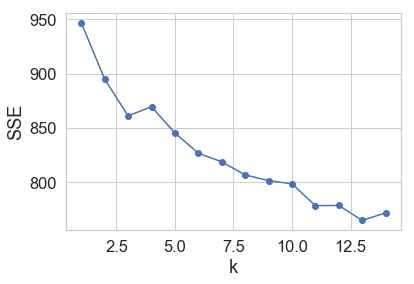

In [25]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

 
df_features = filtered_data
SSE = []  
for k in range(1,15):
    estimator = KMeans(n_clusters=k) 
    estimator.fit(df_features)
    SSE.append(estimator.inertia_)
X = range(1,15)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X,SSE,'o-')
plt.show()

#kmeans_model = KMeans(n_clusters=5).fit(X)
#for i, l in enumerate(kmeans_model.labels_):
#    print (i , l)


In [26]:
# Python program to generate WordCloud 

# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

# Reads 'Youtube04-Eminem.csv' file 
df = corpus

# comment_words = ' '
# stopwords = set(STOPWORDS)

# iterate through the csv file 
for val in corpus:

    # typecaste each val to string 
    val = str(val)

    # split the value 
    tokens = val.split()

    # Converts each token into lowercase 
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    for words in tokens:
        comment_words = comment_words + words + ' '

wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size=10).generate(comment_words)

# plot the WordCloud image					 
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show() 





NameError: name 'comment_words' is not defined

In [ ]:
# Create list of lists containing bigrams in tweets
terms_bigram = [list(nltk.bigrams(tweet)) for tweet in tweets_nsw_nc]


# View bigrams for the first tweet
terms_bigram[0]

In [ ]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)

bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

bigram_df



In [ ]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

# G.add_node("china", weight=100)
fig, ax = plt.subplots(figsize=(12, 10))

pos = nx.spring_layout(G, k=1)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=12,
                 width=2,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=12)
    
ax.set_title("Co-occurring Words Found in Tweets without Promotion")
plt.show()